<a href="https://colab.research.google.com/github/enthokz/Python-Testing/blob/main/Testing_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Latihan Handson EDA Myskill**
---

In [ ]:
import pandas as pd #kita meng-import library pandas dan menamakannya sebagai pd
data = pd.DataFrame(
{
"Negara": ["Indosenia", "Malaysia", "Singapura", "Malaysia", "Thailand", None],
"A": [1, 2, None, 2, 3, None],
"B": [5, None, 7, None, None, None],
"C": [99, 9, None, 9, 11, None],
"D": [12, 8, 14, 8, 15, None]
}
)
#Print dataset
print("Original dataset:")
print(data)

Original dataset:
      Negara    A    B     C     D
0  Indosenia  1.0  5.0  99.0  12.0
1   Malaysia  2.0  NaN   9.0   8.0
2  Singapura  NaN  7.0   NaN  14.0
3   Malaysia  2.0  NaN   9.0   8.0
4   Thailand  3.0  NaN  11.0  15.0
5       None  NaN  NaN   NaN   NaN


In [ ]:
data.describe()

A         B          C          D
count  4.000000  2.000000   4.000000   5.000000
mean   2.000000  6.000000  32.000000  11.400000
std    0.816497  1.414214  44.676616   3.286335
min    1.000000  5.000000   9.000000   8.000000
25%    1.750000  5.500000   9.000000   8.000000
50%    2.000000  6.000000  10.000000  12.000000
75%    2.250000  6.500000  33.000000  14.000000
max    3.000000  7.000000  99.000000  15.000000

In [ ]:
#Coba Print Data null
print ("Jumlah data Null:")
print(data.isnull().sum())
#Coba Cek Kolom
print("\nKolom yang punya data kosong")
print(data.columns[data.isnull().any()].tolist()) #sintaks any() dapat diganti dengan all() untuk mencari semua data

Jumlah data Null:
Negara    1
A         2
B         4
C         2
D         1
dtype: int64

Kolom yang punya data kosong
['Negara', 'A', 'B', 'C', 'D']


In [ ]:
#Hapus baris kosong
drop_row=data.dropna(how="all")
drop_row

Negara    A    B     C     D
0  Indosenia  1.0  5.0  99.0  12.0
1   Malaysia  2.0  NaN   9.0   8.0
2  Singapura  NaN  7.0   NaN  14.0
3   Malaysia  2.0  NaN   9.0   8.0
4   Thailand  3.0  NaN  11.0  15.0

In [ ]:
#Hapus kolom yang mempunyai data kosong dengan jumlah tertentu
drop_col=data.dropna(thresh=4, axis='columns') #Jumlah "thresh=" menunjukan berapa minimal data yang tidak null
drop_col

Negara    A     C     D
0  Indosenia  1.0  99.0  12.0
1   Malaysia  2.0   9.0   8.0
2  Singapura  NaN   NaN  14.0
3   Malaysia  2.0   9.0   8.0
4   Thailand  3.0  11.0  15.0
5       None  NaN   NaN   NaN

In [ ]:
#Inputation Data yang NA dengan nilai tertentu
fill_na = data.fillna({
    "A" : data['A'].mean(),
    "B" : 1,
    "C" : 3,
    "D" : 4,
})
fill_na

Negara    A    B     C     D
0  Indosenia  1.0  5.0  99.0  12.0
1   Malaysia  2.0  1.0   9.0   8.0
2  Singapura  2.0  7.0   3.0  14.0
3   Malaysia  2.0  1.0   9.0   8.0
4   Thailand  3.0  1.0  11.0  15.0
5       None  2.0  1.0   3.0   4.0

In [ ]:
#Data Original Kolom A
print ("Data Original Col A:\n")
print ("NO","  ","A")
print (data["A"])

#Input NA dengan nilai Mean
Data_Inputed= data['A'].fillna(data['A'].mean())

#Print Hasil Inputation
print ("\nData Hasil Inputation Col A With Mean:\n")
print ("NO","  ","A")
print (Data_Inputed)

Data Original Col A:

NO    A
0    1.0
1    2.0
2    NaN
3    2.0
4    3.0
5    NaN
Name: A, dtype: float64

Data Hasil Inputation Col A With Mean:

NO    A
0    1.0
1    2.0
2    2.0
3    2.0
4    3.0
5    2.0
Name: A, dtype: float64


In [ ]:
#Data Origin Column C
print ("Data Awal Collum C:\n")
print (data["C"])

#Inputation dengan data sebelum (data di bawahnya)
Forward_field = data["C"].fillna(method="bfill")
print ("\nData Sesudah Inputation dengan bfill:\n")
print (Forward_field)

#Inputation dengan data sesudah (data di atasnya)
Sesudah = data["C"].fillna(method="ffill")
print ("\nData sesudah Inputation dengan ffill\n")
print (Sesudah)

Data Awal Collum C:

0    99.0
1     9.0
2     NaN
3     9.0
4    11.0
5     NaN
Name: C, dtype: float64

Data Sesudah Inputation dengan bfill:

0    99.0
1     9.0
2     9.0
3     9.0
4    11.0
5     NaN
Name: C, dtype: float64

Data sesudah Inputation dengan ffill

0    99.0
1     9.0
2     9.0
3     9.0
4    11.0
5    11.0
Name: C, dtype: float64


<ipython-input-8-fbfd66e9f9d3>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Forward_field = data["C"].fillna(method="bfill")
<ipython-input-8-fbfd66e9f9d3>:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Sesudah = data["C"].fillna(method="ffill")


In [ ]:
#Input Data menggunakan Interpolasi
print ("Data setelah diinterpolasi")
print (data.interpolate())

Data setelah diinterpolasi
      Negara    A    B     C     D
0  Indosenia  1.0  5.0  99.0  12.0
1   Malaysia  2.0  6.0   9.0   8.0
2  Singapura  2.0  7.0   9.0  14.0
3   Malaysia  2.0  7.0   9.0   8.0
4   Thailand  3.0  7.0  11.0  15.0
5       None  3.0  7.0  11.0  15.0


<ipython-input-9-f012fffa071b>:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  print (data.interpolate())


In [ ]:
#Mencari Data Duplikat
Duplikat = data.duplicated()
data[Duplikat]

Negara    A   B    C    D
3  Malaysia  2.0 NaN  9.0  8.0

In [ ]:
#Menghapus Data Duplikat
Hapus_duplikat = data.drop_duplicates()
Hapus_duplikat

Negara    A    B     C     D
0  Indosenia  1.0  5.0  99.0  12.0
1   Malaysia  2.0  NaN   9.0   8.0
2  Singapura  NaN  7.0   NaN  14.0
4   Thailand  3.0  NaN  11.0  15.0
5       None  NaN  NaN   NaN   NaN

In [ ]:
#Menghapus Data Duplikat Namun yang Dihapus adalah Data Pertama
Hapus_duplikat_awal = data.drop_duplicates(keep="last")
Hapus_duplikat_awal

Negara    A    B     C     D
0  Indosenia  1.0  5.0  99.0  12.0
2  Singapura  NaN  7.0   NaN  14.0
3   Malaysia  2.0  NaN   9.0   8.0
4   Thailand  3.0  NaN  11.0  15.0
5       None  NaN  NaN   NaN   NaN

In [ ]:
#Ganti data yang typo

print (data["Negara"])

typo = data["Negara"].replace(["Indosenia"],"Indonesia")

print ("\nData setelah replace\n")
print (typo)

ganti = data["Negara"].replace(["Malaysia"],"Zambia")
print ("\nData setelah diganti menjadi nama negara lain\n")
print (ganti)

0    Indosenia
1     Malaysia
2    Singapura
3     Malaysia
4     Thailand
5         None
Name: Negara, dtype: object

Data setelah replace

0    Indonesia
1     Malaysia
2    Singapura
3     Malaysia
4     Thailand
5         None
Name: Negara, dtype: object

Data setelah diganti menjadi nama negara lain

0    Indosenia
1       Zambia
2    Singapura
3       Zambia
4     Thailand
5         None
Name: Negara, dtype: object


<Axes: >

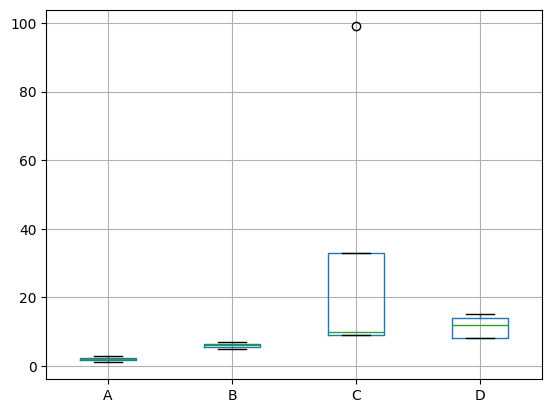

In [ ]:
 # Membuat grafik boxplot untuk identifikasi data pencilan
grafik = data.boxplot(column=["A","B","C","D"])
grafik

In [ ]:
# Cara mengatasi data outlier (Berlanjut)
# 1. Hapus baris yang semua datanya null

cleaning = data.dropna(how="all")
cleaning

Negara    A    B     C     D
0  Indosenia  1.0  5.0  99.0  12.0
1   Malaysia  2.0  NaN   9.0   8.0
2  Singapura  NaN  7.0   NaN  14.0
3   Malaysia  2.0  NaN   9.0   8.0
4   Thailand  3.0  NaN  11.0  15.0

In [ ]:
# 2. Isi Data null dengan nilai kosong

inputation = cleaning.fillna({"A":0,"B":0,"C":0,"D":0})
inputo =cleaning.fillna(cleaning[['A','B','C','D']].mean())
print (inputation)
print ("\n")
print (inputo)

      Negara    A    B     C     D
0  Indosenia  1.0  5.0  99.0  12.0
1   Malaysia  2.0  0.0   9.0   8.0
2  Singapura  0.0  7.0   0.0  14.0
3   Malaysia  2.0  0.0   9.0   8.0
4   Thailand  3.0  0.0  11.0  15.0


      Negara    A    B     C     D
0  Indosenia  1.0  5.0  99.0  12.0
1   Malaysia  2.0  6.0   9.0   8.0
2  Singapura  2.0  7.0  32.0  14.0
3   Malaysia  2.0  6.0   9.0   8.0
4   Thailand  3.0  6.0  11.0  15.0


In [ ]:
# 3. Cari kuartil 1 dan 3 lalu cari juga interkuartilnya untuk menentukan batas bawah dan batas atas dari sebaran data
Q1 = inputation['C'].quantile(0.25)
Q3 = inputation['C'].quantile(0.75)

IQR = Q3-Q1
IQR

np.float64(2.0)

In [ ]:
# 4. Cari batas atas dan bawahnya untuk menentukan pencilan atau outlier

Upper = Q3+1.5*IQR
lower = Q1-1.5*IQR

New_data = inputation[inputation["C"]<Upper]

print ("Data sebelum di cleaning")
print (data)
print ("\nData sesudah di cleaning")
New_data

Data sebelum di cleaning
      Negara    A    B     C     D
0  Indosenia  1.0  5.0  99.0  12.0
1   Malaysia  2.0  NaN   9.0   8.0
2  Singapura  NaN  7.0   NaN  14.0
3   Malaysia  2.0  NaN   9.0   8.0
4   Thailand  3.0  NaN  11.0  15.0
5       None  NaN  NaN   NaN   NaN

Data sesudah di cleaning


Negara    A    B     C     D
1   Malaysia  2.0  0.0   9.0   8.0
2  Singapura  0.0  7.0   0.0  14.0
3   Malaysia  2.0  0.0   9.0   8.0
4   Thailand  3.0  0.0  11.0  15.0

<Axes: >

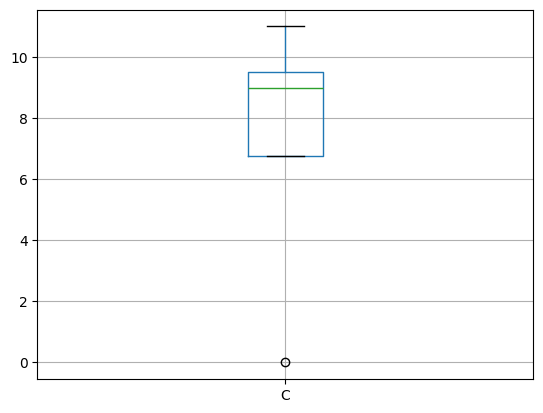

In [ ]:
# 5. Cek kembali data menggunakan boxplot

cek = New_data.boxplot(column=["C"])
cek

# Ternyata masih ada yang pencilan, yaitu data null yang diisi dengan angka kosong

Data sebelum cleaning pencilan
      Negara    A    B     C     D
0  Indosenia  1.0  5.0  99.0  12.0
1   Malaysia  2.0  0.0   9.0   8.0
2  Singapura  0.0  7.0   0.0  14.0
3   Malaysia  2.0  0.0   9.0   8.0
4   Thailand  3.0  0.0  11.0  15.0

Data sesudah cleaning pencilan


<Axes: >

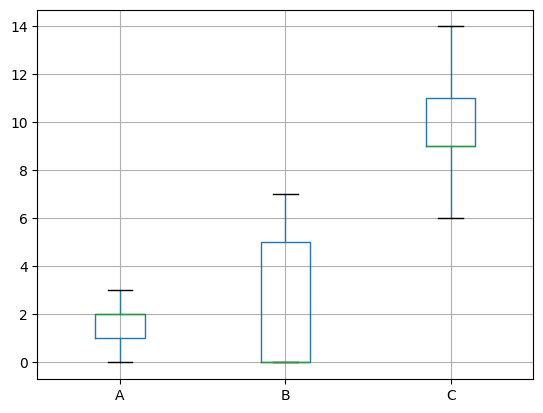

In [ ]:
# 6. Ubah semua daat pencilan (di atas upper maupun di bawah lower) menjadi nilai Upper/Lower
import numpy as np

New_Input = inputation.copy()
New_Input["C"]= np.where(
    New_Input["C"]>Upper, Upper,
    np.where(
        New_Input["C"]<lower, lower, New_Input["C"]
    )
)

#Cek Perbedaan dengan sebelumnya
print ("Data sebelum cleaning pencilan")
print (inputation)
print ("\nData sesudah cleaning pencilan")
New_Input
cek = New_Input.boxplot(column=["A","B","C"])
cek

In [ ]:
# Test aja numpy

coba = np.array([New_Input["A"],New_Input["B"]], dtype=int)
print (coba)

[[1 2 0 2 3]
 [5 0 7 0 0]]


In [ ]:
# Test aja bikin dataset pake pandas

import pandas as pd
dataku = pd.DataFrame({
    "Barang" : ["Golda","Ultra","Teh Pucuk"],
    "Harga" : [3500,5000,3000]
})

print (dataku)

      Barang  Harga
0      Golda   3500
1      Ultra   5000
2  Teh Pucuk   3000


# **Import Files From Another Resources**
---

## Import Data melalui upload manual

Upload file csv/exel/ect dengan cara manual langsung ke file dictionary colab.

Kekuranganya adalah jika jendela colab ditutup akan data yang sudah diupload akan hilang.

In [ ]:
# Upload file

from google.colab import files
ta = files.upload()

## Import Data dari Google Drive

Import data yang sudah diupload ke goodle drive. Pasangkan colab dengan drive jika belum terpasang agar colab dapaat membaca dictionary di google drive.

In [ ]:
# Upload File
import pandas as pd
uplod = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataBase/colab_uploadcsv.csv') #copy jalur di dictionary untuk diread menjadi tabel pandas
uplod.head() #sintaks head( berfungsi sebagai filter agar tabel pandas hanya menampilkan 5 data teratas. Untuk 5 data terbawah bisa menggunakan tail()

NO     NAMA  BERAT (KG)       LAYANAN
0  2582  Kalista        8.05  Cuci Setrika
1  2583     Rama        9.75  Cuci Setrika
2  2584      Aji        3.00  Cuci Setrika
3  2585   Azizah        3.50  Cuci Setrika
4  2586    Raisa        9.26  Cuci Setrika

# **All About Pandas**
---

## Membuat pandas dari list data yang diisi sendiri ⛹

In [ ]:
import pandas as pd

datalo = pd.DataFrame({
    "Customer" : ["Azizah","Entin","Rama"],
    "Berat" : [25,40,15]
    } )
print (datalo)

  Customer  Berat
0   Azizah     25
1    Entin     40
2     Rama     15


In [ ]:
# Creating a DataFrame from a dictionary with define dataset
datalo1 = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 28],
        'City': ['New York', 'London', 'Paris']}
datalo11 = pd.DataFrame(datalo1)
print (datalo11)

      Name  Age      City
0    Alice   25  New York
1      Bob   30    London
2  Charlie   28     Paris


## Membuat tabel pandas dari file csv yang diunggah

In [ ]:
# Create pandas dengan bantuan read_csv untuk data ug diunggah
uplod = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataBase/colab_uploadcsv.csv')
uplod.head()

NO     NAMA  BERAT (KG)       LAYANAN
0  2582  Kalista        8.05  Cuci Setrika
1  2583     Rama        9.75  Cuci Setrika
2  2584      Aji        3.00  Cuci Setrika
3  2585   Azizah        3.50  Cuci Setrika
4  2586    Raisa        9.26  Cuci Setrika

## Operation in pandas

NOTE : In this section mostly we are try using pandas from 'uplod' define before.

### Menampilkan data pada pandas

In [ ]:
# Show pandas secara langsung dengan kombinasi sintaks head() atau tail()
uplod.head()

NO     NAMA  BERAT (KG)       LAYANAN
0  2582  Kalista        8.05  Cuci Setrika
1  2583     Rama        9.75  Cuci Setrika
2  2584      Aji        3.00  Cuci Setrika
3  2585   Azizah        3.50  Cuci Setrika
4  2586    Raisa        9.26  Cuci Setrika

In [ ]:
# Show pandas dengan sintaks print
print (uplod.head())  # Gunakan sintaks print untuk meilhat data secara sederhana

     NO     NAMA  BERAT (KG)       LAYANAN
0  2582  Kalista        8.05  Cuci Setrika
1  2583     Rama        9.75  Cuci Setrika
2  2584      Aji        3.00  Cuci Setrika
3  2585   Azizah        3.50  Cuci Setrika
4  2586    Raisa        9.26  Cuci Setrika


In [ ]:
# Menampilkan ada kolom apa saja pada pandas
uplod.columns.tolist()

['NO', 'NAMA', 'BERAT (KG)', 'LAYANAN']

In [ ]:
# Menampilakan data dengan filter satu kolom tertentu
uplod['NAMA'].head()

0    Kalista
1       Rama
2        Aji
3     Azizah
4      Raisa
Name: NAMA, dtype: object

In [ ]:
# Menampilkan data dengan filter lebih dari satu kolom tertentu
uplod[['NO','NAMA']].head()

NO     NAMA
0  2582  Kalista
1  2583     Rama
2  2584      Aji
3  2585   Azizah
4  2586    Raisa

In [ ]:
# Menampikan data tertentu dengan bantuan sintaks loc (berdasrkan label(nama index kolom dan rownya))
# Menampilkan data dengan filter pada Row tertentu dalam bentuk rincian
print('Rincian data ke-2 dari tabel :')
print (uplod.loc[1])
print('\n')   #Sintaks \n berfungsi untuk membuat hasil ke baris baru

# Menampilkan data dengan filter pada row tertentu dalam bentuk tabel
print('Tabel Hasil filter tampilkan baris ke-2 :')
print (uplod.loc[[1]])
print('\n')

# Menampilkan data dengan filter pada beberapa row tertentu
print('Tabel Hasil filter tampilkan baris ke-2 dan 4 :')
print (uplod.loc[[0,4]])  # Jika ingin memilih rentang row maka mwnggunakan tanda hubung ":" contohnya [0:10]
print('\n')

# Menampilkan data dengan kombinasi filter row dan colum
print('Data hasil filter pada baris ke-3 pada kolom NAMA :')
print(uplod.loc[2,"NAMA"])

Rincian data ke-2 dari tabel :
NO                    2583
NAMA                  Rama
BERAT (KG)            9.75
LAYANAN       Cuci Setrika
Name: 1, dtype: object


Tabel Hasil filter tampilkan baris ke-2 :
     NO  NAMA  BERAT (KG)       LAYANAN
1  2583  Rama        9.75  Cuci Setrika


Tabel Hasil filter tampilkan baris ke-2 dan 4 :
     NO     NAMA  BERAT (KG)       LAYANAN
0  2582  Kalista        8.05  Cuci Setrika
4  2586    Raisa        9.26  Cuci Setrika


Data hasil filter pada baris ke-3 pada kolom NAMA :
Aji


In [ ]:
# Menampikan data tertentu dengan bantuan sintaks iloc (berdasrkan posisi(index))
# Menampilkan data dengan filter pada Row tertentu dalam bentuk rincian
print('Rincian data ke-1 dari tabel :')
print(uplod.iloc[0])
print('\n')

# Menampilkan data dengan filter pada row tertentu dalam bentuk tabel
print('Tabel Hasil filter tampilkan baris ke-2 :')
print (uplod.iloc[[1]])
print('\n')
# Menampilkan data dengan filter pada beberapa row tertentu
print('Tabel Hasil filter tampilkan baris ke-1 sampai 3 :')
print(uplod.iloc[0:3])
print('\n')
print('Tabel Hasil filter tampilkan baris ke-1 dan 3 :')
print(uplod.iloc[[0,3]])
print('\n')

# Menampilkan data dengan kombinasi filter row dan colum
print('Data hasil filter pada baris ke-3 pada kolom NAMA :')
print(uplod.iloc[2,1])

Rincian data ke-1 dari tabel :
NO                    2582
NAMA               Kalista
BERAT (KG)            8.05
LAYANAN       Cuci Setrika
Name: 0, dtype: object


Tabel Hasil filter tampilkan baris ke-2 :
     NO  NAMA  BERAT (KG)       LAYANAN
1  2583  Rama        9.75  Cuci Setrika


Tabel Hasil filter tampilkan baris ke-1 sampai 3 :
     NO     NAMA  BERAT (KG)       LAYANAN
0  2582  Kalista        8.05  Cuci Setrika
1  2583     Rama        9.75  Cuci Setrika
2  2584      Aji        3.00  Cuci Setrika


Tabel Hasil filter tampilkan baris ke-1 dan 3 :
     NO     NAMA  BERAT (KG)       LAYANAN
0  2582  Kalista        8.05  Cuci Setrika
3  2585   Azizah        3.50  Cuci Setrika


Data hasil filter pada baris ke-3 pada kolom NAMA :
Aji


In [ ]:
# Menampilkan data dengan filter tertentu

# Menampilkan data dengan menghilangkan baris tertentu
uplodek = uplod[uplod['NAMA']!='Rama']
print(uplodek.head())  # Terlihat hasil data a.n Rama hilang pada row ke 2

     NO     NAMA  BERAT (KG)       LAYANAN
0  2582  Kalista        8.05  Cuci Setrika
2  2584      Aji        3.00  Cuci Setrika
3  2585   Azizah        3.50  Cuci Setrika
4  2586    Raisa        9.26  Cuci Setrika
5  2587   Azizah        5.37  Cuci Setrika


In [ ]:
# Menampilkan data dengan filter nilai pada suatu kolomnya
print('Tabel hasil filter Berat harus lebih besar dari 5 kg :')
print(uplod[uplod['BERAT (KG)']>5].head())  # Terlihat hasil pada index row 2,3,dan 6 hilang karena nilai berat<5 kg
print('\n')
print('Tabel hasil filter nama harus sama dengan Rama:')
print(uplod[uplod['NAMA']=='Rama'].head())
print('\n')
print('Tabel hasil filter dengan dua kriteria atau lebih :')
print(uplod[(uplod['NAMA']=='Rama')&(uplod['BERAT (KG)']>10)]) # Terlohat hasil hanya menunjukan nama rama dan berat diatas 10 kg
print('\n')
print('Tabel hasil filter dengan menggunakan wild card pada layanan express saja :')
print(uplod[uplod['LAYANAN'].str.contains('.Express$')])


Tabel hasil filter Berat harus lebih besar dari 5 kg :
     NO     NAMA  BERAT (KG)       LAYANAN
0  2582  Kalista        8.05  Cuci Setrika
1  2583     Rama        9.75  Cuci Setrika
4  2586    Raisa        9.26  Cuci Setrika
5  2587   Azizah        5.37  Cuci Setrika
7  2589     Alif        7.07  Cuci Setrika


Tabel hasil filter nama harus sama dengan Rama:
      NO  NAMA  BERAT (KG)       LAYANAN
1   2583  Rama        9.75  Cuci Setrika
13  2595  Rama       17.11  Cuci Setrika
25  2607  Rama       19.71  Cuci Setrika
36  2618  Rama        5.88  Cuci Setrika


Tabel hasil filter dengan dua kriteria atau lebih :
      NO  NAMA  BERAT (KG)       LAYANAN
13  2595  Rama       17.11  Cuci Setrika
25  2607  Rama       19.71  Cuci Setrika


Tabel hasil filter dengan menggunakan wild card pada layanan express saja :
      NO       NAMA  BERAT (KG)               LAYANAN
9   2591    Kalista        4.20  Cuci Setrika Express
10  2592      Bagas        6.80  Cuci Setrika Express
11  2593      A

NOTE :
Simbol titik (.) mensyaratkan harus ada karakter apa saja yang ada di depan atau dibelakang sedangkan simbil tanda tanya (?) bisa digunakan untuk mensyaratkan karakter apa saja diawal maupun diakhir kata atau bisa digunakan untuk tanda bahwa kata tersebut merupakan kata terkahir pada data string. Namun simbol tanda tanya tidak dapat digunakan pada awal kata.

In [ ]:
# Menampilkan data dengan mengurutkan salah satu nilai pada kolom
print(uplod.sort_values(by='BERAT (KG)',ascending=False).head())  #Ascending = False berarti mengurutkan data dari paling tinggi ke rendah

      NO       NAMA  BERAT (KG)       LAYANAN
25  2607       Rama       19.71  Cuci Setrika
13  2595       Rama       17.11  Cuci Setrika
12  2594  Ilhamdian       15.18  Cuci Setrika
22  2604      Entin       14.86  Cuci Setrika
17  2599      Entin       13.76  Cuci Setrika


### Menambahkan kolom pada tabel pandas

In [ ]:
# Menambahkan kolom dari hasil operasi data pada tabel
uplodez = uplod.copy()
uplodez['HARGA'] = uplod['BERAT (KG)'].astype(int)*6000
uplodez.head()

NO     NAMA  BERAT (KG)       LAYANAN  HARGA
0  2582  Kalista        8.05  Cuci Setrika  48000
1  2583     Rama        9.75  Cuci Setrika  54000
2  2584      Aji        3.00  Cuci Setrika  18000
3  2585   Azizah        3.50  Cuci Setrika  18000
4  2586    Raisa        9.26  Cuci Setrika  54000

### Itterrows in pandas

In [ ]:
import pandas as pd

# Membuat DataFrame contoh
data = {'Nama': ['Alice', 'Bob', 'Charlie'],
        'Usia': [25, 30, 22],
        'Kota': ['New York', 'London', 'Paris']}
df = pd.DataFrame(data)

# Iterasi menggunakan iterrows()
for index, row in df.iterrows():
    print(f"Indeks: {index}")
    print(f"Nama: {row['Nama']}")
    print(f"Usia: {row['Usia']}")
    print(f"Kota: {row['Kota']}")
    print("-" * 20)

Indeks: 0
Nama: Alice
Usia: 25
Kota: New York
--------------------
Indeks: 1
Nama: Bob
Usia: 30
Kota: London
--------------------
Indeks: 2
Nama: Charlie
Usia: 22
Kota: Paris
--------------------


# Rangkuman Sintaks Grafik

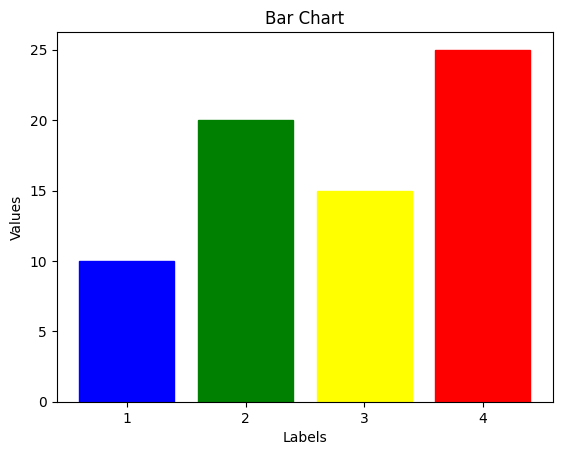

In [ ]:
   import matplotlib.pyplot as plt

   # Data untuk bar chart
   labels = ['1', '2', '3', '4']
   values = [10, 20, 15, 25]


   # Buat bar chart
   rects = plt.bar(labels, values) # simpan rects untuk mengakses setiap bar
   # Ubah warna bar pertama menjadi biru
   rects[0].set_color('blue')
   # Ubah warna bar kedua menjadi hijau
   rects[1].set_color('green')
   rects[2].set_color('yellow')
   rects[3].set_color('red')
   # Dan seterusnya
   plt.title('Bar Chart')
   plt.xlabel('Labels')
   plt.ylabel('Values')
   plt.show()

In [ ]:
import pandas as pd
cc = {'labels' : labels,
      'values' : values}
mamat = pd.DataFrame(cc)
mamat

labels  values
0      1      10
1      2      20
2      3      15
3      4      25

# Video Fajrul fx react alan backer

In [ ]:
a = 'string'
for i in a:
  print (i)

s
t
r
i
n
g


In [ ]:
a = 'bark'
while a.isdigit():
  print(a)
else:
  print (a.upper())

BARK


In [ ]:
ba =['bang','bing','bung','beng','bong']
print (*ba)

bang bing bung beng bong


In [ ]:
!pip install ColabTurtle

  Preparing metadata (setup.py) ... done
  Created wheel for ColabTurtle: filename=ColabTurtle-2.1.0-py3-none-any.whl size=7643 sha256=0b1adff6de2fd92d8161f4377691479400fc509daf302d718eb8a9c51a7607e8
  Stored in directory: /root/.cache/pip/wheels/f6/9e/81/137e7da25129474562d30f8660be599e5c8d79228cb747e5b9
Successfully built ColabTurtle


In [ ]:
import ColabTurtle.Turtle as turtle
turtle.initializeTurtle()
turtle.forward(200)
turtle.right(90)
turtle.forward(50)
turtle.backward(100)
turtle.forward(350)
turtle.speed(12)

# Coret lainnya

## Contoh def()

In [ ]:
def main():
  print('Hello World')
  for i in range(10):
    print(i)

In [ ]:
main()

Hello World
0
1
2
3
4
5
6
7
8
9


## Contoh looping

In [ ]:
# Definisikan nilai tengah dan list
mid=5
lower=[]
upper=[]

# Gunakan sintaks loop untuk mengisi list
for i in range(10):
    if (i<mid):
        lower.append(i)
    else :
      upper.append(i)

In [ ]:
print ("Nilai bawah :",lower)
print ("NIlai atas :",upper)

Nilai bawah : [0, 1, 2, 3, 4]
NIlai atas : [5, 6, 7, 8, 9]


In [ ]:
print(f'Nilai bawah: {lower}')
print(f'Nilai Atas: {upper}')

Nilai bawah: [0, 1, 2, 3, 4]
Nilai Atas: [5, 6, 7, 8, 9]


In [ ]:
# type data
# 1.

{1, 2, 3, 4, 5}


In [ ]:
def aw(x):
  if x>5:
    print('Besar')
  else:
    print('Kecil')

In [ ]:
aw(2)

Kecil


# **Python Fundamental**

## Common Data Structure

In [ ]:
# Data List - Data berbentuk daftar pada umumnya
# Definisikan list
malist=[]
print(malist)
#input data pada list
malist=[1,2,3,'tes']
print(malist)

[]
[1, 2, 3, 'tes']


### List Fundamental in Python

In [ ]:
# Basic list
# Penulisan menggunakan kurung siku

lilis = ['Gudang garam','Malboro','Aroma','Djisamsoe']
print(lilis)
print(len(lilis))   # Mengetahui panjang data dalam list

['Gudang garam', 'Malboro', 'Aroma', 'Djisamsoe']
4


In [ ]:
# List tanpa kurung siku
# Mengunakan sintaks list lalu datanya dibungkus dengan double kurung

lilit = list(('Kari ayam','Ayam Bawang','Goreng special'))
print(lilit)

['Kari ayam', 'Ayam Bawang', 'Goreng special']


In [ ]:
# Indexing in List Type

# Data pertama pada list
print(lilis[0])
print('\n')
# Data terakhir dalam list
print(lilis[-1])
print('\n')
# Rentang data ke-n tertentu
print(lilis[1:3])   # index ke-n adalah data pada n-1
print('\n')
# Semua data sampai index ke-n atau semua data dari index ke-n hingga akhir
print(lilis[:2])

Gudang garam


Djisamsoe


['Malboro', 'Aroma']


['Gudang garam', 'Malboro']


### Insert, Delete, and replace data in list

**NOTE UNTUK MATERI SETELAH INI**

Operasi penambahan dan pengurangan/penghapusan data dalam list tidak bisa diundo yang artinya jika code dalam operasi tersebut sudah di run maka list dengan nama tersebut akan berubah isinya.

Disarankan untuk copy list tersebut terlebih dahulu apabila kiranya kurang yakin akan operasi tersebut agar list original yang dipunya tidak berubah

In [ ]:
# Mengganti elemen pada list

print(lilit)
lilit[0]='Ayam Geprek'
print(lilit)  # Hasil menunjukan data pada index 0 berubah menjadi ayam geprek

['Kari ayam', 'Ayam Bawang', 'Goreng special']
['Ayam Geprek', 'Ayam Bawang', 'Goreng special']


In [ ]:
# Mengganti elemen namun yang dimasukan untuk pengganti lebih banyak dibandingkan yang diganti

lilits= lilit.copy()
print(lilits)
lilits[1:2]='Rendang','Aceh'
print(lilits)

['Kari ayam', 'Ayam Bawang', 'Goreng special']
['Kari ayam', 'Rendang', 'Aceh', 'Goreng special']


In [ ]:
# Mengganti elemen namun yang dimasukan untuk pengganti lebih sedikit dibandingkan yang diganti

lilet = lilits.copy()
print(lilet)
lilet[1:3]=['Soto Banjar']
print(lilet)

['Ayam Geprek', 'Rendang', 'Aceh', 'Goreng special']
['Ayam Geprek', 'Soto Banjar', 'Goreng special']


In [ ]:
# Cara Menambahkan data ke list

print ('Original List:')
print(lilet)

# Mengunakan append
print('Append: ')
lilet.append('Baso Sapi')
print(lilet)

# Menggunakan insert
print('Insert: ')
lilet.insert(2,'Cakalang')
print(lilet)

# Menggunakan Extend (menggabungkan dengan list lainnya)
luwit =['Samyang','Bulgogi']
print('Extend: ')
lilet.extend(luwit)
print(lilet)

# Menggunakan Extend dengan data tuple
lowit = ('Pedas manis','Original')
print('Extend with tuple data:')
lilet.extend(lowit)
print(lilet)

Original List:
['Ayam Geprek', 'Goreng special', 'Baso Sapi']
Append: 
['Ayam Geprek', 'Goreng special', 'Baso Sapi', 'Baso Sapi']
Insert: 
['Ayam Geprek', 'Goreng special', 'Cakalang', 'Baso Sapi', 'Baso Sapi']
Extend: 
['Ayam Geprek', 'Goreng special', 'Cakalang', 'Baso Sapi', 'Baso Sapi', 'Samyang', 'Bulgogi']
Extend with tuple data:
['Ayam Geprek', 'Goreng special', 'Cakalang', 'Baso Sapi', 'Baso Sapi', 'Samyang', 'Bulgogi', 'Pedas manis', 'Original']


In [ ]:
# Removing data from list
az = lilet.copy()
print('Original Data:')
print(az)

# Menggunakan remove (hanya specifik data tertentu)
print('Remove :')
az.remove('Goreng special')
print(az)

# Menggunakan pop ( Pada dasarnya akan menghapus data terakhir jika tidak di definisikan)
print('Pop with definied: ')
az.pop(0)
print(az)
print('Pop without definied: ')
az.pop()
print(az)

# Menggunakan del
print('Del: ')
del az[3]
print(az)

# Clear semua data dalam list
print('Clear data: ')
az.clear()
print(az)

Original Data:
['Ayam Geprek', 'Goreng special', 'Cakalang', 'Baso Sapi', 'Baso Sapi', 'Samyang', 'Bulgogi', 'Pedas manis', 'Original']
Remove :
['Ayam Geprek', 'Cakalang', 'Baso Sapi', 'Baso Sapi', 'Samyang', 'Bulgogi', 'Pedas manis', 'Original']
Pop with definied: 
['Cakalang', 'Baso Sapi', 'Baso Sapi', 'Samyang', 'Bulgogi', 'Pedas manis', 'Original']
Pop without definied: 
['Cakalang', 'Baso Sapi', 'Baso Sapi', 'Samyang', 'Bulgogi', 'Pedas manis']
Del: 
['Cakalang', 'Baso Sapi', 'Baso Sapi', 'Bulgogi', 'Pedas manis']
Clear data: 
[]


### Looping in list

In [ ]:
# Looping in list
# Menggunakan for looping
print(lilits)
for i in lilits:
  print(i)

['Ayam Geprek', 'Rendang', 'Aceh', 'Goreng special']
Ayam Geprek
Rendang
Aceh
Goreng special


In [ ]:
for i in range(len(lilits)):
  print(lilits[i])

Ayam Geprek
Rendang
Aceh
Goreng special


In [ ]:
# Menggunakan While looping

i =0
while i<len(lilits):
  print(lilits[i])
  i+=1

Ayam Geprek
Rendang
Aceh
Goreng special


In [ ]:
# List comprehension
# Cara singkat dalam python untuk melakukan loop pada list untuk mendapatkan sautu list baru dengan suatu ketentuan

lilits
lilitss=[x for x in lilits]
print(lilitss)

['Ayam Geprek', 'Rendang', 'Aceh', 'Goreng special']


In [ ]:
# LIst comprehension with confitional
lilits
lilitt = [x for x in lilits if "g" in x]    # Loping untuk membuat list baru dengan string terdapat huruf 'g'
print(lilitt)

# Looping tersebut sama dengan looping ini
for i in lilits:
  if 'g' in i:
    print(i)

['Rendang', 'Goreng special']
Rendang
Goreng special


In [ ]:
# ANother example List Comprehension with conditional
lilits
litlit = [x for x in lilits if x!='Rendang']
print(litlit)

['Ayam Geprek', 'Aceh', 'Goreng special']


In [ ]:
# Menambahkan operasi pada hasil dari List Comprehension
lilits
lits = [b+'ing' for b in lilits if b=='Aceh']
print(lits)

['Acehing']


In [ ]:
# List COmprehension with multiple condition
lilits
litt = [i if i!='Aceh' else 'Rendang' for i in lilits]    # Jika condtional if terpenuhi maka akan menjalankan if terlebih dahulu. Jika tidak baru akan menjalankan else
print(litt)

['Ayam Geprek', 'Rendang', 'Rendang', 'Goreng special']


In [ ]:
# Interatif
newlist = [x for x in range(10)]
print(newlist)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### Sorting list

In [ ]:
# Sorting secara ascending
lilits.sort()
print(lilits)

# Sorting secara descending
lilits.sort(reverse=True)
print(lilits)

['Aceh', 'Goreng special', 'Kari ayam', 'Rendang']
['Rendang', 'Kari ayam', 'Goreng special', 'Aceh']


### Join list

In [ ]:
# Join mneggunakan operator +
list1 = ["a", "b", "c"]
list2 = [1, 2, 3]

list3 = list1 + list2
print(list3)

['a', 'b', 'c', 1, 2, 3]


In [ ]:
# Join menggunkan looping
list1 = ["a", "b" , "c"]
list2 = [1, 2, 3]

for x in list2:
  list1.append(x)

print(list1)

['a', 'b', 'c', 1, 2, 3]


In [ ]:
# Join menggunkan extend()
list1 = ["a", "b" , "c"]
list2 = [1, 2, 3]

list1.extend(list2)
print(list2)

[1, 2, 3]


### Dictionary Fundamental in Python

In [ ]:
# Data Dictionary - Data berdasarkan dictionary. Bisa digunakan untuk membuat table pandas
# Definisikan dictinonary
dick={'pertama' : 'Aswin','Kedua' : 'Bambang'}
print(dick)
# Ganti data pad kolom tertentu
dick['Kedua']='Second'
print(dick)
# Menambahkan data ke dict
dick['Ketiga']='Hari'
print(dick)

{'pertama': 'Aswin', 'Kedua': 'Bambang'}
{'pertama': 'Aswin', 'Kedua': 'Second'}
{'pertama': 'Aswin', 'Kedua': 'Second', 'Ketiga': 'Hari'}


### Define, Add, Delete, and show Dictionary

In [ ]:
# Cara-cara definisikan dictionary
# Definisi langsung

adick = {'A': 'Jerman',
         'B': 'Belanda',
         'C:': 'Slovenia'}
print(adick)

{'A': 'Jerman', 'B': 'Belanda', 'C:': 'Slovenia'}


In [ ]:
# Definsikan dengan sintaks dict
adi = dict([
    ('A','Jerman'),
    ('B','Belanda'),
    ('C','Slovenia')
])
print(adi)
print('\n')

adik = dict(
      A='Jerman',
      B='Belanda',
      C=['Slovenia','Kroasia']
)
print(adik)

{'A': 'Jerman', 'B': 'Belanda', 'C': 'Slovenia'}


{'A': 'Jerman', 'B': 'Belanda', 'C': ['Slovenia,Kroasia']}


In [ ]:
# Menggunakann penambahan langsung
adic = {}

adic['A']='Jerman'
adic['B']='Belanda'
adic['C']='Slovenia'
adic['D']=['Serbia','Montenegro']
adic['E']={'Asia': ['Arab saudi','Iran'], 'Africa': ['Egypt','Maroco']}
print(adic)

# Jika menambahkan dengan key dictionary yang sudah ada maka data dalam dictionary tersebut akan tergantikan
adic['C']='Portugal'
print(adic)

{'A': 'Jerman', 'B': 'Belanda', 'C': 'Slovenia', 'D': ['Serbia', 'Montenegro'], 'E': {'Asia': ['Arab saudi', 'Iran'], 'Africa': ['Egypt', 'Maroco']}}
{'A': 'Jerman', 'B': 'Belanda', 'C': 'Portugal', 'D': ['Serbia', 'Montenegro'], 'E': {'Asia': ['Arab saudi', 'Iran'], 'Africa': ['Egypt', 'Maroco']}}


In [ ]:
# Delete key tertentu
del adic['C']
print(adic)

{'A': 'Jerman', 'B': 'Belanda', 'D': ['Serbia', 'Montenegro'], 'E': {'Asia': ['Arab saudi', 'Iran'], 'Africa': ['Egypt', 'Maroco']}}


In [ ]:
# Cara menampilkan data dalam dictionary
print(adic)
print(adic['A'])
print(adic['E']['Asia'])

{'A': 'Jerman', 'B': 'Belanda', 'D': ['Serbia', 'Montenegro'], 'E': {'Asia': ['Arab saudi', 'Iran'], 'Africa': ['Egypt', 'Maroco']}}
Jerman
['Arab saudi', 'Iran']


**NOTE**

Key dalam dictionary tidak harus berbentuk string. Bisa juga menggunakan interger, bolean, atau yang lainnya.

### Restriction in Dictionary

In [ ]:
# Doubel Key - Nilai yang akan di tambahkan adalah data yang terakhir kali di define

addik = {'A':'Jerman',
         'B':'Belanda',
         'C':'Ajerbaijan',
         'A':'Swedia'}    # Key A double
print(addik)


{'A': 'Swedia', 'B': 'Belanda', 'C': 'Ajerbaijan'}


In [ ]:
# Key bersifat immutable(tidak dapat dirubah) - Tidak bisa menggunakan data list
adfk = {[1,2] : 'Jerman',
        'B': 'Italia',
        'C': 'Slovakia'}
print(adfk)

TypeError: unhashable type: 'list'

### Built-in Dictionary Method

In [ ]:
# clear() - Menghapus semua data dalam dictionary
d = {'a': 10, 'b': 20, 'c': 30}
print(d)

d.clear()
print(d)

{'a': 10, 'b': 20, 'c': 30}
{}


In [ ]:
# get() - Menampilkan semua panggilan terhadap key. Jika key tidak ada maka hasilnya None, bukan eror seperti halnya jika memanggil secara langsung
d = {'a': 10, 'b': 20, 'c': 30}

print(d.get('b'))
print(d.get('z'))   #Hasilnya akan none

20
None


In [ ]:
# items() - Menampilkan daftar tuple dari data dictionary berupa pasangan key dan valuenya
e = {'a': 10, 'b': [20,30], 'c': 30}
print(list(e.items()))
print(list(e.items())[1][1])

[('a', 10), ('b', [20, 30]), ('c', 30)]
[20, 30]


In [ ]:
# keys() - Menampilkan semua key yang ada dalam dictionary
e = {'a': 10, 'b': [20,30], 'c': 30}
print(list(e.keys()))

['a', 'b', 'c']


In [ ]:
# Update() - Memperbaharui data dalam dictionary
d1 = {'a': 10, 'b': 20, 'c': 30}
d2 = {'b': 200, 'd': 400}

d1.update(d2)
d1

{'a': 10, 'b': 200, 'c': 30, 'd': 400}

In [ ]:
# pop() - Menghilangkan data dalam dictionary dengan key tertentu
d = {'a': 10, 'b': 20, 'c': 30}

d.pop('b')

d

{'a': 10, 'c': 30}

In [ ]:
# popitem() - Menghilangkan data dalam dictionary secara langsung dengan data paling belakang
d = {'a': 10, 'b': 20, 'c': 30}

d.popitem()

print(d)


d.popitem()

print(d)

{'a': 10, 'b': 20}
{'a': 10}


### Another structure (tupple and set)

In [ ]:
# Data Tupple - Dayta berdasrkan urutan
#Definisikan Tupple
matuple =(1,2,"Kill")
print(matuple)
# Ambil data pertama tuple
print(matuple[0])
# Ambil data ke- tuple
print(matuple[:])  # Tanda titik dua ":" berarti memilih semua data. Jika ada di depan atau dibelakang karakter, maka berarti semua data sebelum/sesudah karakter tersebut
# Ambil data dari tipe data string
print(matuple[2][1])

(1, 2, 'Kill')
1
(1, 2, 'Kill')
i


In [ ]:
# Data set - Data yang berbentuk data non duplicat dari suatu list
# Definisikan set
satset ={1,2,3,2,4,5,4}
print(satset)

{1, 2, 3, 4, 5}


## Union,Intersect,Difference,dan symmetric_Difference

In [ ]:
sat1 = {1,2,3,4,5}
sat2 = {4,5,6,7,8}
# Union (gabungan semua data)
print(sat1.union(sat2)," atau ",sat1|sat2)
# intersect (Nilai irisan data)
print(sat1.intersection(sat2)," atau ", sat1&sat2)
# DIfference (PErbedaan data pada set pertama)
print(sat1.difference(sat2)," atau ",sat1-sat2)
# Symmetric_difference (Semua data yang berbeda di kedau set data)
print(sat1.symmetric_difference(sat2)," Atau ",sat1^sat2)

{1, 2, 3, 4, 5, 6, 7, 8}  atau  {1, 2, 3, 4, 5, 6, 7, 8}
{4, 5}  atau  {4, 5}
{1, 2, 3}  atau  {1, 2, 3}
{1, 2, 3, 6, 7, 8}  Atau  {1, 2, 3, 6, 7, 8}


## Conditional Statement

In [ ]:
# If Statement
a=1
if a>4:
  print('Lebih besar')

In [ ]:
# if else statemen
a=6
if a>5:
  print('Besar')
else :
  print('Kecil')

Besar


**NOTE**

Jika mempunyai condition alternative lainnya selain codition if yang pertama, bisa menggunakan elif,if, atau nested if jika diperlukan sebelum masuk ke conditional lainnya (else). Perbedaan penggunaan elif dan if pada alternative condition:

  - if : Akan tetap dijalankan walaupun condition di if yang pertama memenuhi
  - elif (else if) : akan dijalankan apabila condition pertama sudah tidak memenuhi

In [ ]:
# Multiple condition If dengan Elif
a=8
if a>7:
  print('Bagus')
elif a>5:
  print('KUrang bagus')
elif a>2:
  print('Tidak bagus')
else:
  print('Tidak Lulus')

Bagus


In [ ]:
# Multiple condition if dengan if
a=8
if a>7:
  print('Bagus')
if a>5:
  print('KUrang bagus')
if a>2:
  print('Tidak bagus')
else:
  print('Tidak Lulus')

Bagus
KUrang bagus
Tidak bagus


In [ ]:
# Nested IF
a=4
if type(a)==int:
  if a>5:
    print('Lebih besar')
  else:
    print('Lebih kecil')
else:
  print("Cek kembali angkanya!  ")

TypeError: '>' not supported between instances of 'str' and 'int'

## Loops

Pada kasus loops menggunakan sintaks while harap diperhatikan untuk parameter pembatasnya. Hal ini berutujuan membatasi loop agar tidak berjalan terus-menerus. Berikut adalah langkah yang bisa digunakan:

1. Menggunakan else sejajar dengan while.

    Hal ini sama saja dengan membuat opsi apabila loop di dalam while tidak terpenuhi maka nilai nya berarti tidak ada dalam loops sehingga akan mencari nilai altenatif yang ada dalam else.

2. Menggunakan sintaks break.

    Hal ini mengakibatkan apabila suatu conditional dalam loop sudah terpenuhi maka loop akan selesai. Namun apaila loop ada di dalam function dan ada loop/atribut lain maka akan melanjutkan ke operasi berikutnya tersebut.

3. Menggunakan sintaks return.

    Hal ini mengakibatkan apabila suatu conditional dalam loop sudah terpenuhi maka loop beserta function (apabila berada daldam function) akan selesai. Apabila function dipanggil akan menunjukan nilai berdasarkan return yang didefinisikan dalam function tersebut.

In [ ]:
# While Loops
# Conto untuk mencari nilai bilangan hanya ganjil
# Menggunakan sintaks %(modulus) yaitu nilai sisa bagi dari pembagian angka tertentu
a=1
ganjil=[]
# Buat loop while
while a:
  if a % 2 !=0: # sintaks != means tidak sama dengan
    ganjil.append(a)
  if a>=20:
    break
  a+=1  #sintaks += means variabel= variabel tersebut ditambah satu
print(ganjil)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


In [ ]:
# While loops dengan True
b=1
while True:
  if b<10:
    b+=1
  elif b<20:
    b+=6
  elif b>=20:
    break
print(b)

22


In [ ]:
# Contoh else yang sejajar dengan while
# Apabila nilai tidak sesuai dengan ketentuan maka langsung masuk ke else tanpa looping.
def an(a):
  while a<5:
    print('a')
    break
  else:
    print('b')
an(7)

b


In [ ]:
# For Loops
# For loops digunakan untuk looping data pada list yang sudah diketahui
anj=(1,2,3,4,5)
for i in anj:
  if i<4:
    print(i)
print(anj)

1
2
3
(1, 2, 3, 4, 5)


In [ ]:
# Loop with not necessary ouput value
# Digunakan apabila tidak mempertimbangkan value dari hasil loop yang dilakukan
for _ in range(5):
  print("Perulangan ke-") # Alih-alih mengambil nilai dari range 0-5 loop ini hanya berguna untuk print string tersebut sebanyak lima kali

Perulangan ke-
Perulangan ke-
Perulangan ke-
Perulangan ke-
Perulangan ke-


In [ ]:
coic = [1,2]
coin = int(input('Coba masukan :'))
while coin:
  if coin not in[1,2]:
    print('Masukan lagi')
    coins = int(input('Coba masukan :'))
    coin = coins
  else:
    print('a')
    break
print('Apa saja ole')

Coba masukan :4
Masukan lagi
Coba masukan :1
a
Apa saja ole


## Function

In [ ]:
# Function with return
def mon(x):
  return x*2

print(mon(2))
monkey = mon('key')
print(monkey)

4
keykey


In [ ]:
# Function without return
def monk(x):
  print(x**2)
monk(2)

4


## Cara print suatu value

In [ ]:
# Print suatu string
print('STRING')
# Print sting dengan longkap baris
print('''Ya udh

begini saja''')
# print suatu value
print(12)
# print sautu value dari suatu defini tertentu
a="SETIR"
print(a)

STRING
Ya udh

begini saja
12
SETIR


In [ ]:
# Print kombinasi value dan string
# ada tiga cara
namae = "watashi"
print(f'Nama saya adalah : {namae}, salam kenal!')
print('Nama saya adalah :',namae,',salam kenal!')
print('Nama saya adalah : '+namae+' ,salam kenal!')

Nama saya adalah : watashi, salam kenal!
Nama saya adalah : watashi ,salam kenal!
Nama saya adalah : watashi ,salam kenal!


# **Function in Python**

Adalah suatu blok kode yang terdiri dari berbagai operasi tertentu dan dapat dipanggil atau digunakan secara berulang-ulang di seluruh bagian code suatu lembar kerja

## Bagaimana menggunakan function

In [ ]:
# Membuat suatu fungsi
def gret(name):
  """
  Fungsi menyapa orang setelah
  memasukan namanya dalam parameter
  """
  print(f'Hallo {name}, Selamat Datang!')

In [ ]:
# Mengetahui deskriosi dari fungsi yang telah kita buat sebelumnya
print(gret.__doc__)


  Fungsi menyapa orang setelah
  memasukan namanya dalam parameter
  


In [ ]:
# Menjalankan fungsi
gret('Bahlil')

Hallo Bahlil, Selamat Datang!


## Default Function Argument

In [ ]:
def wel(nama,umur=12):  #Argument umur=12 menjadikan nilai default dari parameter tersebut adalah 12
  print(f'Nama saya adalah {nama} dengan umur {umur}')

In [ ]:
wel('Fahrul')

Nama saya adalah Fahrul dengan umur 12


## Python Keyword Argument

In [ ]:
def wal(nama,umur):
  print(f'Nama saya adalah {nama} dengan umur {umur}')

In [ ]:
# Keyword biasa
wal(nama='Wahid',umur=14)
# Keyword out of position
wal(umur=14,nama='Wahid')
# Keyword salah satu nya saja
wal('Wahid',umur=14)

Nama saya adalah Wahid dengan umur 14
Nama saya adalah Wahid dengan umur 14
Nama saya adalah Wahid dengan umur 14


## Arbitary FUnction Argument

In [ ]:
# Mengoperasikan function dengan banyak parameter sekaligus
def wol(*nama):
  for names in nama:
    print('Hallo',names)

wol('Bahlil','Gibran')

Hallo Bahlil
Hallo Gibran


## Recrusive Argument

In [ ]:
# Recrusive merupakan pengulangan
# Dalam konteks kali ini adalah pengulangan argument hingga tercapai tiitk tertentu

def factorial(x):
    """Ini adalah fungsi rekursif
    untuk menemukan faktorial dari bilangan bulat"""

    if x == 1:
        return 1
    else:
        return x * factorial(x-1)


num = 3

print("Nilai factorial dari", num, "adalah", factorial(num))

Nilai factorial dari 3 adalah 6


## Annonymous Argument

In [ ]:
# Basic Annonymous Argument
basic=lambda x: x*2
print(basic(2))

4


In [ ]:
# Contoh penerapan pada pandas

import pandas as pd
datalo = pd.DataFrame({
    "Customer" : ["Azizah","Entin","Rama"],
    "Berat" : [25,40,15]
    } )
print (datalo)
print('\n')

datalo['kali']=datalo['Berat'].apply(lambda x: x*2)
print(datalo)
print('\n')

ceklo= list(filter(lambda x: (x/10==4),datalo['Berat']))
print(ceklo)

  Customer  Berat
0   Azizah     25
1    Entin     40
2     Rama     15


  Customer  Berat  kali
0   Azizah     25    50
1    Entin     40    80
2     Rama     15    30


[40]


In [ ]:
# Kombinasi dengan fungsi filter() untuk data list
'''
Fungsi filter() merupakan fungsi yang mana menfilter/menyaring data pada list seusai dengan ketentuan yang
dituliskan pada argument
'''
ma_list=[1,2,3,4,5,6,7,8]

cek_ma_list= list(filter(lambda x: (x%2==0),ma_list))

print (cek_ma_list)

[2, 4, 6, 8]


In [ ]:
# Kombinasi dengan fungsi map() untuk data list
'''
fungsi map() merupakan fungsi yang mana menerapkan argument ke setiap data pada list sehingga hasilnya
adalah hasil operasi setiap argument terhadap setiap data pada list
'''
my_list = [1, 5, 4, 6, 8, 11, 3, 12]

new_list = list(map(lambda x: x * 2 , my_list))

print(new_list)

[2, 10, 8, 12, 16, 22, 6, 24]


# **Global,local, dan non-ocal variabel**

## Global Variabel

Merupakan variabel yang dapat digunakan pada keseluruhan sintaks dalam python

In [ ]:
# Global Variabel

x = 'Global'

def world():
  print(f'X di dalam function adalah {x}')

world()
print(f'X di luar function adalah {x}')

X di dalam function adalah Global
X di luar function adalah Global


In [ ]:
# Mengubah variabel global di duatu function
x= 'Global'

def isekai():
  global x # SIntaks global berguna untuk memanggil variabel global x sehingga setelah ini tidak ambigu saat didefinisikan ulang
  x = x*2
  print(x)

isekai()
print(x) # Hasil menunjukan bahwa saat print nilai x di luar function pun nilai nya akan berubah setelah didefinisikan ulang di function

GlobalGlobal
GlobalGlobal


## Local Variabel

Variabel yang hanya didefinisikan dan berlaku di ruang lingkup function saja.

In [ ]:
# Local Variabel
x='Global'

def earth():
  global x
  x= x*2
  y='Local'
  print(x)
  print(y)
earth()

GlobalGlobal
Local


Dalam case ini jika ingin langsung mengetahui nilai dari variabel 'y' tidak bisa memanggilnya langsung di luar function seperti print(y). Jika itu dilakukan maka akan terjadi eror. Hal tersebut dikarenakan variabel 'y' hanya didefinisikan dalam function earth() saja dan tidak berlaku di enviroment python keseleuruhan

## Non-local variabel

Variabel dalam function di dalam function yang akan merubah variabel local dalam suatu functin utama menjadi variabel dengan nilai tertentu yang didefinisikan dalam suatu function anakan

In [ ]:
# Non-Local variabel

def outer():
  x='Local'

  def inner():
    nonlocal x
    x='non-local'  #Definsikan kembali variabel x setelah dipanggil menjadi non local di sintaks sebelumnya
    print(f'inner: {x}')
  inner()
  print(f'outer: {x}')
outer()

inner: non-local
outer: non-local


Hasil dari sintaks tersebut menunjukan 'non-local' walaupun di awal varibael x sudah didefinisikan 'Local'. Hal ini terjadi karena adanya pendefinisian ulang variabel x secara non local di function inner() sehingga nilai x berubah menjadi 'non-local'.

In [ ]:
def hewan():
  jenis = "ayam"

  def hewan1():
    jenis = "anjing"
  def hewan2() :
    nonlocal jenis
    jenis = "kucing"
  def hewan3():
    global jenis
    jenis = "bebek"


  hewan1()
  print (f"Jenis hewan pertama adalah {jenis}")
  hewan2()
  print (f"]enis hewan kedua adalah {jenis}")
  hewan3()
  print (f"]enis hewan ketiga adalah {jenis}")

hewan()
print(f"]enis hewan adalah {jenis}")

Jenis hewan pertama adalah ayam
]enis hewan kedua adalah kucing
]enis hewan ketiga adalah kucing
]enis hewan adalah bebek


# **Data Structure**

Menyimpan data sementara ke sistem berupa tipe" data yang diinginkan

## Linked List

In [ ]:
# LInked List

#Definisikan list
nam=['Azizi','Balmon','Oreki']
print(nam)

# Add data pada list namun letak datanya selalu di paling belakang
nam.append('Xiao lin')
# Add data pada list dengan menentukan letak datanya pada index tertentu
nam.insert(2,'Tarjo')
print(nam)
print()

# Hapus data tertentu dari list
nam.remove('Tarjo')
print(nam)

['Azizi', 'Balmon', 'Oreki']
['Azizi', 'Balmon', 'Tarjo', 'Oreki', 'Xiao lin']

['Azizi', 'Balmon', 'Oreki', 'Xiao lin']


## Stack

Strutur data yang bentuknya ditumpuk yang memungkinkan data dimasukan dan dihapus dari ujung yang sama sehingga mengikuti prinsip last in first out (LIFO).

Atau bisa disimpulkan data yang diinput pada index terakhir yang nantinya akan dihilangkan dengan sintaks pop(). Sintaks pop() secara default akan menghapus data pada index terakhir

In [ ]:
# Stack

# Definisikan stack
stak = ['Satu','Dua','Tiga']
print(stak)

# Penambahan data dengan syntaks append(). Note: append() sama dengan sintaks push() di bhs pengrogaman yang lain
stak.append('Empat')
stak.append('Lima')
print(stak)

# Cek data yang paling terakhir diinput
print(stak[-1])

# Pengeluaran data dengan syntaks pop()
stak.pop()
print(stak)
'''
Karena data terakhir yang diinput adalah data 'Lima' maka secara operation syntaks pop() akan
mengeluarkan data yang terakhir terinput tersebut
'''

['Satu', 'Dua', 'Tiga']
['Satu', 'Dua', 'Tiga', 'Empat', 'Lima']
Lima
['Satu', 'Dua', 'Tiga', 'Empat']


"\nKarena data terakhir yang diinput adalah data 'Lima' maka secara operation syntaks pop() akan \nmengeluarkan data yang terakhir terinput tersebut\n"

In [ ]:
# Contoh lain
'''
Contoh kondisi saat data yang terakhir diinput diletakkan di bukan index terakhir,
maka yanga akan hilang saat menggunakan pop() tetap data pada ujung terakhir
'''
print(stak)
stak.append('Empat') # Sebagai data sebelum terakhir diinput namun ada di index terakhir
stak.insert(1,'Contoh') # Sebagai data terakhir yang diinput namun ada di index ke 1
print(stak)
print(stak[-1])  # Cek data paling ujung dari urutan data
stak.pop()
print(stak)  # Hasil dari pop menunjukan data yang dihilangkan bukan data yang terakhir di input melainkan data terakhir dalam list

['Satu', 'Dua', 'Tiga']
['Satu', 'Contoh', 'Dua', 'Tiga', 'Empat']
Empat
['Satu', 'Contoh', 'Dua', 'Tiga']


In [ ]:
stakk=stak
print(stakk)
stakk.pop(0)
print(stakk)

['Satu', 'Contoh', 'Dua', 'Tiga']
['Contoh', 'Dua', 'Tiga']


## Queue

Struktur linear yang memungkinkan data yang diinput (satu ujung) akan menghapus data paling terakhir (salah satu ujung lainnya)

Prinsip utama dari structure ini adalah First in first out.

Untuk menghapus data index pertama bisa menggunakan sintaks remove(nama varibale[0]) atau bisa langsung menggunakan pop(0)

In [ ]:
# Queue

# Definisikan queue
que=['Satu','Dua','Tiga','Empat']
print(que)

# input element
que.append('Lima')
print(que)

#Cek head atau data index pertama
print(que[0])

#Cek tail atau data index terakhir
print(que[-1])

# menghilangkan data pada index pertama sesuai dengan prinsip queue
que.remove(que[0])
print(que)

['Satu', 'Dua', 'Tiga', 'Empat']
['Satu', 'Dua', 'Tiga', 'Empat', 'Lima']
Satu
Lima
['Dua', 'Tiga', 'Empat', 'Lima']


## Tree

In [ ]:
class node:
    def __init__(self, ele):
        self.ele = ele
        self.left = None
        self.right = None


def preorder(self):
    if self:
        print(self.ele)
        preorder(self.left)
        preorder(self.right)


n = node('first')
n.left = node('second')
n.right = node('third')
preorder(n)

first
second
third


**NOTE**
JIka ingin mengetahui lebih dalam mengenai class maka silahkan cek materi Object Oriented Programming (OOP_

## Graph

In [ ]:
class adjnode:
    def __init__(self, val):
        self.val = val
        self.next = None


class graph:
    def __init__(self, vertices):
        self.v = vertices
        self.ele = [None]*self.v

    def edge(self, src, dest): #src (source), dest (destination)
        node = adjnode(dest)
        node.next = self.ele[src]
        self.ele[src] = node

        node = adjnode(src)
        node.next = self.ele[dest]
        self.ele[dest] = node

    def __repr__(self):
        for i in range(self.v):
            print("Adjacency list of vertex {}\n head".format(i), end="")
            temp = self.ele[i]
            while temp:
                print(" -> {}".format(temp.val), end="")
                temp = temp.next

g = graph(4) #mendefinisikan jumlah vertex yg ada
#menghubungkan tia vertex tsb
g.edge(0, 2) #node 0 akan bertetangga dengan 2 dst.
g.edge(1, 3)
g.edge(3, 2)
g.edge(0, 3)
g.__repr__()

Adjacency list of vertex 0
 head -> 3 -> 2Adjacency list of vertex 1
 head -> 3Adjacency list of vertex 2
 head -> 3 -> 0Adjacency list of vertex 3
 head -> 0 -> 2 -> 1

## Hashmap

In [ ]:
# HAshmap
# Fefiniskan fungsi untuk memanggil TIAP key dan valuenya
def printdict(d):
    for key in d:
        print(key, "->", d[key])

# Apabila suatu dict di-print/panggil langsung (naked) dalam fungsi, yg kepanggil adalah key-nya

hashmaps = {0: 'first', 1: 'second', 2: 'third'}
printdict(hashmaps)
print()

hashmaps[4] = 'fifth'
printdict(hashmaps)
print()

hashmaps.popitem() #menghilangkan indeks dimulai dr indeks terakhir
printdict(hashmaps)

0 -> first
1 -> second
2 -> third
first

0 -> first
1 -> second
2 -> third
4 -> fifth

0 -> first
1 -> second
2 -> third


# **String in Python**

## Escaping Sequence

In [ ]:
# Initial String
akun= '''Jannatun na'im'''
print('Innitial string: ')
print(akun)

# Single Quote
akon= 'Jannatun na\'im'
print('\nSingle Quote: ')
print(akon)

# Double Quote
akom= "Pepatah mengatakan \"Katakan Saja\""
print('\nDouble Quote: ')
print(akom)

# Tanda garis miring
akol= 'Pepatah \\ korus'
print('\nGaris miring: ')
print(akol)

# Tab
akop= 'Lainnya:\t Dan yang lain'
print('\nTab: ')
print(akop)

# New tab
akoi='Lainnya \nadalah'
print('\nNew TAb: ')
print(akoi)

Innitial string: 
Jannatun na'im

Single Quote: 
Jannatun na'im

Double Quote: 
Pepatah mengatakan "Katakan Saja"

Garis miring: 
Pepatah \ korus

Tab: 
Lainnya:	 Dan yang lain

New TAb: 
Lainnya 
adalah


## Formating String

In [ ]:
# Default order
string1='{} {} {}'.format('Adi','Adalah','Pelaut')
print('Format String Default Order:')
print(string1)

# Positional Format
string2='{2} {0} {1}'.format('Adi','Adalah','Pelaut')
print('\nFormat String Positional Format:')
print(string2)

# Keyword Format
string3='{w} {f} {x}'.format(w='Adi',f='Adalah',x='Pelaut')
print('\nFormat String Keyword Format:')
print(string3)

Format String Default Order:
Adi Adalah Pelaut

Format String Positional Format:
Pelaut Adi Adalah

Format String Keyword Format:
Adi Adalah Pelaut


In [ ]:
# Formatting of Integers
String1 = "{0:b}".format(16)
print("\nBinary representation of 16 is ")
print(String1)

# Formatting desimal menajdi scintific
String1 = "{0:e}".format(165.6458)
print("\nExponent representation of 165.6458 is ")
print(String1)

# Pembulatan Pecahan
String1 = "{0:.2f}".format(1/4) # Dibulatkan dua angka di belakang koma
print("\nPecahan menjadi desimal : ")
print(String1)

# Penerpan langsung ke dalam perintah print
print('\nPenerapan langsung ke print')
print(f'Hasil dari 1/4 dalam desimal adalah {1/4:.2f}')


Binary representation of 16 is 
10000

Exponent representation of 165.6458 is 
1.656458e+02

Pecahan menjadi desimal : 
0.25

Penerapan langsung ke print
Hasil dari 1/4 dalam desimal adalah 0.25


In [ ]:
# String alignment
String1 = "|{:<10}|{:^10}|{:>10}|".format('Adi','Adalah','Pelaut')
print("\nFormating string kiri,tengah, dan kanan alignment: ")
print(String1)

# To demonstrate aligning of spaces
String1 = "\n{0:^16} was founded in {1:<4}!".format("MySkillForLearning",2021)
print(String1)


Formating string kiri,tengah, dan kanan alignment: 
|Adi       |  Adalah  |    Pelaut|

MySkillForLearning was founded in 2021!


In [ ]:
# Formating gaya lama
Integer1 = 12.3456789
print("Formatting in 3.2f format: ")
print('The value of Integer1 is %3.2f' % Integer1)
print("\nFormatting in 3.4f format: ")
print('The value of Integer1 is %1.1f' % Integer1)

print('The value of Integer1 is %7.3f' % Integer1)


Formatting in 3.2f format: 
The value of Integer1 is 12.35

Formatting in 3.4f format: 
The value of Integer1 is 12.3
The value of Integer1 is  12.346


In [ ]:
print(f'{1/4:.2f}')

0.25


In [ ]:
def greet():
    print(f'''{'-'*72}
|{"Welcome":^70}|
{'-'*72}\n
Untuk memulai permainan kamu perlu memasukan nama playermu.''')
    player_name=input('Nama Player = ')
    print(f'\nHallo {player_name}! Saatnya kita memulai permaiann...')
    return player_name

# **Object Oriented Programing**

Merupakan suatu konsep dari pemrograman dalam menjelaskan suatu hal yang berorientasi terhadap object sebagai dasarnya.

Object dalam hal ini merupakan suatu definisi yang memiliki status dan peilaku yang terakit dengan isinya.
Object terdiri dari beberapa komponen, yaitu:

  1. state , suatu hal yang mewakili/menggambarkan object
  2. Perilaku, dapat berupa function
  3. Identitas , suatu hal yang menunjukan suatu state



In [ ]:
# Konsep dasar definisi class
class snake:
  pass

In [ ]:
# Object
berbisa = snake()

** Self **

Merupakan salah satu kata kunci yang biasa digunakaan pada class sebagai identitas dari value itu sendiri. Berikut syaratnya:

  1. Harus memiliki parameter tambahan pertama sebagai identitasnya sebagai asign yang dapat digunakan di class. **Exp: self.nama**
  2. JIka ada suatu metode/function tidak memiliki argumen, maka harus dicantumkan setidaknya satu argumen. Hal tersebut bisa dilakukan dengan menambahkan (self). **Exp: def panjang(self):**
  3. Jika ingin memanggil suatu function object maka tinggal menuliskan object.functuion(). **Exp: python.nama()**

** init **
Merupakan suatu cara khusus yang digunakan untuk memanggil suatu parameter dalam object secara langsung.

## OOP Example

In [ ]:
# Contoh penggunaan class

# Define class
class snake:
  clas='reptil'             # class atribut
  def __init__(self,name):  # Instance atribut atau sub atribut dalam class
    self.name=name

# Definisikan object
cobra=snake('King cobra')
python=snake('Sanca')

# Cek class atribut
print('Clas dari cobra adalah {}'.format(cobra.__class__.clas))
print(f'Clas dari python adalah {cobra.__class__.clas}')

# Cek Instance atribut
print('Salah satu nama dalam cobra adalah'.format(cobra.name))
print(f'Salah datu nama dalam python adalah {cobra.name}')

Clas dari cobra adalah reptil
Clas dari python adalah reptil
Salah satu nama dalam cobra adalah
Salah datu nama dalam python adalah King cobra


In [ ]:
# Class with method/function

# Define class with one method
class snake:
  clas='reptil'             # class atribut
  def __init__(self,name):  # Instance atribut atau sub atribut dalam class
    self.name=name
  def view (self):
    print(self.name)

# Definisikan object
cobra=snake('King cobra')
python=snake('Sanca')

# Cek method in class
cobra.view()
python.view()

King cobra
Sanca


## Inheritance

Merupakan suatu fitur atau cara yang memungkinkan suatu properti dalam class digunakan di class yang lain. Properti class asal disebut dengan parent dan class tujuan disebut dengan child

In [ ]:
# Contoh Inheritance
# Contoh1
class player:   # Parent
  def __init__(self,name,number):
    self.name=name
    self.number=number
  def show(self):
    print('Player name is {} and his number {}. Position in {} and have dominant {}'.format(self.name,self.number,self.post,self.foot))
class about(player):    # Child
  def __init__(self,name,number,post,foot):
    self.post=post
    self.foot=foot
    player.__init__(self,name,number)   # call for __init__ parent atribute
  def showup(self):
    print(f'Player name is {self.name} and his number is {self.number}. The position is {self.post} with dominant foot is {self.foot}')

# Define object
curtois=about('Curtois',1,'Goal Keeper','Left')

# Cek
curtois.showup()
curtois.show()

Player name is Curtois and his number is 1. The position is Goal Keeper with dominant foot is Left
Player name is Curtois and his number 1. Position in Goal Keeper and have dominant Left


**NOTE**

1. Setiap parameter induk yang diwariskan pada child akan otomatis terdefinisi jika pada atribut class tersebut tidak ada fungsi __init__ (contoh 3)
2. Apabila pada child terdapat fungsi __init__ maka fungsi tersebut tidak lagi mewariskan fungsi __init__ dari induk. Oleh karena itu perlu adanya fungsi __init__induk sebagai pemanggil fungsi induk itu sendiri.(contoh 1). Terdapat dua cara dalam mengakses fungsi induk:

  - super(), apabila digunakan maka dapat memanggil langsung atribut induk dalam child tanpa menggunakan self itu sendiri.
  - Nama class langsung, apabila digunakan maka harus mengikukan self di fungsinya (contoh1)

3. Setiap value yang ada di atribut child yang berkaitan dengan atribut di induk akan diwariskan ke induknya sehingga apabila suatu object didefinisikan di child maka valuenya akan bisa diakses di induk selama atributnya terwariskan

In [ ]:
# Contoh2
class food:
  makanan='Indomie'
  minuman='Kopi'
  def __init__(self,name,price):
    self.name=name
    self.price=price
  def show(self):
    print(f'Nama produk {self.name} harganya {self.price}')

class prof(food):
  def __init__(self,name,sell):
    self.sell=sell
    super().__init__(name,sell) # dalam class ini value sell akan sama denga  value price di induk karena fungsi induk di child didefinisikan seperti ini
  def shw(self):
    print(f' harga {self.sell} nama {self.name}')


# kops=food('saya',200)
# kops.__class__.minuman='Teh'
# kops.__class__.minuman
kopi=prof('A',2000)
kopi.shw()
kopi.show()

 harga 2000 nama A
Nama produk A harganya 2000


In [ ]:
# Contoh 3
class burung:
  def __init__(self,nama,warna):
    self.nama=nama
    self.warna=warna
  def fly(self):
    print(self.nama+' sedang terbang dengan warna '+self.warna+' berukuran '+str(self.panjang))

class ayam(burung):
  def okp(self,panjang):
    self.panjang=panjang
  def fli(self):
    print(self.nama+ ' tidak bisa terbang dengan panjang '+ str(self.panjang))

ang=ayam('angsa','biru')
ang.okp(90)
ang.fli()
ang.fly()

angsa tidak bisa terbang dengan panjang 90
angsa sedang terbang dengan warna biru berukuran 90


## Encapsulation

Merupakan suatu metode dalam menjaga suatu data dalam satu unit tertentu agar tidak mudah diakses sehingga dapat menjaga data tersebuh tidak termodifikasi atau terubah.

In [ ]:
# Contoh Encapsulation

# Parent class
class base:
  def __init__(self):
    self.a='SAP'
    self.__b='Odoo'
# Child class
class child(base):
  def __init__(self):
    base.__init__(self)
    print(self.__b)

# Object
klo=base()
print(klo.a)

SAP


In [ ]:
# Hasil akan eror jika:
print(klo.__b)

# Atau saat menjalankan child class dikarernakan perintah pada child adalah print self.__b
kli=child()

AttributeError: 'base' object has no attribute '__b'

### Coret class

In [ ]:
class Karyawan:
  nama_departemen = 'Biscuit and Candy'
  def __init__(self, nama, usia, pendapatan):
    self.nama = nama
    self.usia = usia
    self.pendapatan = pendapatan
  def achieve(self):
    if self.pendapatan<10000000:
      print(f'Sales {self.nama} yaitu {self.pendapatan} tidak mencapai target')
    else:
      print(f'Sales {self.nama} yaitu {self.pendapatan} Sudah mencapai target')

sharon = Karyawan('Sharon', 22, 6500000)
senja = Karyawan('Senja', 28, 12500000)
print(sharon.nama + ', Usia: ' + str(sharon.usia) + ', Pendapatan ' + str(sharon.pendapatan))
senja.achieve()
print(f'Nama Departemen Karyawan: {sharon.__class__.nama_departemen}')

Sharon, Usia: 22, Pendapatan 6500000
Sales Senja yaitu 12500000 Sudah mencapai target
Nama Departemen Karyawan: Biscuit and Candy


In [ ]:
class Mahasiswa():

    def __init__(self, masukan_nama):
        self.nama = masukan_nama

    def nilai(self, nilai): # dijalankan ketika dipangil
        if nilai >= 70:
            print(self.nama,'lulus dengan nilai :',nilai)
        else:
            print(self.nama,'tidak lulus dengan nilai :',nilai)

bayu = Mahasiswa("Bayu Putra")
print(bayu.nama) # dipanggil tanpa menggunakan nama method

bayu.nilai(69); # dipanggil dengan menggunakan nama method

Bayu Putra
Bayu Putra tidak lulus dengan nilai : 69


In [ ]:
class employee():
  insentif_lembur=50000
  def __init__(self,enter_nama):
    self.nama=enter_nama
    self.tambahan=0

  def umur(self,umur):
    print(umur)
  def panggilan(self):
    return self.nama
  def insentif(self):
    self.tambahan+=self.insentif_lembur
  def titil(self):
    return self.tambahan
  def total(self):
    return self.insentif_lembur
karyawan = employee('Fahrul')
print(karyawan.nama)
karyawan.umur(10)
print(karyawan.panggilan())
print(karyawan.tambahan)
print(karyawan.titil())
print(f'Cek titil : {karyawan.titil()}')
print(karyawan.total())

Fahrul
10
Fahrul
0
0
Cek titil : 0
50000


In [ ]:
class Karyawan:
  nama_perusahaan = 'ABC'
  insentif_lembur = 250000
  def __init__(self, nama, usia, pendapatan):
    self.nama = nama
    self.usia = usia
    self.pendapatan = pendapatan
    self.pendapatan_tambahan = 0

  def lembur(self):
    self.pendapatan_tambahan += self.insentif_lembur
  def tambahan_proyek(self, insentif_proyek):
    self.pendapatan_tambahan += insentif_proyek
  def total_pendapatan(self):
    return self.pendapatan + self.pendapatan_tambahan

sharon = Karyawan('Sharon', 22, 6500000)
senja = Karyawan('Senja', 28, 12500000)
sharon.lembur()
print(sharon.pendapatan_tambahan)

print(f'Pendapatan Total Sharon: {sharon.total_pendapatan()}')
print('Pendapatan Total Senja: ' +str(senja.total_pendapatan()))

250000
Pendapatan Total Sharon: 6750000
Pendapatan Total Senja: 12500000


Rangkuman:

1. "__init__" berfungsi menerima variabel dari input sehingga disimpan dengan bantuan sintaks self sebagai atribut. Atribut tersebut nantinya bisa digunakan di seluruh function di dalam classs. Hal ini mirip dengan prinsip local dan non-local, namun jika menggunakan self maka tidak perlu didefinisikan ulang(local/non-local) kembali di function lainnya dalam class

2. Harap diperhatikan saat membuat function baru dalam class.
  - Jika ingin menambahkan nilai maka gunakan sintaks nama_function(self,nama_input) di nama functionnya. Saat ingin memanggil hasilnya maka tambahkan valuenya di dalam kurung. **EXP: karyawan.umur(10)** agar value tersebut dapat diolah di dalam function sebelum dikeluarkan hasilnya.
  - Jika suatu nilai nya sudah ditambahkan di function __init__ dan hanya ingin mengambil nilai self nya saja maka tinggal definisikan function nama_funtion(self). Saat ingin memamnggil hasilnya maka ketikan object.nama_funtion_tersebut diikuti dengan tanda kurung **EXP: karyawan.umur()**

In [ ]:
class salesman():
  insentif=200000
  def __init__(self,name,dept,pendapatan):
    self.name=name
    self.dept=dept
    self.pendapatan=pendapatan
    self.bonus=0
  def ach(self,sales):
    target=6000000
    self.sales=sales
    if self.sales>target:
      self.bonus+=self.insentif
      return 'Achieve'
    else:
      return 'Tidak achieve'
  def total_income(self):
    return self.pendapatan+self.bonus
  def show(self):
    print(f'Salesman dengan nama {self.name} dari departemen {self.dept} mendapat total income {self.total_income()} karena dia {self.ach(self.sales)}')

apip=salesman('Apip','Cleaning',5000000)
apip.ach(4000000)
apip.show()

Salesman dengan nama Apip dari departemen Cleaning mendapat total income 5000000 karena dia Tidak achieve


# **Object Oriented Programing Advanced**

## Contoh basic and intermediet OOP dari myskill

In [ ]:
# Contoh MySkill
class BankAccount:
    def __init__(self, balance=0):
        self.balance = balance

    def deposit(self, amount):
        self.balance += amount

    def withdraw(self, amount):
        if amount <= self.balance:
            self.balance -= amount
            return amount
        else:
            return "Saldo tidak mencukupi."

    def transfer(self, amount, recipient):
        withdrawal = self.withdraw(amount)
        if isinstance(withdrawal, int):
            recipient.deposit(withdrawal)
            return f"{amount} berhasil ditransfer."
        else:
            return "Transfer gagal."

class BankCustomer:
    def __init__(self, name):
        self.name = name
        self.account = BankAccount()

# Contoh Penggunaan
customer1 = BankCustomer("Alice")
customer2 = BankCustomer("Bob")

customer1.account.deposit(1000)
transfer_result = customer1.account.transfer(500, customer2.account)

print(f"Saldo Akun {customer1.name}:", customer1.account.balance)
print(f"Saldo Akun {customer2.name}:", customer2.account.balance)
print(transfer_result)

Saldo Akun Alice: 500
Saldo Akun Bob: 500
500 berhasil ditransfer.


In [ ]:
# Contoh dari myskill
class Project:
    def __init__(self, name, start_date, end_date):
        self.name = name
        self.start_date = start_date
        self.end_date = end_date
        self.tasks = []

    def add_task(self, task):
        self.tasks.append(task)

    def is_project_overdue(self):
        return self.end_date < datetime.today()

class Task:
    def __init__(self, name, description, deadline):
        self.name = name
        self.description = description
        self.deadline = deadline
        self.status = "In Progress"

    def mark_as_completed(self):
        self.status = "Completed"

from datetime import datetime

# Contoh Penggunaan
project1 = Project("Project X", datetime(2023, 1, 1), datetime(2025, 12, 31))
task1 = Task("Task 1", "Complete the analysis.", datetime(2023, 4, 1))
task2 = Task("Task 2", "Develop the prototype.", datetime(2023, 8, 1))
task1.mark_as_completed()

project1.add_task(task1)
project1.add_task(task2)

print("Proyek:", project1.name)
print("Daftar Tugas:")
for task in project1.tasks:
    print("- Tugas:", task.name)
    print("  Status:", task.status)
print("Proyek Terlambat:", project1.is_project_overdue())

Proyek: Project X
Daftar Tugas:
- Tugas: Task 1
  Status: Completed
- Tugas: Task 2
  Status: In Progress
Proyek Terlambat: False


## Latihan basic and intermediet

### Membuat salesman pada bebrapa toko dengan mempertimbangkan pencapaian sales nya

In [ ]:
## COntoh membuat salesman pada beberapa site toko dengan mempertimbangkan achievementnya
# Definisikan class salesman
class salesman:
  acv_reward=500000
  polis_reward=25000
  def __init__ (self,name,dept,salary):
    self.name=name
    self.dept=dept
    self.salary=salary
    self.bonus=0
  def acv(self,sales):
    self.sales=sales
    self.stat=[]
    target=6500000
    if self.sales>target:
      self.bonus+=self.acv_reward
      self.stat.append('Achieve')
    else:
      self.stat.append('Tidak Achieve')
  def protec (self,polis):
    self.polis=polis
    self.bonus+=self.polis*self.polis_reward
  def takehomepay(self):
    return self.salary+self.bonus

In [ ]:
# Definisikan class site
class site:
  def __init__ (self, site_name,code):
    self.site_name=site_name
    self.code=code
    self.roster=[]
    self.achieve=[]
    self.under=[]
  def active_roster(self,employee,ach):
    self.employee=employee
    self.roster.append(employee)
    self.ach=ach
    if str(ach)=="['Achieve']":
      self.achieve.append(self.employee)
    else:
      self.under.append(self.employee)
  def unactive_roster(self,employeee):
    roster_inactive=0
    for roster in self.roster:
      if self.employee==employeee:
        roster_inactive==self.employee
    for roster in self.achieve:
      if self.employee==employeee:
        roster_inactive==self.employee
    for roster in self.under:
      if self.employee==employeee:
        roster_inactive==self.employee
    if roster_inactive is not None:
      self.roster.remove(employeee)
    if roster_inactive is not None:
      self.achieve.remove(employeee)
    elif roster_inactive is not None:
      self.under.remove(employeee)

In [ ]:
# Definisikan nama salesman
catur=salesman('Catur','Plumbing',5000000)
ine=salesman('Ine','Kitchen',5000000)
tio=salesman('tio','safe',5000000)
luthfi=salesman('Luthfi','Cleaning',4000000)
abeng=salesman('abeng','Electrical',5000000)
ahmad=salesman('ahmad','Furniture',5000000)

# Pencapaian sales
catur.acv(7000000)
ine.acv(4500000)
tio.acv(9000000)
luthfi.acv(2000000)
abeng.acv(6000000)
ahmad.acv(7000000)

# Pencapaian polis
catur.protec(5)
tio.protec(10)
abeng.protec(20)

# Definisikan site
mag=site('MAG','A314')
moi=site('moi','A374')

# Input roster salesman ke site
mag.active_roster(tio.name,tio.stat)
mag.active_roster(abeng.name,abeng.stat)
mag.active_roster(ahmad.name,ahmad.stat)
moi.active_roster(ine.name,ine.stat)
moi.active_roster(luthfi.name,luthfi.stat)
moi.active_roster(catur.name,catur.stat)
moi.unactive_roster(catur.name)

In [ ]:
# ROster masing-masing site yang aktif
print('Roster mag: ')
print(mag.roster)
print('Roster moi: ')
print(moi.roster)
print('\n')

# Status roster di masing-masing site
print('Salesman mag yang achieve: ')
print(mag.achieve)
print('Salesman mag yang tidak achieve: ')
print(mag.under)
print('Salesman moi yang achieve: ')
print(moi.achieve)
print('Salesman moi yang tidak achieve: ')
print(moi.under)

Roster mag: 
['tio', 'abeng', 'ahmad']
Roster moi: 
['Ine', 'Luthfi']


Salesman mag yang achieve: 
['tio', 'ahmad']
Salesman mag yang tidak achieve: 
['abeng']
Salesman moi yang achieve: 
[]
Salesman moi yang tidak achieve: 
['Ine', 'Luthfi']


In [ ]:
# Cek salary akhir roster hasil sales
aki=mag.roster
ako=[abeng.takehomepay(),ahmad.takehomepay(),tio.takehomepay()]
print(aki)
print(ako)
pair=zip(aki,ako)
print(dict(pair))

['tio', 'abeng', 'ahmad']
[5500000, 5500000, 5750000]
{'tio': 5500000, 'abeng': 5500000, 'ahmad': 5750000}


### Membuat skema rekening bank serta fiturnya

In [ ]:
## LATIHAN
## Membuat simulasi rekening bank
'''
__init__
cek salso
deposit
withdraw
kredit
transfer
beli pulsa
'''

In [ ]:
## Coba buat customers account
class bankaccount:
  def __init__ (self,balance=0):    # Balance
    self.balance=balance
  def balance_check(self):      # Check balance
    print(f'Saldo Anda saat ini adalah {self.balance}')
  def deposit (self,amount):    # Manual Deposit
    self.balance+=amount
    print(f'Transaksi Anda berhasil! Dana masuk sebesar {amount} ke rekening anda. Saldo anda {self.balance}')
  def withdraw(self,amount):    # Manual Withdraw
    if amount<=self.balance:
      self.balance-=amount
      print(f'Penarikan dana berhasil! Sisa saldo pada rekening anda {self.balance}')
    else:
      return 'Saldo tidak mencukupi'
  def debit(self,amount):   # Cashdlow in
    self.balance+=amount
  def kredit(self,amount):  # Cashflow out
    if amount<=self.balance:
      self.balance-=amount
      return amount
    else:
      return 'a'
  def transfer(self,recipient,amount):    # Transfer to anothet account
    tkredit=self.kredit(amount)
    if isinstance(tkredit,int):
      recipient.debit(amount)
      print(f'Pemindahan dana ke  sebesar {amount} telah berhasil')
    else:
      print(f'Maaf, transaksi gagal')
  def billing_payment(self,amount):   # Another payment billing with admin charge
    bkredit=self.kredit(amount+100)
    if isinstance(bkredit,int):
      print('Berhasil')
    else:
      print('gagal')

class cust_name:
  def __init__ (self,name):
    self.name=name
    self.account=bankaccount()

In [ ]:
# Define customers nama
cust1=cust_name('jaja')
cust2=cust_name('laras')
cust3=cust_name('anggi')

# Customers deposit
print('Deposit:')
cust1.account.deposit(2000)
cust2.account.deposit(5000)

# Cust Withdraw
print('\n')
print('withdraw:')
cust1.account.withdraw(1000)

# Cust Transfer to another
print('\n')
print('Transfer:')
cust1.account.transfer(cust3.account,2000) # Rejected by sistem because not enough balance
cust2.account.transfer(cust3.account,3000)

# Balance Check
print('\n')
print('Check Balance in cust3 account:')
cust3.account.balance_check()

# Other biilling payment
print('\n')
print('Other billing payment:')
cust3.account.billing_payment(2000)
cust3.account.balance_check()

Deposit:
Transaksi Anda berhasil! Dana masuk sebesar 2000 ke rekening anda. Saldo anda 2000
Transaksi Anda berhasil! Dana masuk sebesar 5000 ke rekening anda. Saldo anda 5000


withdraw:
Penarikan dana berhasil! Sisa saldo pada rekening anda 1000


Transfer:
Maaf, transaksi gagal
Pemindahan dana ke  sebesar 3000 telah berhasil


Check Balance in cust3 account:
Saldo Anda saat ini adalah 3000


Other billing payment:
Berhasil
Saldo Anda saat ini adalah 900


### Contoh lain pada salesman dan toko dengan menggunakan looping untuk menunjukan hasilnya

In [ ]:
## Contoh coret advance OOP
'''
Studi kasus sama dengan di coret OOP. class adalah site dan salesman.
Perbedaannya adalah saat inout roster ke site pada kesempatan ini tidak perlu ditambahkan atribut objectnya
seperti bahlil.name tetapi langsung masukan onject nya saja.
Saat ingin memanggil list yangsudah masuk ke site maka lakukan loop dengan print setipa object dan atributnya
seperti balil.name
'''
class site:
  def __init__(self, nama,kode):
    self.nama=nama
    self.kode=kode
    self.daftar=[]
  def roster(self,nama):
    self.daftar.append(nama)
class sales:
  def __init__(self,nama,dept,salary):
    self.nama=nama
    self.dept=dept
    self.salary=salary
    self.status='Incharge'
  def off(self):
    self.status='Offday'

metro=site('Metro Sunter','A456')
bahlil=sales('Bahlil','Safe',3000000)
tomo=sales('Tomo','Cleaning',50000000)
metro.roster(bahlil)
metro.roster(tomo)
tomo.off()
for i in metro.daftar:    # Penggunaan looping
  print(f'- Roster: {i.nama}')
  print(f'  Status: {i.status}')

- Roster: Bahlil
  Status: Incharge
- Roster: Tomo
  Status: Offday


### Contoh membuat kelas salesman dan store dengan memanfaatkan inheritance dan **kwargs

In [ ]:
# Contoh penggunaan **kwargs
class model:
  target=5000000
  def __init__(self,**kwargs):
    for key,value in kwargs.items():
      setattr(self,key,value)
    self.daftar=[]
    self.achieve=[]
    self.under=[]
  def aktif(self,value):
    self.daftar.append(value)
  def inaktif(self,key,value):
    if key in self.daftar:
      self.daftar.remove(key)
    if value in self.achieve:
      self.achieve.remove(value)
    elif value in self.under:
      self.under.remove(value)
  def status(self,key,value):
    if value>self.target:
      self.achieve.append(key)
    else:
      self.under.append(key)

class store(model):
  def __init__(self,store_name,kode):
    super().__init__(store_name=store_name,kode=kode)

class employee(model):
  def __init__ (self,name,dept):
    super().__init__(name=name,dept=dept)
    self.incharge='Incharge'
  def offday(self):
    self.incharge='Offday'

class performance(model):
  target=5000000
  polis_reward=200000
  insentif=500000
  def __init__ (self,name,salary,sales,polis):
    super().__init__(name=name,salary=salary,sales=sales,polis=polis)
  def pay(self):
    if self.sales>self.target:
      return self.salary+self.insentif+(self.polis_reward*self.polis)
    else:
      return self.salary+(self.polis_reward*self.polis)

In [ ]:
# Define Store name
gps=store('gps','A457')

# Define Employee
emp1=employee('Aziz','Cleaning')
emp2=employee('Jaman','Appliences')
emp3=employee('Jajang','Tools')

# Define employee sales achievement
aziz=performance(emp1.name,5000000,8000000,2)
jaman=performance(emp2.name,5000000,4000000,0)
jajang=performance(emp3.name,6000000,6000000,5)

# Define employee active site
gps.aktif(emp1)
gps.aktif(emp2)
gps.aktif(emp3)

# Define employee status on their sales
gps.status(aziz,aziz.sales)
gps.status(jaman,jaman.sales)
gps.status(jajang,jajang.sales)

# Buat satu orang offday
emp3.offday()

# Buat satu orang out dari site
# gps.inaktif(emp1,aziz)

# List salesman di site gps
print('Salesman gps:')
for i in gps.daftar:
  print(f'-Nama   : {i.name}')
  print(f' Status : {i.incharge}')
print('\n')
# LIst emplyoyee achive
print('Salesman achieve:')
for i in gps.achieve:
  print(f'-Nama   : {i.name}')
  print(f' Salary : {i.pay()}')
# LIst emplyoyee under
print('Salesman under:')
for i in gps.under:
  print(f'-Nama   : {i.name}')
  print(f' Salary : {i.pay()}')

Salesman gps:
-Nama   : Aziz
 Status : Incharge
-Nama   : Jaman
 Status : Incharge
-Nama   : Jajang
 Status : Offday


Salesman achieve:
-Nama   : Aziz
 Salary : 5900000
-Nama   : Jajang
 Salary : 7500000
Salesman under:
-Nama   : Jaman
 Salary : 5000000


In [ ]:
def coba():
  f=[]
  for i in gps.achieve:
    f.append(i.salary)
  f.sort()
  print(f)
# coba().sort(reverse=True)
coba()

[5000000, 6000000]


In [ ]:
print(gps.daftar)

[<__main__.employee object at 0x7f9aeadb3790>, <__main__.employee object at 0x7f9aead90590>, <__main__.employee object at 0x7f9aead91610>]


## Contoh advanced dari myskill

In [ ]:
class DatabaseModelMetaclass(type):
    def __new__(cls, name, bases, attrs):
        if name != 'BaseModel':
            attrs['table_name'] = name.lower()
        return super().__new__(cls, name, bases, attrs)

class BaseModel(metaclass=DatabaseModelMetaclass):
    def __init__(self, **kwargs):
        for key, value in kwargs.items():
            setattr(self, key, value)

    def save(self):
        # Simulasi penyimpanan data ke database
        print(f"Data {self} tersimpan di tabel {self.table_name}")

class User(BaseModel):
    def __init__(self, username, email):
        super().__init__(username=username, email=email)

class Product(BaseModel):
    def __init__(self, name, price):
        super().__init__(name=name, price=price)

class Purchase(BaseModel):
    def __init__(self, user, product, quantity):
        super().__init__(user=user, product=product, quantity=quantity)

# Contoh Penggunaan
user1 = User("alice", "alice@email.com")
product1 = Product("Product 1", 100)
purchase1 = Purchase(user1, product1, 3)

user1.save()
product1.save()
purchase1.save()

Data <__main__.User object at 0x7d2ad48ab0d0> tersimpan di tabel user
Data <__main__.Product object at 0x7d2ad48a8890> tersimpan di tabel product
Data <__main__.Purchase object at 0x7d2ad48ab150> tersimpan di tabel purchase


In [ ]:
from datetime import datetime

class BaseModel:
    data = []  # A list to simulate data storage

    def __init__(self, **kwargs):
        for key, value in kwargs.items():
            setattr(self, key, value)

    def save(self):
        # Simulate saving data by appending it to the data list
        self.__class__.data.append(self)

    @classmethod
    def filter(cls, **kwargs):
        # Implement your data filtering logic here, for example:
        filtered_data = []
        for obj in cls.data:
            matches_all = all(
                hasattr(obj, key) and getattr(obj, key) == value for key, value in kwargs.items()
            )
            if matches_all:
                filtered_data.append(obj)
        return filtered_data

class User(BaseModel):
    def __init__(self, username, email):
        super().__init__(username=username, email=email)

class Product(BaseModel):
    def __init__(self, name, price):
        super().__init__(name=name, price=price)

class Purchase(BaseModel):
    def __init__(self, user, product, quantity, purchase_date):
        super().__init__(user=user, product=product, quantity=quantity, purchase_date=purchase_date)

# Contoh Penggunaan
user1 = User("alice", "alice@email.com")
product1 = Product("Product 1", 100)
purchase1 = Purchase(user1, product1, 3, datetime(2023, 3, 15))
purchase2 = Purchase(user1, product1, 2, datetime(2023, 4, 20))

user1.save()
product1.save()
purchase1.save()
purchase2.save()

# Menampilkan Riwayat Pembelian
print(f"Riwayat Pembelian oleh {user1.username}:")
purchases_by_user1 = Purchase.filter(user=user1)
for purchase in purchases_by_user1:
    print(f"- {purchase.product.name} ({purchase.quantity} pcs) pada {purchase.purchase_date}")


Riwayat Pembelian oleh alice:
- Product 1 (3 pcs) pada 2023-03-15 00:00:00
- Product 1 (2 pcs) pada 2023-04-20 00:00:00


In [ ]:
# Conotoh penggunaan **kwargs dari youtube
def fungsi_dengan_kwargs(**kwargs):
    print("Argumen kata kunci yang diterima:")
    for key, value in kwargs.items():
        print(f"{key}: {value}")

# Memanggil fungsi dengan berbagai argumen kata kunci
fungsi_dengan_kwargs(nama="Alice", umur=30, kota="New York")
fungsi_dengan_kwargs(buah="apel", warna="merah")

# **File Handling in Python**

## Basic File Handling

In [ ]:
# Membuka suatu file lalu langsug menuliskan sesuatu di dalamnya
with open("contoh_sederhana.txt", "w") as file:
    file.write('''Halo, ini adalah file teks sederhana.
    file ini juga untuk uji coba yang intermediete''')

In [ ]:
# Membaca suatu file yang terlah kita masukan tulisan sebelumnya
with open("contoh_sederhana.txt","r") as file:
  baca=file.read()
  print(baca)

Halo, ini adalah file teks sederhana.
    file ini juga untuk uji coba yang intermediete


## Intermediete File Handling

### Menyalin isi file ke file lain

In [ ]:
sumber='contoh_sederhana.txt'
tujuan='tujuan_contoh_sederhana.txt'

with open(sumber,'r') as file_sumber, open(tujuan,'w') as file_tujuan:
  for i in file_sumber:
    file_tujuan.write(i)
    print(i)

Halo, ini adalah file teks sederhana.

    file ini juga untuk uji coba yang intermediete


### Menyalin isi file ke file lain menggunakan shutill

In [ ]:
import shutil

sumber='contoh_sederhana.txt'
tujuan='tujuan_contoh_sederhana.txt'
shutil.copyfile(sumber,tujuan)

with open(tujuan,'r') as file:
  lihat=file.read()
  print(lihat)

Halo, ini adalah file teks sederhana.
    file ini juga untuk uji coba yang intermediete


## Advance File Handling

## Contoh 1. Membaca dan manipulasi data csv

In [ ]:
import csv

# Define the data as a list of dictionaries
data = [
    {"Name": "Alice", "Score": 85},
    {"Name": "Bob", "Score": 92},
    {"Name": "Charlie", "Score": 78},
    {"Name": "David", "Score": 95},
    {"Name": "Eve", "Score": 88},
    {"Name": "Frank", "Score": 76}
]

# Specify the CSV file path
output_csv = "input.csv"

# Write the data to the CSV file
with open(output_csv, "w", newline="") as csvfile:
    fieldnames = ["Name", "Score"]    # fieldnames harus sama dengan key dictionary
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Write the header row
    writer.writeheader()

    # Write the data rows
    for row in data:
        writer.writerow(row)

print("CSV file 'input.csv' has been created successfully.")

CSV file 'input.csv' has been created successfully.


### membaca dan manipulasi data csv dari pandas data frame

In [ ]:
import csv
import pandas as pd

# Define dictionary for insert to csv
data = {'Name': ['Zahran', 'Fina', 'Kalista', 'Mr.Panjebob', 'Lee'],
        'Weight': [4.8, 10, 5.2, 18.2, 7]}
data1 = pd.DataFrame(data)

# Create specific output file csv
output = 'csv_output.csv'

# Write data to the csv file
with open(output, 'w', newline='') as csvfile:
    fieldnames = ['Name', 'Weight']
    write = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # create header
    write.writeheader()

    # create row values
    for _, row in data1.iterrows():
        write.writerow(row.to_dict())

In [ ]:
# Atau jika mempunyai data pandas bisa menggunkan sintkas berikut
data1.to_csv('csv_outputoo.csv', index=False)

## Mengedit data dalam csv

In [ ]:
# Import package
import csv

# Define file csv
file_input='csv_output.csv'
file_output='csv_edit.csv'

with open(file_input,'r') as inputan, open(file_output,'w',newline="") as outputan:
  input= csv.reader(inputan)
  output= csv.writer(outputan)
# Skip header
  next(input)

# Do operation
  for i in input:
    update=[i[0],float(i[1])*6000]
    int(update[1])
    print(update)
    output.writerow(update)

['Zahran', 28800.0]
['Fina', 60000.0]
['Kalista', 31200.0]
['Mr.Panjebob', 109200.0]
['Lee', 42000.0]


## Memfilter suatu nilai untuk ditampilkan di file csv lain

In [ ]:
# Import package
import csv

# Define file csv
file_input='csv_edit.csv'
file_output='csv_edit_duo.csv'

with open(file_input,'r') as inputan, open(file_output,'w',newline="") as outputan:
  input=csv.reader(inputan)
  output=csv.writer(outputan)

  # Skip header
  next(input)

  # Operation
  for i in input:
    if float(i[1])>50000:
      output.writerow(i)
      print(i)

['Fina', '60000.0']
['Mr.Panjebob', '109200.0']


# **Exception Handling**

Merupakan suatu metode atau langkah untuk menanggulangi suatu eror yang 'kemungkinan' akan terjadi saat suatu operasi dijalankan. Metode ini dapat memberikan hasil alternatif jika terjadi eror atau dapat berfungsi sebagai debuger cek untuk mengecek bagian code mana yang mengalami eror

## Simple

In [ ]:
# Melakukan validasi atas hasil inputan saat eror
try:
  msg=int(input('Please insert your age: '))
  print(f'Succesful, your age is {msg}')
except:
  print('Sorry, please insert a correct answer. The acceptable answer is in number.')

Please insert your age: 2
Succesful, your age is 2


In [ ]:
# Melakukan validasi atas file yang ada
try:
    with open("non_existent_file.txt", "r") as file:
        content = file.read()
        print(content)
except FileNotFoundError:
    print("File not found.")    # Hasil not found dikarenakan filenya belum ada/belum dibuat

File not found.


In [ ]:
# Membuat looping form input yang akan berhenti saat ada interupt runtime
try:
    while True:
        user_input = input("Press Ctrl+C to stop: ")
        print("You entered:", user_input)
except KeyboardInterrupt:
    print("\nProgram stopped by user.")

In [ ]:
## Contoh lain yang dibuat sendiri(saya buat di project menangkap bahlil)
# Melakukan validasi jawaban agar sesuai dengan pilihan / rentang jawaban yang dikehendaki
def question(msg,choice):
    while True:
        try:
            ans= int(input(msg))
            if ans in choice:
                return ans
            else:
                print(f'\nCek kembali jawabanmu ya, jawabannnya hanya diantara {choice}')
        except ValueError:
            print(f'\nMohon cek lagi jawabanmu ya! Jawaban yang diinputkan hanya diantara {choice}')
kor=question('Hallo',[1,2])   # Membuat validasi jawaban yang hanya menerima rentang jawaban di 1 dan 2. JIka jawaban tidak memenuhi maka akan masuk ke bagian try kembali.

Hallo4

Cek kembali jawabanmu ya, jawabannnya hanya diantara [1, 2]
Hallo2


## Intermediate

In [ ]:
# Membuat massage eror untuk suatu fungsi bilangan dibagi nol (jika dijalankan akan eror: division by zero)

def pembagian(a,b):
  try:
    result = a/b
    return result
  except ZeroDivisionError:
    print('An Error ocuried because divider is nol')
contoh=pembagian(100,0)

An Error ocuried because divider is nol


In [ ]:
# Membuat function untuk membaca keberadaan suatu file
def read_file_content(filename):
    try:
        with open(filename, "r") as file:
            content = file.read()
            return content
    except FileNotFoundError:
        return "File not found."

content = read_file_content("non_existent_file.txt")
print("File Content:", content)

File Content: File not found.


In [ ]:
# Membuat contoh multiple exception
try:
  divider=int(input('Input number of divider:'))
  operation=100/divider
  print(operation)
except ValueError:
  print('Please check again your answer. The acceptable answer just number!')
except ZeroDivisionError:
  print('Eror ! divider not allowed to be set zero')

Input number of divider:0
Eror ! divider not allowed to be set zero


## Advance

In [ ]:
# Membuat validasi untuk mencari suatu file dan mengecek apakah format isinya benar
import json

## input this to json file
# [
# 	{
# 		"name": "Laura Harper",
# 		"equip_id" "309"
# 	}
# ]

def read_json_file(filename):
    try:
        with open(filename, "r") as file:
            data = json.load(file)
            return data
    except FileNotFoundError:
        return "File not found."
    except json.JSONDecodeError as e:
        return f"JSON decoding error: {str(e)}"

filename = "invalid_data.json"
result = read_json_file(filename)
print("Data:", result)

Data: [{'name': 'Laura Harper', 'equip_id': '309'}]


In [ ]:
# Membuat validasi dengan menambahkan customException

class custom(Exception):
  def __init__(self,msg):
    super().__init__(msg)

try:
  age=int(input('Please insert your age:'))
  if age<0:
    raise custom("Age can't be negative")
  print(f'Your age is {age}')
except ValueError:
  print('Please kind check your answer! The acceptable answer just in number')
except custom as cu:
  print('Caution:',cu)

Please insert your age:-10
Caution: Age can't be negative


# **Generator and Iterator**

**Generator** merupakan suatu metode dalam python untuk membuat menghasilkan suatu nilai dengan bertahap dan saat hanya diperlukan sehingga dapat menghemat memori jika beroprasi dengan data yang banyak. Pengoperasiannya biasanya dengan sintaks yield.

**Iterator** merupakan suatu objek yang memungkinkan melakukan iterasi(pengulangan) pada satu waktu. Pengoperasioannya biasnya dengan sintaks' __iter__' dan '__next__'

## SImple

In [ ]:
# Membuat hasil kuadrat dari angka hingga angka-N
def kuadrat_generator(N):
    for i in range(1, N+1):
        yield i ** 2    # yield berfungsi sebagai titik berhenti sementara generator. Apabila generator dipanggil kmebali maka operasinya akan memulai dari yoeld ini

In [ ]:
for result in kuadrat_generator(4):
  print (result)

1
4
9
16


In [ ]:
# Membuat list dari nama buat dalam list
def generator_buah():
  buah=['belimbing','anggur','pisang','apel','mangga','semangka']
  for i in buah:
    yield i

In [ ]:
import re
for i in generator_buah():
  if re.findall(r'([ng]$)',i):
    print (i)

belimbing
pisang


## Intermediate

In [ ]:
# Membuat deret fibonanci
class FibonacciIterator:
    def __init__(self, limit):
        self.limit = limit
        self.a, self.b = 0, 1

    def __iter__(self):
        return self

    def __next__(self):
        if self.a > self.limit:
            raise StopIteration
        result = self.a
        self.a, self.b = self.b, self.a + self.b
        return result

In [ ]:
for i in FibonacciIterator(500):
  print(i)

0
1
1
2
3
5
8
13
21
34
55
89
144
233
377


In [ ]:
# Membuat deret bilangan ynag ganjil
class ganjil:
  def __init__ (self,limit):
    self.limit=limit
    self.awal=1
  def __iter__(self):
    return self
  def __next__(self):
    if self.awal>self.limit:
      raise StopIteration
    hasil=self.awal
    self.awal+=2
    return hasil

In [ ]:
angka=ganjil(25)
for i in angka:
  print(i)

1
3
5
7
9
11
13
15
17
19
21
23
25


## Advance

In [ ]:
# Membuat generator membaca file csv
## Definisikan generator
def baca_csv(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            yield line.strip().split(',')   # Dipisahkan dengan koma

In [ ]:
## buat data dummy untuk csv
dummy='''Nama,Score
Alisa,50
Bobi,87
Chris,90
Aljinot,30'''

## Save csv dummy ke file
with open('csv_dummy.csv','w') as file:
  file.write(dummy)

## Menggunakan generator untuk membaca file csv
for i in baca_csv('csv_dummy.csv'):
  print(i)

['Nama', 'Score']
['Alisa', '50']
['Bobi', '87']
['Chris', '90']
['Aljinot', '30']


In [ ]:
# Contoh lain
import requests

def generator_data_eksternal(api_url):
    response = requests.get(api_url, stream=True)
    for line in response.iter_lines(decode_unicode=True):
        yield line

In [ ]:
api_url = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/order_detail.csv"
for data_baris in generator_data_eksternal(api_url):
    print(data_baris)

"id","customer_id","order_date","sku_id","price","qty_ordered","before_discount","discount_amount","after_discount","is_gross","is_valid","is_net","payment_id"
"ODR9939707760w","C713589L","2021-11-19","P858068",26100,200,"5220000","2610000","2610000",1,1,0,5
"ODR7448356649d","C551551L","2021-11-19","P886455",1971942,5,"9859710","2464927.5","7394782.5",1,0,0,5
"ODR4011281866z","C685596L","2021-11-25","P678648",7482000,1,"7482000","2065344.62","5416655.38",1,0,0,4
"ODR3378927994s","C830683L","2021-11-22","P540013",3593680,1,"3593680","1455440.4","2138239.6",1,1,1,5
"ODR4904430099k","C191766L","2021-11-21","P491032",4413220,1,"4413220","1059172.8","3354047.2",1,1,1,4
"ODR7618778722h","C299859L","2021-11-20","P886455",1971942,2,"3943884","985971","2957913",1,0,0,5
"ODR7610732813d","C313534L","2022-12-01","P849301",2697000,1,"2697000","809100","1887900",1,1,1,1
"ODR4415476736l","C215074L","2022-12-01","P918122",2533672,1,"2533672","760101.6","1773570.4",1,1,0,3
"ODR6474755771h","C368335L","

# **Concurrency and Paralelism**

**Concurrency** adalah suatu metode yang memungkinkan program menjalankan beberapa tugas dalam waktu bersamaan atau hampir berbarengan.

**Paralelism** adalah suatu metode yang memungkinkan program menjalankan beberapa tugas dalam waktu yang sama dengan bantuan beberapa CPU

## Simple

In [ ]:
# Membuat dua buah operasi yang dijalnkan secara paralel dengan sintaks thread
import threading
import time

## Definisikan suatu operasi

def huruf():
  for i in 'abcdefg':
    print(f'Huruf: {i}')
    time.sleep(2)
def angka():
  for i in range(1,6):
    print(f'Angka: {i}')
    time.sleep(1)

## Definisikan thred
thread1=threading.Thread(target=huruf)
thread2=threading.Thread(target=angka)

# Memulai threading
thread1.start()
thread2.start()

# Buat thread berjalan hingga selesai
thread1.join()
thread2.join()    # join() berfungsi sebagai perintah agar operasi yang dijalankan diselesaikan hingga tuntas baru ke operasi yang lain

Huruf: a
Angka: 1
Angka: 2
Huruf: b
Angka: 3
Angka: 4
Huruf: c
Angka: 5
Huruf: d
Huruf: e
Huruf: f
Huruf: g


In [ ]:
# Contoh lain
## Membuat suatu operasi yang mana mempunyai variabel resouce bersama

import threading
counter=0
lock=threading.Lock()

def counting():
  global counter  # Definisikan variabel global untuk counter
  for _ in range(100000):   # for _ maksudnya adalah nilai dari looping tidak dibutuhkan
    with lock:    # buat loop mempertimbangkan aturan lock
      counter+=1

thread1=threading.Thread(target=counting)
thread2=threading.Thread(target=counting)

thread1.start()
thread2.start()

thread1.join()
thread2.join()

print(f'Hasil: {counter}')

Hasil: 200000


**NOTE**

- Threading.lock berfungsi sebagai menjaga variabel agar hanya satu thread yang mempengaruhi baru thread yang lainnya

## Intermediete

In [ ]:
import threading
import queue

def produsen(q):
    for i in range(5):
        q.put(i)    # put() berfungsi memperbarui atau menambahkan data ke dalam dictionary

def konsumen(q):
    while True:
        item = q.get()  # get() mengambil data dari dictionary menurut kata kuncinya
        if item is None:
            break
        print("Dikonsumsi:", item)

q = queue.Queue()
thread_produsen = threading.Thread(target=produsen, args=(q,))
thread_konsumen = threading.Thread(target=konsumen, args=(q,))

thread_produsen.start()
thread_konsumen.start()

thread_produsen.join()
q.put(None)  # Sinyal kepada konsumen untuk berhenti
thread_konsumen.join()

Dikonsumsi: 0
Dikonsumsi: 1
Dikonsumsi: 2
Dikonsumsi: 3
Dikonsumsi: 4


**Explaination**

Proses ini merupakan permainan analogy. Bermula dari sautu produsen yang memproduksi data lalu menimpannya dalam kontainer

  - q.put(i) : Menyimpan setiap nilai i ke dalam variabel q

selanjutnya ada konsumen yang akan kengkonsumsi list data yang sudah disimpan oleh produsen  pada kontainer. Oleh karena itu, pada kode dilakukan loop setiap nilai True maka akan mengambil nilai dari kontainer terseut. Jika hasil sudah None  maka loop akan berhenti.

  - item = q.get() : mengambil value dalam variabel q untuk dimasukan ke dalam variabel item
  - if item None: breake : Menghentikan loop saat nilainya sudah None

  **q= queue.Queue()**

Berfungsi menjaga data pada variabel q agar tetap berururtan (First in First out).

  **q.put(None)**

Berfungsi sebagai pertandaa untuk menghentikan loop mengingat sebelumnya pada fungsi konsumen syarat agar loop nya berhenti adalah saat item is None.
Hal ini juga mengisyaratkan bahwa thread_produsen sudah selesai menyelesaikan tugas atau sudah tidak menghasilkan data yang dimasukan ke dalam kontainer q sehingga fungsi konsumer tidak perlu lagi menjalankan threadnya.

## Advance

In [ ]:
# Menggunakan ThreadPool Executor
from concurrent.futures import ThreadPoolExecutor
import time

def kuadrat(x):
    time.sleep(1)
    return x * x

data = [1, 2, 3, 4, 5]
with ThreadPoolExecutor(max_workers=3) as executor:   # MAx_workers berfungsi sebagai
    hasil = list(executor.map(kuadrat, data))   # map berfungsi menerapkan setiap fungtion pada setiap data pada list atau dapat diartikan sebagai loop eksplisit

print("Hasil:", hasil)

Hasil: [1, 4, 9, 16, 25]


In [ ]:
# Menggunakan ProcessPollExecutor
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
import time

def kuadrat(x):
    time.sleep(1)
    return x * x

data = [1, 2, 3, 4, 5]
with ProcessPoolExecutor(max_workers=3) as executor:
    hasil = list(executor.map(kuadrat, data))

print("Hasil (Proses):", hasil)

Hasil (Proses): [1, 4, 9, 16, 25]


**PR**

Cari perbedaan Threadpool dan ProcessPoll

# **Basic Database Interaction**

Python dapat melakukan interaksi dengan database lain, salah datu nya adalah dengan database SQL.

## Simple

In [ ]:
# Koneksi dengan database SQL menggunkan sqlite3
import sqlite3

conec= sqlite3.connect('database.db')

cursor=conec.cursor()

# conec.close()

**NOTE**

- Sintaks **.cursor()** befungsi nantinya sebagai operator untuk sintaks sql yang dijalankan

- Sintaks **.close()** berfungsi untuk menutup koneksi python dengan database. Hal ini perlu dilakukan untuk menghemat sumber daya dan agar database tetap terjaga dari perubahan yang tidak diperlukan

In [ ]:
# Membuat tabel dalam database

conec= sqlite3.connect('database.db')
cursor=conec.cursor()

# Buat table jabatan
cursor.execute('''CREATE TABLE jabatan(id INTEGER PRIMARY KEY,
nama_karyawan VARCHAR(25),
posisi VARCHAR(25))''')

# Data yang mau diinput
data=[
    ('Wawan','Direktur'),
    ('Ibnu','Manager'),
    ('Sisil','Supervisior'),
    ('Luthfi','Staff'),
    ('Marsha','Staff')
]

# Jalankan insert into / Masukan data ke dalam table

cursor.executemany('insert into jabatan(nama_karyawan,posisi) values (?,?)',data)   # Menggunakan executemany untuk mengoperasikan sintaks sql ke semua data dalam list

conec.commit()    # Melakukan penyimpanan hasil operasi SQL secara permanen ke dalam database. Tanpa ini hasil query hanya disimpan sementara saja
# conec.close()

In [ ]:
# Buat tabel status
cursor.execute('''CREATE TABLE status(id INTEGER,
status VARCHAR(25),
salary INTEGER,
FOREIGN KEY (id) references jabatan(id))''')

# Jalankan insert into / Masukan data ke dalam table

cursor.execute('''insert into status(id,status,salary) values
    (1,'Tetap',10000000),
    (2,'Tetap',8000000),
    (3,'Tetap',6500000),
    (4,'Kontrak',5300000),
    (5,'Kontrak',5300000)''')   # Menggunakan execute saja karena list data langsung masuk ke dalam query tidak dipanggil satu persatu dari list dalam python

conec.commit()
# conec.close()

**NOTE**

Ada dua cara untuk mengeksekusi sintaks dalam sqlite3:

  - menggunakan **.execute()** saat mengeksekusi sintaks yang beroprasi tunggal terhadap suatu data.
  - menggunakan **.executemany()** saat mengeksekusi sintaks yang beroprasi dengan bebrapa data yang mengharuskan operasi tersebut dilakukan berulang terhadap beberapa data tersebut.

Jangan lupa untuk melakukan .commit() agar hasil query masuk dalam database. Jika tidak dilakukan maka hasil query hanya disimpan sementara dan akan hilang nantinya.

In [ ]:
# Cek data pada tabel yanhg sudah diinsert
cursor.execute('select * from status')
dat=cursor.fetchall()   # fetchall() berguna untuk mengambil semua hasil query agar bisa ditampilkan di python
print('Tabel Status')
for i in dat:
  print(i)
print('\n')

cursor.execute('select * from jabatan')
dats=cursor.fetchall()
print('Tabel Jabatan')
for i in dats:
  print(i)

Tabel Status
(1, 'Tetap', 10000000)
(2, 'Tetap', 8000000)
(3, 'Tetap', 6500000)
(4, 'Kontrak', 5300000)
(5, 'Kontrak', 5300000)


Tabel Jabatan
(1, 'Wawan', 'Direktur')
(2, 'Ibnu', 'Manager')
(3, 'Sisil', 'Supervisior')
(4, 'Luthfi', 'Staff')
(5, 'Marsha', 'Staff')


In [ ]:
### Jika ingin delete table dalam database
conec= sqlite3.connect('database.db')
cursor.execute('DROP TABLE status')

## Intermediete

In [ ]:
# Melakukan query dengan kombinasi dengan sintaks python

# conec= sqlite3.connect('database.db')
# cursor=conec.cursor()


# Buat input nama
cari=input('Silahkan input nama yang ingin dicari:')

# Menjalankan query
cursor.execute(f'select * from jabatan where nama_karyawan="{cari}" ')

# AMbil data menggunakan fectall
hasil= cursor.fetchall()

if hasil:
  for i in hasil:
    print(f'Nama: {i[1]}')
    print(f'Jabatan:  {i[2]}')
else:
  print('Nama tidak ditemukan')

# conect.close()

Silahkan input nama yang ingin dicari:Luthfi
Nama: Luthfi
Jabatan:  Staff


## Advance

Mencoba melakukan query tingkat lanjut dan simpan hasil query ke file csv

In [ ]:
# Coba melakukan query lainnya

cursor.execute('''select nama_karyawan,posisi,salary
from jabatan z
join status x
on z.id=x.id''')

silsil=cursor.fetchall()

for i in silsil:
  print(f'Nama: {i[0]}')
  print(f'Jabatan: {i[1]}')
  print(f'Gaji : {i[2]}')

Nama: Wawan
Jabatan: Direktur
Gaji : 10000000
Nama: Ibnu
Jabatan: Manager
Gaji : 8000000
Nama: Sisil
Jabatan: Supervisior
Gaji : 6500000
Nama: Luthfi
Jabatan: Staff
Gaji : 5300000
Nama: Marsha
Jabatan: Staff
Gaji : 5300000


In [ ]:
# Ekspor hasill query ke file csv


import csv
# Menggunakan value dari silsil
# silsil=cursor.fetchall()

with open('output.csv','w',newline='') as filw:
  writer=csv.writer(filw)

  # Menuliskan header
  writer.writerow(i[0] for i in cursor.description)

  # Menulis data
  writer.writerows(silsil)

# conec.close()

# **Data Serialization**

Merupakan metode untuk mengubah/mengkonversi suatu objek atau struktur data ke dalam format yang dapat disimpan dan dikirimkan.

## Simple

In [ ]:
# Serialiasi dan deserialisai suatu data (mengubah suatu data menjadi format json yang lebih mudah disimpan dan dikirimkan)

import json

data={'nama':'fancyson','umur':34,'pekerjaan':'farmer'}

# Seialisaikan ke file json (ubah data di python menjadi file json dengan sintaks dumps)
jsonfile= json.dumps(data,indent=4)   # Indent erfungsi untuk memerintahkan file json yang dibuat memiliki indent 4 agar lebih mudah dibaca

# Create fike json
with open('sonfile.json','w') as file:
  file.write(jsonfile)

# Deserialisasi file json
with open('sonfile.json','r') as fili:
  load=json.load(fili)

print(load)

{'nama': 'fancyson', 'umur': 34, 'pekerjaan': 'farmer'}


In [ ]:
# Serialisasi dan deserialisasi suatu dict yang mempunyai list di dalamnya

data={'site_name':'Artha Gading','code':'A314','roster': ['andik','vermaan','syahputra']}

# serialisasikan ke file json
sony=json.dumps(data,indent=4)

# Input data ke file json
with open('sony.json','w') as file:
  file.write(sony)

# Deserialisasi file json
with open('sony.json','r') as pile:
  load=json.load(pile)

print(load)

{'site_name': 'Artha Gading', 'code': 'A314', 'roster': ['andik', 'vermaan', 'syahputra']}


## Intermediete

In [ ]:
# Serialisasi dan deserialisasi suatu object
import json
# Fefine object
class obyek:
  def __init__ (self,name,job):
    self.name=name
    self.job=job

data=[obyek('Kontet','customer service'),obyek('ukauka','salesman')]

# serialisasikan ke json
son = json.dumps([obyek.__dict__ for obyek in data],indent=4)

# input data ke file json
with open('sonjoy.json','w') as pole:
  pole.write(son)

# Deserialisasi json
with open('sonjoy.json','r') as pile:
  lud=[obyek(item['name'],item['job']) for item in json.load(pile)]

for obyek in lud:
  print(obyek.__dict__)

{'name': 'Kontet', 'job': 'customer service'}
{'name': 'ukauka', 'job': 'salesman'}


## Advance

In [ ]:
# Membuat sistem pilihan penyimpanan jenis file dari beberapa pilihan file tertentu

import json
import csv
import xml.etree.ElementTree as ET

def serial(data,type):
  if type=='json':
    return json.dumps(data,indent=4)
  elif type=='xml':
    root = ET.Element('data')
    for key, value in data.items():
      element = ET.SubElement(root, key)
      element.text = str(value)
    return ET.tostring(root).decode('utf-8')
  elif type=='csv':
    lines = [','.join([str(key), str(value)]) for key, value in data.items()]
    return '\n'.join(lines)

def deserial(data,type):
  if type=='json':
    return json.loads(data)
  elif type=='xml':
    root = ET.fromstring(data)
    return {elem.tag: elem.text for elem in root}
  elif type=='csv':
    lines = data.split('\n')
    items = [line.split(',') for line in lines]
    return {item[0]: item[1] for item in items if len(item) == 2}

data = {'nama': 'Alice', 'usia': 30, 'kota': 'Jakarta'}

# pilih format data output
choice= input('Pilih format file yang anda inginkan (json/csv/xml)')

# Serialeisasi data
serialisasi=serial(data,choice)
print('Data serialialisasi:')
print(serialisasi)

# Deserialisasi data
deserialisasi=deserial(serialisasi,choice)
print('Data Deserialisasi:')
print(deserialisasi)

Pilih format file yang anda inginkan (json/csv/xml)csv
Data serialialisasi:
nama,Alice
usia,30
kota,Jakarta
Data Deserialisasi:
{'nama': 'Alice', 'usia': '30', 'kota': 'Jakarta'}


In [ ]:
# Contoh 2
import json
import xml.etree.ElementTree as ET
import csv

def serialize_to_json(data):
    return json.dumps(data, indent=4)

def deserialize_from_json(data):
    return json.loads(data)

def serialize_to_xml(data):
    root = ET.Element('data')
    for key, value in data.items():
        element = ET.SubElement(root, key)
        element.text = str(value)
    return ET.tostring(root).decode('utf-8')

def deserialize_from_xml(data):
    root = ET.fromstring(data)
    return {elem.tag: elem.text for elem in root}

def serialize_to_csv(data):
    lines = [','.join([str(key), str(value)]) for key, value in data.items()]
    return '\n'.join(lines)

def deserialize_from_csv(data):
    lines = data.split('\n')
    items = [line.split(',') for line in lines]
    return {item[0]: item[1] for item in items if len(item) == 2}

# Pengguna memilih operasi
print("Pilih operasi:")
print("1. Serialisasi ke JSON")
print("2. Deserialisasi dari JSON")
print("3. Serialisasi ke XML")
print("4. Deserialisasi dari XML")
print("5. Serialisasi ke CSV")
print("6. Deserialisasi dari CSV")
operasi = input("Pilih operasi (1/2/3/4/5/6): ")

data = {'nama': 'Alice', 'usia': 30, 'kota': 'Jakarta'}

if operasi == '1':
    result = serialize_to_json(data)
elif operasi == '2':
    result = deserialize_from_json(data)
elif operasi == '3':
    result = serialize_to_xml(data)
elif operasi == '4':
    result = deserialize_from_xml(data)
elif operasi == '5':
    result = serialize_to_csv(data)
elif operasi == '6':
    result = deserialize_from_csv(data)

print(result)

Pilih operasi:
1. Serialisasi ke JSON
2. Deserialisasi dari JSON
3. Serialisasi ke XML
4. Deserialisasi dari XML
5. Serialisasi ke CSV
6. Deserialisasi dari CSV
Pilih operasi (1/2/3/4/5/6): 1
{
    "nama": "Alice",
    "usia": 30,
    "kota": "Jakarta"
}


# **Pandas**

Merupakan suatu library yang digunkaan untuk mengelola suatu data

## Indroduction

In [ ]:
import pandas as pd

data = {'Name': ['Zahran', 'Fina', 'Kalista', 'Mr.Panjebob', 'Lee'],
        'Weight': [4.8, 10, 5.2, 18.2, 7]}
basis= pd.DataFrame(data)
basis['Weight']=basis['Weight'].astype(int)
print(basis)

          Name  Weight
0       Zahran       4
1         Fina      10
2      Kalista       5
3  Mr.Panjebob      18
4          Lee       7


## Series

In [ ]:
a = [1, 7, 2]

az=pd.Series(a)
print(az)

0    1
1    7
2    2
dtype: int64


In [ ]:
print(az[0])

1


In [ ]:
ax=pd.Series(a,index=['a','b','c'])
print(ax)
print(ax['a'])

a    1
b    7
c    2
dtype: int64
1


## Key value object as series

In [ ]:
calories = {"day1": 420, "day2": 380, "day3": 390}

cal=pd.Series(calories)
print(cal)

day1    420
day2    380
day3    390
dtype: int64


In [ ]:
print(cal['day1'])

420


In [ ]:
calor=pd.Series(calories,index=['day2','day3'])
print(calor)

day2    380
day3    390
dtype: int64


## Data Frame

In [ ]:
data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

table=pd.DataFrame(data)
print(table)
print(table['calories'])

   calories  duration
0       420        50
1       380        40
2       390        45
0    420
1    380
2    390
Name: calories, dtype: int64


## Locate row

In [ ]:
print(table.loc[0])
print('\n')
print(table.loc[[0]])
print('\n')
print(table.loc[[0,1]])

calories    420
duration     50
Name: 0, dtype: int64


   calories  duration
0       420        50


   calories  duration
0       420        50
1       380        40


## Named INdex

In [ ]:
data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

op=pd.DataFrame(data,index=['a','b','c'])
print(op)
print(op.loc[['a']])

   calories  duration
a       420        50
b       380        40
c       390        45
   calories  duration
a       420        50


# **Indexing,Slicing,and Filtering in Pandas**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
nilai = pd.DataFrame([70, 80, 65],
             index = ["A", "B", "C"],
             columns = ["Score"])
nilai

Score
A     70
B     80
C     65

## Indexing

In [ ]:
# menggunakan .loc (indexing melalui nama indexnya)

a=nilai.loc['A','Score']
print(a)
print('\n')

b=nilai.loc['C','Score']
print(b)

70


65


In [ ]:
# MEnggunakan .iloc (indexinf memalui urutan index nya)

a=nilai.iloc[0,0]
print(a)
print('\n')

b=nilai.iloc[2,0]
print(b)

70


65


In [ ]:
# Menggunakan list
a=nilai['Score']['A']
print(a)

70


## Filtering

In [ ]:
import pandas as pd
az=pd.read_csv('/content/sample_data/california_housing_test.csv')
az

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122.05     37.37                27.0       3885.0           661.0   
1       -118.30     34.26                43.0       1510.0           310.0   
2       -117.81     33.78                27.0       3589.0           507.0   
3       -118.36     33.82                28.0         67.0            15.0   
4       -119.67     36.33                19.0       1241.0           244.0   
...         ...       ...                 ...          ...             ...   
2995    -119.86     34.42                23.0       1450.0           642.0   
2996    -118.14     34.06                27.0       5257.0          1082.0   
2997    -119.70     36.30                10.0        956.0           201.0   
2998    -117.12     34.10                40.0         96.0            14.0   
2999    -119.63     34.42                42.0       1765.0           263.0   

      population  households  median_income  median_house_value  
0         1537.0       606.0         6.6085            344700.0  
1          809.0       277.0         3.5990            176500.0  
2         1484.0       495.0         5.7934            270500.0  
3           49.0        11.0         6.1359            330000.0  
4          850.0       237.0         2.9375             81700.0  
...          ...         ...            ...                 ...  
2995      1258.0       607.0         1.1790            225000.0  
2996      3496.0      1036.0         3.3906            237200.0  
2997       693.0       220.0         2.2895             62000.0  
2998        46.0        14.0         3.2708            162500.0  
2999       753.0       260.0         8.5608            500001.0  

[3000 rows x 9 columns]

In [ ]:
# Filtering resulting boelean

az['housing_median_age']<20

0       False
1       False
2       False
3       False
4        True
        ...  
2995    False
2996    False
2997     True
2998    False
2999    False
Name: housing_median_age, Length: 3000, dtype: bool

In [ ]:
# Filtering with logical operator
azs=az[az['housing_median_age']<20]
azs

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4       -119.67     36.33                19.0       1241.0           244.0   
7       -120.65     35.48                19.0       2310.0           471.0   
8       -122.84     38.40                15.0       3080.0           617.0   
13      -117.03     32.97                16.0       3936.0           694.0   
16      -120.81     37.53                15.0        570.0           123.0   
...         ...       ...                 ...          ...             ...   
2981    -120.66     35.49                17.0       4422.0           945.0   
2984    -117.59     33.88                13.0       3239.0           849.0   
2985    -120.47     34.94                17.0       1368.0           308.0   
2991    -117.17     34.28                13.0       4867.0           718.0   
2997    -119.70     36.30                10.0        956.0           201.0   

      population  households  median_income  median_house_value  
4          850.0       237.0         2.9375             81700.0  
7         1341.0       441.0         3.2250            166900.0  
8         1446.0       599.0         3.6696            194400.0  
13        1935.0       659.0         4.5625            231200.0  
16         189.0       107.0         1.8750            181300.0  
...          ...         ...            ...                 ...  
2981      2307.0       885.0         2.8285            171300.0  
2984      2751.0       813.0         2.6111            107000.0  
2985       642.0       303.0         1.8633            109400.0  
2991       780.0       250.0         7.1997            253800.0  
2997       693.0       220.0         2.2895             62000.0  

[830 rows x 9 columns]

In [ ]:
# Filtering with multiple logical operator
azx=az[(az['housing_median_age']<20) & (az['total_rooms']>3000)]
azx

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
8       -122.84     38.40                15.0       3080.0           617.0   
13      -117.03     32.97                16.0       3936.0           694.0   
24      -117.28     33.28                13.0       6131.0          1040.0   
28      -118.45     34.07                19.0       4845.0          1609.0   
32      -121.13     39.31                17.0       3442.0           705.0   
...         ...       ...                 ...          ...             ...   
2975    -120.71     35.50                12.0       3098.0           453.0   
2977    -119.70     36.75                11.0       3626.0           779.0   
2981    -120.66     35.49                17.0       4422.0           945.0   
2984    -117.59     33.88                13.0       3239.0           849.0   
2991    -117.17     34.28                13.0       4867.0           718.0   

      population  households  median_income  median_house_value  
8         1446.0       599.0         3.6696            194400.0  
13        1935.0       659.0         4.5625            231200.0  
24        4049.0       940.0         3.8156            150700.0  
28        3751.0      1539.0         1.5830            350000.0  
32        1693.0       619.0         2.8102            128900.0  
...          ...         ...            ...                 ...  
2975      1433.0       434.0         5.2508            292900.0  
2977      1819.0       731.0         2.4956             87500.0  
2981      2307.0       885.0         2.8285            171300.0  
2984      2751.0       813.0         2.6111            107000.0  
2991       780.0       250.0         7.1997            253800.0  

[396 rows x 9 columns]

**NOTE**

Logical operator:
  - AND (&)
  - OR (|)
  - NOT (~)
  - IN (.isin())

In [ ]:
# Filtering with query
az.query('housing_median_age<20 and total_rooms>3000')

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
8       -122.84     38.40                15.0       3080.0           617.0   
13      -117.03     32.97                16.0       3936.0           694.0   
24      -117.28     33.28                13.0       6131.0          1040.0   
28      -118.45     34.07                19.0       4845.0          1609.0   
32      -121.13     39.31                17.0       3442.0           705.0   
...         ...       ...                 ...          ...             ...   
2975    -120.71     35.50                12.0       3098.0           453.0   
2977    -119.70     36.75                11.0       3626.0           779.0   
2981    -120.66     35.49                17.0       4422.0           945.0   
2984    -117.59     33.88                13.0       3239.0           849.0   
2991    -117.17     34.28                13.0       4867.0           718.0   

      population  households  median_income  median_house_value  
8         1446.0       599.0         3.6696            194400.0  
13        1935.0       659.0         4.5625            231200.0  
24        4049.0       940.0         3.8156            150700.0  
28        3751.0      1539.0         1.5830            350000.0  
32        1693.0       619.0         2.8102            128900.0  
...          ...         ...            ...                 ...  
2975      1433.0       434.0         5.2508            292900.0  
2977      1819.0       731.0         2.4956             87500.0  
2981      2307.0       885.0         2.8285            171300.0  
2984      2751.0       813.0         2.6111            107000.0  
2991       780.0       250.0         7.1997            253800.0  

[396 rows x 9 columns]

## Sorting

In [ ]:
# Sorting with one argument

az.sort_values(by='housing_median_age',ascending=False).head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2972    -118.14     34.17                52.0       2667.0           486.0   
2544    -118.28     34.09                52.0       1739.0           464.0   
2507    -118.15     33.77                52.0       2204.0           498.0   
2604    -118.13     34.16                52.0       1872.0           357.0   
384     -122.42     37.76                52.0       2038.0           629.0   

      population  households  median_income  median_house_value  
2972      1681.0       504.0         4.0524            173100.0  
2544       938.0       482.0         2.4429            228800.0  
2507       899.0       445.0         4.1765            393900.0  
2604       984.0       364.0         4.0000            250400.0  
384       2007.0       596.0         2.5701            266700.0

In [ ]:
# Sorting with multiple argument
az.sort_values(by=['housing_median_age','total_rooms'], ascending=[True,False]).head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
842     -117.95     35.08                 1.0         83.0            15.0   
1115    -116.95     33.86                 1.0          6.0             2.0   
2429    -117.20     33.58                 2.0      30450.0          5033.0   
2452    -117.64     33.87                 2.0      17470.0          2727.0   
1271    -120.98     37.59                 2.0       5042.0           834.0   

      population  households  median_income  median_house_value  
842         32.0        15.0         4.8750            141700.0  
1115         8.0         2.0         1.6250             55000.0  
2429      9419.0      3197.0         4.5936            174300.0  
2452      5964.0      1985.0         6.2308            257900.0  
1271      2784.0       787.0         4.6484            145900.0

# **Dataframe Merge**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
a={'Negara':['Indonesia','Malaysia','Japan','Korea','Thailand'],
   'Tahun':[2019,2020,2019,2018,2020]}
b={'Lokasi':['Indonesia','Singapura','Japan','Korea','India'],
   'Pendapatan':[100,250,300,250,150]}
test=pd.DataFrame(a)
trial=pd.DataFrame(b)
print(test)
print(trial)

      Negara  Tahun
0  Indonesia   2019
1   Malaysia   2020
2      Japan   2019
3      Korea   2018
4   Thailand   2020
      Lokasi  Pendapatan
0  Indonesia         100
1  Singapura         250
2      Japan         300
3      Korea         250
4      India         150


## Append

Merupakan cara menggabungkan semua baris dalam dataframe atau series

In [ ]:
train_data = pd.read_csv("/content/sample_data/california_housing_train.csv")
test_data = pd.read_csv("/content/sample_data/california_housing_test.csv")

In [ ]:
full_data = train_data.append(test_data)  # Sudah tidak bisa pada python 2.0.0 ke atas. Untuk melakukan ini bisa menggunakna concat

## Concat

In [ ]:
data1 = {"country" : ["JPY", "CHN", "IND"],
         "year" : [2019, 2019, 2020]}

data2 = {"country" : ["JPY", "CHN", "KOR"],
         "city" : ["Tokyo", "Beijing", "Seoul"]}
test=pd.DataFrame(data1)
train=pd.DataFrame(data2)
print(test)
print(train)

  country  year
0     JPY  2019
1     CHN  2019
2     IND  2020
  country     city
0     JPY    Tokyo
1     CHN  Beijing
2     KOR    Seoul


In [ ]:
# Concat based in index
az=pd.concat([test,train],axis=1)   # Secara defalut concat akan menghasikan dataframe yang stack atau bertumpuk yang mana penggabungan dari dua data frame bergantung dengan kolomnya
az

country  year country     city
0     JPY  2019     JPY    Tokyo
1     CHN  2019     CHN  Beijing
2     IND  2020     KOR    Seoul

In [ ]:
# Concaat based on column name
ax=pd.concat([test,train],axis=0)   # Secara default axis akan bernilai nol jika tidak didefinisikan
ax

country    year     city
0     JPY  2019.0      NaN
1     CHN  2019.0      NaN
2     IND  2020.0      NaN
0     JPY     NaN    Tokyo
1     CHN     NaN  Beijing
2     KOR     NaN    Seoul

## Join

In [ ]:
data1 = {"country" : ["JPY", "CHN", "IND","Pakistan","Singapore"],
         "year" : [2019, 2019, 2020,2021,2020]}

data2 = {"country" : ["JPY", "CHN", "KOR","Thailand","Singapore"],
         "city" : ["Tokyo", "Beijing", "Seoul","Bangkok",'Singapur']}
test=pd.DataFrame(data1)
train=pd.DataFrame(data2)
print(test)
print(train)

     country  year
0        JPY  2019
1        CHN  2019
2        IND  2020
3   Pakistan  2021
4  Singapore  2020
     country      city
0        JPY     Tokyo
1        CHN   Beijing
2        KOR     Seoul
3   Thailand   Bangkok
4  Singapore  Singapur


In [ ]:
## Outer join - Semua baris data akan digabungkan menjadi satu, jika ada nilai yang tidak ada maka kan bernilai NaN
out=test.merge(train,on='country',how='outer')
out

country    year      city
0        CHN  2019.0   Beijing
1        IND  2020.0       NaN
2        JPY  2019.0     Tokyo
3        KOR     NaN     Seoul
4   Pakistan  2021.0       NaN
5  Singapore  2020.0  Singapur
6   Thailand     NaN   Bangkok

In [ ]:
## Inner Join - Hanya data yang memiliki key yang sama saja antar kedau dataframe yang akan digabungkan
iner=test.merge(train,on='country',how='inner')
iner

country  year      city
0        JPY  2019     Tokyo
1        CHN  2019   Beijing
2  Singapore  2020  Singapur

In [ ]:
## Left join - Menggabungkan suatu dataframe lain ke dataframe asalnya

In [ ]:
left=test.merge(train,on='country',how='left')
left

country  year      city
0        JPY  2019     Tokyo
1        CHN  2019   Beijing
2        IND  2020       NaN
3   Pakistan  2021       NaN
4  Singapore  2020  Singapur

In [ ]:
## Right join - Menggabungkan suatu dataframe lain ke dataframe tujuannya
right=test.merge(train,on='country',how='right')
right

country    year      city
0        JPY  2019.0     Tokyo
1        CHN  2019.0   Beijing
2        KOR     NaN     Seoul
3   Thailand     NaN   Bangkok
4  Singapore  2020.0  Singapur

In [ ]:
# MUltiple keys - Melakuakn penggabungan berdasarkan dua kriteria
data1 = {"country" : ["JPY", "CHN", "IND","Pakistan","Singapore"],
         "year" : [2019, 2019, 2020,2021,2020],
         'city': ['Nara','Beijing','Mumbai','Unknown','Singapur']}

data2 = {"country" : ["JPY", "CHN", "KOR","Thailand","Singapore"],
         "city" : ["Tokyo", "Beijing", "Seoul","Bangkok",'Singapur']}
test=pd.DataFrame(data1)
train=pd.DataFrame(data2)
print(test)
print(train)

     country  year      city
0        JPY  2019      Nara
1        CHN  2019   Beijing
2        IND  2020    Mumbai
3   Pakistan  2021   Unknown
4  Singapore  2020  Singapur
     country      city
0        JPY     Tokyo
1        CHN   Beijing
2        KOR     Seoul
3   Thailand   Bangkok
4  Singapore  Singapur


In [ ]:
ad=test.merge(train,on=['country','city'])  # Jika tidak didefinisikan dengan 'how' maka merge secara default meggunakan metode inner join
ad

country  year      city
0        CHN  2019   Beijing
1  Singapore  2020  Singapur

# **DataFrame Agregation: Grouping and Function**

In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of House_Rent_Dataset.csv')
data.head()

Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner  
4         1    Contact Owner

## Grouping

In [ ]:
# Grouping dari suatu kolom tertentu

data_area= data.groupby('Area Type')

In [ ]:
# Cara mengetahui nilai unique dalam satu kolom
data['Area Type'].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [ ]:
# Menampilkan tabel hasil grouping
data_area.get_group('Super Area')

Posted On  BHK   Rent  Size                    Floor   Area Type  \
0     2022-05-18    2  10000  1100          Ground out of 2  Super Area   
1     2022-05-13    2  20000   800               1 out of 3  Super Area   
2     2022-05-16    2  17000  1000               1 out of 3  Super Area   
3     2022-07-04    2  10000   800               1 out of 2  Super Area   
5     2022-04-29    2   7000   600          Ground out of 1  Super Area   
...          ...  ...    ...   ...                      ...         ...   
4735  2022-06-08    3  35000  1250               4 out of 5  Super Area   
4736  2022-06-28    3  15000  1500  Lower Basement out of 2  Super Area   
4737  2022-07-07    3  15000  1500  Lower Basement out of 2  Super Area   
4740  2022-06-02    2  12000  1350               2 out of 2  Super Area   
4742  2022-05-15    3  29000  2000               1 out of 4  Super Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors/Family   
1     Phool Bagan, Kankurgachi    Kolkata    Semi-Furnished  Bachelors/Family   
2      Salt Lake City Sector 2    Kolkata    Semi-Furnished  Bachelors/Family   
3                  Dumdum Park    Kolkata       Unfurnished  Bachelors/Family   
5                  Thakurpukur    Kolkata       Unfurnished  Bachelors/Family   
...                        ...        ...               ...               ...   
4735           Raj Bhawan Road  Hyderabad         Furnished         Bachelors   
4736                 Almasguda  Hyderabad    Semi-Furnished            Family   
4737                 Almasguda  Hyderabad    Semi-Furnished  Bachelors/Family   
4740                 Old Alwal  Hyderabad       Unfurnished  Bachelors/Family   
4742      Manikonda, Hyderabad  Hyderabad    Semi-Furnished  Bachelors/Family   

      Bathroom Point of Contact  
0            2    Contact Owner  
1            1    Contact Owner  
2            1    Contact Owner  
3            1    Contact Owner  
5            2    Contact Owner  
...        ...              ...  
4735         2    Contact Owner  
4736         3    Contact Owner  
4737         3    Contact Owner  
4740         2    Contact Owner  
4742         3    Contact Owner  

[2446 rows x 12 columns]

In [ ]:
data_area.get_group('Carpet Area')

Posted On  BHK   Rent  Size         Floor    Area Type  \
4     2022-05-09    2   7500   850    1 out of 2  Carpet Area   
8     2022-06-07    2  26000   800    1 out of 2  Carpet Area   
9     2022-06-20    2  10000  1000    1 out of 3  Carpet Area   
10    2022-05-23    3  25000  1200    1 out of 4  Carpet Area   
11    2022-06-07    1   5000   400    1 out of 1  Carpet Area   
...          ...  ...    ...   ...           ...          ...   
4739  2022-07-06    2  25000  1040    2 out of 4  Carpet Area   
4741  2022-05-18    2  15000  1000    3 out of 5  Carpet Area   
4743  2022-07-10    3  35000  1750    3 out of 5  Carpet Area   
4744  2022-07-06    3  45000  1500  23 out of 34  Carpet Area   
4745  2022-05-04    2  15000  1000    4 out of 5  Carpet Area   

                        Area Locality       City Furnishing Status  \
4                       South Dum Dum    Kolkata       Unfurnished   
8     Palm Avenue Kolkata, Ballygunge    Kolkata       Unfurnished   
9                            Natunhat    Kolkata    Semi-Furnished   
10    Action Area 1, Rajarhat Newtown    Kolkata    Semi-Furnished   
11                          Keshtopur    Kolkata       Unfurnished   
...                               ...        ...               ...   
4739                       Gachibowli  Hyderabad       Unfurnished   
4741                     Bandam Kommu  Hyderabad    Semi-Furnished   
4743             Himayath Nagar, NH 7  Hyderabad    Semi-Furnished   
4744                       Gachibowli  Hyderabad    Semi-Furnished   
4745                  Suchitra Circle  Hyderabad       Unfurnished   

      Tenant Preferred  Bathroom Point of Contact  
4            Bachelors         1    Contact Owner  
8            Bachelors         2    Contact Agent  
9     Bachelors/Family         2    Contact Owner  
10    Bachelors/Family         2    Contact Agent  
11    Bachelors/Family         1    Contact Agent  
...                ...       ...              ...  
4739         Bachelors         2    Contact Owner  
4741  Bachelors/Family         2    Contact Owner  
4743  Bachelors/Family         3    Contact Agent  
4744            Family         2    Contact Agent  
4745         Bachelors         2    Contact Owner  

[2298 rows x 12 columns]

In [ ]:
# Multiple grouping
data['City'].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [ ]:
data_multiple=data.groupby(['Area Type','City'])

In [ ]:
data_multiple.get_group(('Carpet Area','Mumbai'))

Posted On  BHK    Rent  Size         Floor    Area Type  \
525   2022-06-14    2   70000   750   4 out of 10  Carpet Area   
526   2022-05-26    1   45000   450   7 out of 10  Carpet Area   
527   2022-05-27    3   75000  1100   2 out of 13  Carpet Area   
530   2022-06-20    2  160000   800  14 out of 14  Carpet Area   
531   2022-07-07    4  300000  1600  43 out of 78  Carpet Area   
...          ...  ...     ...   ...           ...          ...   
1489  2022-05-25    4  280000  2500  24 out of 60  Carpet Area   
1490  2022-07-06    2   45000   670  17 out of 22  Carpet Area   
1491  2022-06-09    2   65000   960  16 out of 38  Carpet Area   
1494  2022-05-28    3   90000  1120   8 out of 45  Carpet Area   
1495  2022-05-27    4  250000  2729  20 out of 27  Carpet Area   

                               Area Locality    City Furnishing Status  \
525                           Santacruz West  Mumbai         Furnished   
526                     Rose Queen, Old Khar  Mumbai         Furnished   
527                Sabari Palm View, Chembur  Mumbai       Unfurnished   
530                      parivar safalya chs  Mumbai       Unfurnished   
531                       Trump Tower, Worli  Mumbai    Semi-Furnished   
...                                      ...     ...               ...   
1489  Bombay Dyeing Two ICC, Dadar TT Circle  Mumbai    Semi-Furnished   
1490                                 Chembur  Mumbai       Unfurnished   
1491             Dosti Ambrosia, Wadala East  Mumbai    Semi-Furnished   
1494                     DB Woods, Gokuldham  Mumbai         Furnished   
1495                 L&T Emerald Isle, Powai  Mumbai    Semi-Furnished   

      Tenant Preferred  Bathroom Point of Contact  
525   Bachelors/Family         2    Contact Agent  
526   Bachelors/Family         1    Contact Agent  
527             Family         3    Contact Agent  
530   Bachelors/Family         2    Contact Owner  
531   Bachelors/Family         5    Contact Agent  
...                ...       ...              ...  
1489  Bachelors/Family         6    Contact Agent  
1490  Bachelors/Family         2    Contact Agent  
1491  Bachelors/Family         2    Contact Agent  
1494            Family         2    Contact Agent  
1495         Bachelors         5    Contact Agent  

[822 rows x 12 columns]

In [ ]:
data_multiple.groups.keys()

dict_keys([('Built Area', 'Chennai'), ('Built Area', 'Hyderabad'), ('Carpet Area', 'Bangalore'), ('Carpet Area', 'Chennai'), ('Carpet Area', 'Delhi'), ('Carpet Area', 'Hyderabad'), ('Carpet Area', 'Kolkata'), ('Carpet Area', 'Mumbai'), ('Super Area', 'Bangalore'), ('Super Area', 'Chennai'), ('Super Area', 'Delhi'), ('Super Area', 'Hyderabad'), ('Super Area', 'Kolkata'), ('Super Area', 'Mumbai')])

## Function

In [ ]:
data_area['Rent'].mean().sort_values(ascending=False)

Area Type
Carpet Area    52385.897302
Super Area     18673.396566
Built Area     10500.000000
Name: Rent, dtype: float64

## Custom Function

In [ ]:
# Combination Basic Function
data_multiple['Rent'].agg(['min','max'])

min      max
Area Type   City                     
Built Area  Chennai    15000    15000
            Hyderabad   6000     6000
Carpet Area Bangalore   4750  3500000
            Chennai     5000   600000
            Delhi       5000   530000
            Hyderabad   1200   400000
            Kolkata     3200   180000
            Mumbai      5500  1200000
Super Area  Bangalore   3500   190000
            Chennai     3000   220000
            Delhi       2000   350000
            Hyderabad   3000   300000
            Kolkata     1500    50000
            Mumbai      4500   300000

In [ ]:
# Customize Function
data_multiple['Rent'].agg(['min','max',lambda x: sum(x>7000)])  # Menggunakan sum karena merupakan fungsi agregasi

min      max  <lambda_0>
Area Type   City                                 
Built Area  Chennai    15000    15000           1
            Hyderabad   6000     6000           0
Carpet Area Bangalore   4750  3500000         321
            Chennai     5000   600000         302
            Delhi       5000   530000         299
            Hyderabad   1200   400000         234
            Kolkata     3200   180000         172
            Mumbai      5500  1200000         818
Super Area  Bangalore   3500   190000         455
            Chennai     3000   220000         498
            Delhi       2000   350000         253
            Hyderabad   3000   300000         551
            Kolkata     1500    50000         152
            Mumbai      4500   300000         146

In [ ]:
# Customize with define function

def high_rent(x,value=7000):
  return sum(x>value)

data_multiple['Rent'].agg(['min','max',high_rent])

min      max  high_rent
Area Type   City                                
Built Area  Chennai    15000    15000          1
            Hyderabad   6000     6000          0
Carpet Area Bangalore   4750  3500000        321
            Chennai     5000   600000        302
            Delhi       5000   530000        299
            Hyderabad   1200   400000        234
            Kolkata     3200   180000        172
            Mumbai      5500  1200000        818
Super Area  Bangalore   3500   190000        455
            Chennai     3000   220000        498
            Delhi       2000   350000        253
            Hyderabad   3000   300000        551
            Kolkata     1500    50000        152
            Mumbai      4500   300000        146

In [ ]:
# Customize Function with Several column

data_multiple.agg({'Rent':['min','max','mean'],
                   'Size':['min','max','mean']}).astype(int)

Rent                  Size            
                         min      max   mean   min   max  mean
Area Type   City                                              
Built Area  Chennai    15000    15000  15000  1000  1000  1000
            Hyderabad   6000     6000   6000   500   500   500
Carpet Area Bangalore   4750  3500000  39998    50  5700  1132
            Chennai     5000   600000  28899    80  4500  1138
            Delhi       5000   530000  33907    25  4000   917
            Hyderabad   1200   400000  28739    10  7000  1397
            Kolkata     3200   180000  12263    44  2210   739
            Mumbai      5500  1200000  93493   160  5000   945
Super Area  Bangalore   3500   190000  15783   100  4550   896
            Chennai     3000   220000  17634   115  6000   973
            Delhi       2000   350000  24633    25  3200   643
            Hyderabad   3000   300000  17336    40  8000  1104
            Kolkata     1500    50000  11017    20  4000   836
            Mumbai      4500   300000  40535   200  2000   689

## Iteration

In [ ]:
for group,i in data_multiple:
  print(f'{group[0] and group[1]} and number of rows {i.shape[0]}')

Chennai and number of rows 1
Hyderabad and number of rows 1
Bangalore and number of rows 336
Chennai and number of rows 315
Delhi and number of rows 315
Hyderabad and number of rows 246
Kolkata and number of rows 264
Mumbai and number of rows 822
Bangalore and number of rows 550
Chennai and number of rows 575
Delhi and number of rows 290
Hyderabad and number of rows 621
Kolkata and number of rows 260
Mumbai and number of rows 150


## Transform

In [ ]:
datas=data.copy()
datas

Posted On  BHK   Rent  Size            Floor    Area Type  \
0     2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1     2022-05-13    2  20000   800       1 out of 3   Super Area   
2     2022-05-16    2  17000  1000       1 out of 3   Super Area   
3     2022-07-04    2  10000   800       1 out of 2   Super Area   
4     2022-05-09    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4741  2022-05-18    2  15000  1000       3 out of 5  Carpet Area   
4742  2022-05-15    3  29000  2000       1 out of 4   Super Area   
4743  2022-07-10    3  35000  1750       3 out of 5  Carpet Area   
4744  2022-07-06    3  45000  1500     23 out of 34  Carpet Area   
4745  2022-05-04    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors/Family   
1     Phool Bagan, Kankurgachi    Kolkata    Semi-Furnished  Bachelors/Family   
2      Salt Lake City Sector 2    Kolkata    Semi-Furnished  Bachelors/Family   
3                  Dumdum Park    Kolkata       Unfurnished  Bachelors/Family   
4                South Dum Dum    Kolkata       Unfurnished         Bachelors   
...                        ...        ...               ...               ...   
4741              Bandam Kommu  Hyderabad    Semi-Furnished  Bachelors/Family   
4742      Manikonda, Hyderabad  Hyderabad    Semi-Furnished  Bachelors/Family   
4743      Himayath Nagar, NH 7  Hyderabad    Semi-Furnished  Bachelors/Family   
4744                Gachibowli  Hyderabad    Semi-Furnished            Family   
4745           Suchitra Circle  Hyderabad       Unfurnished         Bachelors   

      Bathroom Point of Contact  
0            2    Contact Owner  
1            1    Contact Owner  
2            1    Contact Owner  
3            1    Contact Owner  
4            1    Contact Owner  
...        ...              ...  
4741         2    Contact Owner  
4742         3    Contact Owner  
4743         3    Contact Agent  
4744         2    Contact Agent  
4745         2    Contact Owner  

[4746 rows x 12 columns]

In [ ]:
datas['avg_rent']=data_area['Rent'].transform('median')
datas

Posted On  BHK   Rent  Size            Floor    Area Type  \
0     2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1     2022-05-13    2  20000   800       1 out of 3   Super Area   
2     2022-05-16    2  17000  1000       1 out of 3   Super Area   
3     2022-07-04    2  10000   800       1 out of 2   Super Area   
4     2022-05-09    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4741  2022-05-18    2  15000  1000       3 out of 5  Carpet Area   
4742  2022-05-15    3  29000  2000       1 out of 4   Super Area   
4743  2022-07-10    3  35000  1750       3 out of 5  Carpet Area   
4744  2022-07-06    3  45000  1500     23 out of 34  Carpet Area   
4745  2022-05-04    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors/Family   
1     Phool Bagan, Kankurgachi    Kolkata    Semi-Furnished  Bachelors/Family   
2      Salt Lake City Sector 2    Kolkata    Semi-Furnished  Bachelors/Family   
3                  Dumdum Park    Kolkata       Unfurnished  Bachelors/Family   
4                South Dum Dum    Kolkata       Unfurnished         Bachelors   
...                        ...        ...               ...               ...   
4741              Bandam Kommu  Hyderabad    Semi-Furnished  Bachelors/Family   
4742      Manikonda, Hyderabad  Hyderabad    Semi-Furnished  Bachelors/Family   
4743      Himayath Nagar, NH 7  Hyderabad    Semi-Furnished  Bachelors/Family   
4744                Gachibowli  Hyderabad    Semi-Furnished            Family   
4745           Suchitra Circle  Hyderabad       Unfurnished         Bachelors   

      Bathroom Point of Contact  avg_rent  
0            2    Contact Owner   13000.0  
1            1    Contact Owner   13000.0  
2            1    Contact Owner   13000.0  
3            1    Contact Owner   13000.0  
4            1    Contact Owner   25000.0  
...        ...              ...       ...  
4741         2    Contact Owner   25000.0  
4742         3    Contact Owner   13000.0  
4743         3    Contact Agent   25000.0  
4744         2    Contact Agent   25000.0  
4745         2    Contact Owner   25000.0  

[4746 rows x 13 columns]

In [ ]:
datas[datas['Rent']>=datas['avg_rent']].sort_values(by='Rent',ascending=False)

Posted On  BHK     Rent  Size         Floor    Area Type  \
1837  2022-06-08    3  3500000  2500    4 out of 4  Carpet Area   
1001  2022-06-01    4  1200000  5000   4 out of 15  Carpet Area   
827   2022-05-18    4  1000000  3064  18 out of 45  Carpet Area   
1329  2022-06-23    4   850000  3200    2 out of 4  Carpet Area   
1459  2022-06-27    4   700000  3200  24 out of 24  Carpet Area   
...          ...  ...      ...   ...           ...          ...   
3789  2022-07-06    2    13000   900    1 out of 3   Super Area   
3708  2022-05-22    1    13000   450    1 out of 4   Super Area   
4593  2022-05-08    1    13000   800    3 out of 4   Super Area   
4708  2022-05-20    2    13000  1350    2 out of 3   Super Area   
4731  2022-06-24    2    13000   950    2 out of 2   Super Area   

                   Area Locality       City Furnishing Status  \
1837                Marathahalli  Bangalore    Semi-Furnished   
1001                        Juhu     Mumbai    Semi-Furnished   
827        Raheja Artesia, Worli     Mumbai    Semi-Furnished   
1329                Breach Candy     Mumbai         Furnished   
1459     Lady Ratan Tower, Worli     Mumbai         Furnished   
...                          ...        ...               ...   
3789                 Semmancheri    Chennai       Unfurnished   
3708                Arasankalani    Chennai       Unfurnished   
4593                   Hyderabad  Hyderabad    Semi-Furnished   
4708                     Attapur  Hyderabad       Unfurnished   
4731  Manikonda, Outer Ring Road  Hyderabad       Unfurnished   

      Tenant Preferred  Bathroom Point of Contact  avg_rent  
1837         Bachelors         3    Contact Agent   25000.0  
1001  Bachelors/Family         4    Contact Agent   25000.0  
827             Family         4    Contact Agent   25000.0  
1329  Bachelors/Family         4    Contact Agent   25000.0  
1459  Bachelors/Family         4    Contact Agent   25000.0  
...                ...       ...              ...       ...  
3789  Bachelors/Family         2    Contact Owner   13000.0  
3708         Bachelors         1    Contact Owner   13000.0  
4593  Bachelors/Family         1    Contact Owner   13000.0  
4708  Bachelors/Family         2    Contact Owner   13000.0  
4731  Bachelors/Family         2    Contact Owner   13000.0  

[2403 rows x 13 columns]

In [ ]:
datax=data.copy()
datax

Posted On  BHK   Rent  Size            Floor    Area Type  \
0     2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1     2022-05-13    2  20000   800       1 out of 3   Super Area   
2     2022-05-16    2  17000  1000       1 out of 3   Super Area   
3     2022-07-04    2  10000   800       1 out of 2   Super Area   
4     2022-05-09    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4741  2022-05-18    2  15000  1000       3 out of 5  Carpet Area   
4742  2022-05-15    3  29000  2000       1 out of 4   Super Area   
4743  2022-07-10    3  35000  1750       3 out of 5  Carpet Area   
4744  2022-07-06    3  45000  1500     23 out of 34  Carpet Area   
4745  2022-05-04    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors/Family   
1     Phool Bagan, Kankurgachi    Kolkata    Semi-Furnished  Bachelors/Family   
2      Salt Lake City Sector 2    Kolkata    Semi-Furnished  Bachelors/Family   
3                  Dumdum Park    Kolkata       Unfurnished  Bachelors/Family   
4                South Dum Dum    Kolkata       Unfurnished         Bachelors   
...                        ...        ...               ...               ...   
4741              Bandam Kommu  Hyderabad    Semi-Furnished  Bachelors/Family   
4742      Manikonda, Hyderabad  Hyderabad    Semi-Furnished  Bachelors/Family   
4743      Himayath Nagar, NH 7  Hyderabad    Semi-Furnished  Bachelors/Family   
4744                Gachibowli  Hyderabad    Semi-Furnished            Family   
4745           Suchitra Circle  Hyderabad       Unfurnished         Bachelors   

      Bathroom Point of Contact  
0            2    Contact Owner  
1            1    Contact Owner  
2            1    Contact Owner  
3            1    Contact Owner  
4            1    Contact Owner  
...        ...              ...  
4741         2    Contact Owner  
4742         3    Contact Owner  
4743         3    Contact Agent  
4744         2    Contact Agent  
4745         2    Contact Owner  

[4746 rows x 12 columns]

In [ ]:
# Cara lain (based on paractice in cohort analysis)

coba=datax.groupby('Area Type')['Rent'].median().reset_index()
coba.columns=['Area Type','Median Rent']
datax=datax.merge(coba,on='Area Type', how='left')
datax

Posted On  BHK   Rent  Size            Floor    Area Type  \
0     2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1     2022-05-13    2  20000   800       1 out of 3   Super Area   
2     2022-05-16    2  17000  1000       1 out of 3   Super Area   
3     2022-07-04    2  10000   800       1 out of 2   Super Area   
4     2022-05-09    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4741  2022-05-18    2  15000  1000       3 out of 5  Carpet Area   
4742  2022-05-15    3  29000  2000       1 out of 4   Super Area   
4743  2022-07-10    3  35000  1750       3 out of 5  Carpet Area   
4744  2022-07-06    3  45000  1500     23 out of 34  Carpet Area   
4745  2022-05-04    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors/Family   
1     Phool Bagan, Kankurgachi    Kolkata    Semi-Furnished  Bachelors/Family   
2      Salt Lake City Sector 2    Kolkata    Semi-Furnished  Bachelors/Family   
3                  Dumdum Park    Kolkata       Unfurnished  Bachelors/Family   
4                South Dum Dum    Kolkata       Unfurnished         Bachelors   
...                        ...        ...               ...               ...   
4741              Bandam Kommu  Hyderabad    Semi-Furnished  Bachelors/Family   
4742      Manikonda, Hyderabad  Hyderabad    Semi-Furnished  Bachelors/Family   
4743      Himayath Nagar, NH 7  Hyderabad    Semi-Furnished  Bachelors/Family   
4744                Gachibowli  Hyderabad    Semi-Furnished            Family   
4745           Suchitra Circle  Hyderabad       Unfurnished         Bachelors   

      Bathroom Point of Contact  Median Rent  
0            2    Contact Owner      13000.0  
1            1    Contact Owner      13000.0  
2            1    Contact Owner      13000.0  
3            1    Contact Owner      13000.0  
4            1    Contact Owner      25000.0  
...        ...              ...          ...  
4741         2    Contact Owner      25000.0  
4742         3    Contact Owner      13000.0  
4743         3    Contact Agent      25000.0  
4744         2    Contact Agent      25000.0  
4745         2    Contact Owner      25000.0  

[4746 rows x 13 columns]

# **Table Reshaping**

Ada dua tipe table:

  - Wide Table : TIpe tabel yang mana berorientasi ke samping. Jenis table ini lebih mudah dibaca oleh manusia
  - Long Table : Tipe tabel yang mana berorientasi ke bawah. Jenis table ini lebih mudah dibaca oleh komputer.

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
flight_data=sns.load_dataset('flights')
flight_data.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

## Transpose

In [ ]:
# Transpose
flight_data.T.head()

0     1     2     3     4     5     6     7     8     9    ...  \
year        1949  1949  1949  1949  1949  1949  1949  1949  1949  1949  ...   
month        Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct  ...   
passengers   112   118   132   129   121   135   148   148   136   119  ...   

             134   135   136   137   138   139   140   141   142   143  
year        1960  1960  1960  1960  1960  1960  1960  1960  1960  1960  
month        Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec  
passengers   419   461   472   535   622   606   508   461   390   432  

[3 rows x 144 columns]

## Cross Tab

In [ ]:
percentage= pd.crosstab(index=flight_data['year'],
                        columns=flight_data['month'],
                        values=flight_data['passengers'],
                        aggfunc='min',
                        margins=True,
                        margins_name='Total',
                        normalize='index')

In [ ]:
percentage

month       Jan       Feb       Mar       Apr       May       Jun       Jul  \
year                                                                          
1949   0.073684  0.077632  0.086842  0.084868  0.079605  0.088816  0.097368   
1950   0.068616  0.075179  0.084129  0.080549  0.074582  0.088902  0.101432   
1951   0.071009  0.073457  0.087169  0.079824  0.084231  0.087169  0.097453   
1952   0.072335  0.076142  0.081641  0.076565  0.077411  0.092217  0.097293   
1953   0.072593  0.072593  0.087407  0.087037  0.084815  0.090000  0.097778   
1954   0.071155  0.065574  0.081967  0.079177  0.081618  0.092082  0.105337   
1955   0.071009  0.068369  0.078345  0.078932  0.079225  0.092430  0.106808   
1956   0.072100  0.070322  0.080477  0.079462  0.080731  0.094948  0.104849   
1957   0.071251  0.068084  0.080525  0.078715  0.080299  0.095454  0.105180   
1958   0.074366  0.069554  0.079178  0.076115  0.079396  0.095144  0.107393   
1959   0.070039  0.066537  0.078988  0.077043  0.081712  0.091829  0.106615   
1960   0.072979  0.068428  0.073329  0.080679  0.082604  0.093630  0.108855   
Total  0.073684  0.077632  0.086842  0.084868  0.079605  0.088816  0.097368   

month       Aug       Sep       Oct       Nov       Dec  
year                                                     
1949   0.097368  0.089474  0.078289  0.068421  0.077632  
1950   0.101432  0.094272  0.079356  0.068019  0.083532  
1951   0.097453  0.090108  0.079334  0.071499  0.081293  
1952   0.102369  0.088409  0.080795  0.072758  0.082064  
1953   0.100741  0.087778  0.078148  0.066667  0.074444  
1954   0.102197  0.090338  0.079874  0.070806  0.079874  
1955   0.101819  0.091549  0.080399  0.069542  0.081573  
1956   0.102818  0.090124  0.077685  0.068799  0.077685  
1957   0.105632  0.091382  0.078489  0.068989  0.076001  
1958   0.110455  0.088364  0.078521  0.067804  0.073710  
1959   0.108755  0.090078  0.079183  0.070428  0.078794  
1960   0.106055  0.088904  0.080679  0.068253  0.075604  
Total  0.097368  0.089474  0.078289  0.068421  0.077632

In [ ]:
pp= pd.crosstab(flight_data['year'],flight_data['month'])
pp

month  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
year                                                             
1949     1    1    1    1    1    1    1    1    1    1    1    1
1950     1    1    1    1    1    1    1    1    1    1    1    1
1951     1    1    1    1    1    1    1    1    1    1    1    1
1952     1    1    1    1    1    1    1    1    1    1    1    1
1953     1    1    1    1    1    1    1    1    1    1    1    1
1954     1    1    1    1    1    1    1    1    1    1    1    1
1955     1    1    1    1    1    1    1    1    1    1    1    1
1956     1    1    1    1    1    1    1    1    1    1    1    1
1957     1    1    1    1    1    1    1    1    1    1    1    1
1958     1    1    1    1    1    1    1    1    1    1    1    1
1959     1    1    1    1    1    1    1    1    1    1    1    1
1960     1    1    1    1    1    1    1    1    1    1    1    1

In [ ]:
# Contoh lain dari google Ai
import pandas as pd
import numpy as np

# Data contoh
data = {'Kategori': ['A', 'A', 'B', 'B', 'A', 'B'],
        'Wilayah': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
        'Nilai': [10, 15, 20, 25, 12, 18]}
df = pd.DataFrame(data)
print(df)
print('\n')
# Contoh 1: Crosstab dengan frekuensi (default)
tabel_frekuensi = pd.crosstab(df['Kategori'], df['Wilayah'])
print("Tabel Frekuensi:\n", tabel_frekuensi)

# Contoh 2: Crosstab dengan rata-rata (menggunakan aggfunc)
tabel_rata_rata = pd.crosstab(df['Kategori'], df['Wilayah'], values=df['Nilai'], aggfunc=np.mean)
print("\nTabel Rata-rata:\n", tabel_rata_rata)

# Contoh 3: Crosstab dengan sum (menggunakan aggfunc)
tabel_sum = pd.crosstab(df['Kategori'], df['Wilayah'], values=df['Nilai'], aggfunc='sum',normalize='index')
print("\nTabel Sum:\n", tabel_sum)

  Kategori Wilayah  Nilai
0        A       X     10
1        A       Y     15
2        B       X     20
3        B       Y     25
4        A       X     12
5        B       Y     18


Tabel Frekuensi:
 Wilayah   X  Y
Kategori      
A         2  1
B         1  2

Tabel Rata-rata:
 Wilayah      X     Y
Kategori            
A         11.0  15.0
B         20.0  21.5

Tabel Sum:
 Wilayah          X         Y
Kategori                    
A         0.594595  0.405405
B         0.317460  0.682540


/tmp/ipython-input-44-3742538185.py:17: FutureWarning: The provided callable <function mean at 0x7f34e333a0c0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  tabel_rata_rata = pd.crosstab(df['Kategori'], df['Wilayah'], values=df['Nilai'], aggfunc=np.mean)


## Pivot

In [ ]:
ap= pd.pivot_table(flight_data,index='year',columns='month',values='passengers',aggfunc='max')
ap

/tmp/ipython-input-18-735897423.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ap= pd.pivot_table(flight_data,index='year',columns='month',values='passengers',aggfunc='max')


month  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
year                                                             
1949   112  118  132  129  121  135  148  148  136  119  104  118
1950   115  126  141  135  125  149  170  170  158  133  114  140
1951   145  150  178  163  172  178  199  199  184  162  146  166
1952   171  180  193  181  183  218  230  242  209  191  172  194
1953   196  196  236  235  229  243  264  272  237  211  180  201
1954   204  188  235  227  234  264  302  293  259  229  203  229
1955   242  233  267  269  270  315  364  347  312  274  237  278
1956   284  277  317  313  318  374  413  405  355  306  271  306
1957   315  301  356  348  355  422  465  467  404  347  305  336
1958   340  318  362  348  363  435  491  505  404  359  310  337
1959   360  342  406  396  420  472  548  559  463  407  362  405
1960   417  391  419  461  472  535  622  606  508  461  390  432

## Melting

In [ ]:
# Melting tanpa filter data
melt= percentage.reset_index().melt(id_vars=['year'],value_name='fufufafa')
melt

year month  fufufafa
0     1949   Jan  0.073684
1     1950   Jan  0.068616
2     1951   Jan  0.071009
3     1952   Jan  0.072335
4     1953   Jan  0.072593
..     ...   ...       ...
151   1957   Dec  0.076001
152   1958   Dec  0.073710
153   1959   Dec  0.078794
154   1960   Dec  0.075604
155  Total   Dec  0.077632

[156 rows x 3 columns]

In [ ]:
# Melting dengan filter data
melti= percentage.reset_index().melt(id_vars=['year'],
                                     value_vars=['Jan','Feb'],
                                     var_name='month',
                                     value_name='percentage')
melti.head()

year month  percentage
0  1949   Jan    0.073684
1  1950   Jan    0.068616
2  1951   Jan    0.071009
3  1952   Jan    0.072335
4  1953   Jan    0.072593

In [ ]:
# Merge/ Join dengan tabel utama
op = flight_data.merge(melt, on=['year','month'], how='left')
op

year month  passengers  fufufafa
0    1949   Jan         112  0.073684
1    1949   Feb         118  0.077632
2    1949   Mar         132  0.086842
3    1949   Apr         129  0.084868
4    1949   May         121  0.079605
..    ...   ...         ...       ...
139  1960   Aug         606  0.106055
140  1960   Sep         508  0.088904
141  1960   Oct         461  0.080679
142  1960   Nov         390  0.068253
143  1960   Dec         432  0.075604

[144 rows x 4 columns]

# **Featured Extraction**

## Math Operation

In [ ]:
import pandas as pd

datas=pd.read_csv("/content/sample_data/california_housing_train.csv")
datas.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

In [ ]:
# Melakukan agregasi secara langsung pada series
other_rooms=datas["total_rooms"]-datas['total_bedrooms']
other_rooms

0        4329.0
1        5749.0
2         546.0
3        1164.0
4        1128.0
          ...  
16995    1823.0
16996    1821.0
16997    2146.0
16998    2120.0
16999    1520.0
Length: 17000, dtype: float64

In [ ]:
# Melakukan agregasi dengan Method bawaan python pada series
house_per_population = datas['population'].div(datas['households'])
house_per_population

0        2.150424
1        2.438445
2        2.846154
3        2.278761
4        2.381679
           ...   
16995    2.457995
16996    2.567742
16997    2.728070
16998    2.715481
16999    2.985185
Length: 17000, dtype: float64

**NOTE**

- Penjumlahan  +  .add()
- Pengurangan  -  .sub()
- Perkalian  *  .mul()
- Pembagian  /  .div()
- Pemangkatan  **  .pow()

## Creating New Columns

In [ ]:
datat=datas.copy()
# Menambahkan kolom pada dataframe dari series yang sudah di definisikan sebalumnya
datat['other_rooms']=other_rooms
datat.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  other_rooms  
0      1015.0       472.0         1.4936             66900.0       4329.0  
1      1129.0       463.0         1.8200             80100.0       5749.0  
2       333.0       117.0         1.6509             85700.0        546.0  
3       515.0       226.0         3.1917             73400.0       1164.0  
4       624.0       262.0         1.9250             65500.0       1128.0

In [ ]:
# Menambhakan koloom pada dataframe menggunakan .assign()
datatt=datat.assign(density_population=house_per_population)
datatt.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  other_rooms  \
0      1015.0       472.0         1.4936             66900.0       4329.0   
1      1129.0       463.0         1.8200             80100.0       5749.0   
2       333.0       117.0         1.6509             85700.0        546.0   
3       515.0       226.0         3.1917             73400.0       1164.0   
4       624.0       262.0         1.9250             65500.0       1128.0   

   density_population  
0            2.150424  
1            2.438445  
2            2.846154  
3            2.278761  
4            2.381679

In [ ]:
# Menambahkan kolom pada datafframe menggunakan .assign() yang dikombinasikan dengan math operation
datats=datat.assign(density_kuadrat=house_per_population.pow(2))
datats.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  other_rooms  \
0      1015.0       472.0         1.4936             66900.0       4329.0   
1      1129.0       463.0         1.8200             80100.0       5749.0   
2       333.0       117.0         1.6509             85700.0        546.0   
3       515.0       226.0         3.1917             73400.0       1164.0   
4       624.0       262.0         1.9250             65500.0       1128.0   

   density_kuadrat  
0         4.624322  
1         5.946014  
2         8.100592  
3         5.192752  
4         5.672397

In [ ]:
# menambhakan kolom pada dataframe mengggnakan .insert()
datat.insert(2,'cicilan',datat['median_house_value']/datat["median_income"])
datat

longitude  latitude       cicilan  housing_median_age  total_rooms  \
0        -114.31     34.19  44791.108731                15.0       5612.0   
1        -114.47     34.40  44010.989011                19.0       7650.0   
2        -114.56     33.69  51911.078806                17.0        720.0   
3        -114.57     33.64  22997.148855                14.0       1501.0   
4        -114.57     33.57  34025.974026                20.0       1454.0   
...          ...       ...           ...                 ...          ...   
16995    -124.26     40.58  47261.465360                52.0       2217.0   
16996    -124.27     40.69  31375.352476                36.0       2349.0   
16997    -124.30     41.84  34176.755847                17.0       2677.0   
16998    -124.30     41.80  43339.899985                19.0       2672.0   
16999    -124.35     40.54  31379.573424                52.0       1820.0   

       total_bedrooms  population  households  median_income  \
0              1283.0      1015.0       472.0         1.4936   
1              1901.0      1129.0       463.0         1.8200   
2               174.0       333.0       117.0         1.6509   
3               337.0       515.0       226.0         3.1917   
4               326.0       624.0       262.0         1.9250   
...               ...         ...         ...            ...   
16995           394.0       907.0       369.0         2.3571   
16996           528.0      1194.0       465.0         2.5179   
16997           531.0      1244.0       456.0         3.0313   
16998           552.0      1298.0       478.0         1.9797   
16999           300.0       806.0       270.0         3.0147   

       median_house_value  other_rooms  
0                 66900.0       4329.0  
1                 80100.0       5749.0  
2                 85700.0        546.0  
3                 73400.0       1164.0  
4                 65500.0       1128.0  
...                   ...          ...  
16995            111400.0       1823.0  
16996             79000.0       1821.0  
16997            103600.0       2146.0  
16998             85800.0       2120.0  
16999             94600.0       1520.0  

[17000 rows x 11 columns]

In [ ]:
datat.drop(columns='cicilan',inplace=True)

## Change Value

In [ ]:
# Mengambil contoh dataset dari seaborn
import seaborn as sns
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
# Definisikna dataset dari seaborn untuk digunakan
mpg_set= sns.load_dataset('mpg')
mpg_set

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa          buick skylark 320  
2            70     usa         plymouth satellite  
3            70     usa              amc rebel sst  
4            70     usa                ford torino  
..          ...     ...                        ...  
393          82     usa            ford mustang gl  
394          82  europe                  vw pickup  
395          82     usa              dodge rampage  
396          82     usa                ford ranger  
397          82     usa                 chevy s-10  

[398 rows x 9 columns]

In [ ]:
# Mencari nilai unique dari suatu kolom  dalam dataset
mpg_set['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [ ]:
# Change Value Menggunakan slicing
mpgz=mpg_set.copy()
mpgz.loc[mpgz['origin']=='usa','origin']= 'america'
mpgz

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year   origin                       name  
0            70  america  chevrolet chevelle malibu  
1            70  america          buick skylark 320  
2            70  america         plymouth satellite  
3            70  america              amc rebel sst  
4            70  america                ford torino  
..          ...      ...                        ...  
393          82  america            ford mustang gl  
394          82   europe                  vw pickup  
395          82  america              dodge rampage  
396          82  america                ford ranger  
397          82  america                 chevy s-10  

[398 rows x 9 columns]

In [ ]:
# Change Value Menggunakan slicing dengan hasilnya pada kolom baru
mpgz.loc[mpgz['origin']=='america','new_origin']='mamarika'
mpgz

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year   origin                       name new_origin  
0            70  america  chevrolet chevelle malibu   mamarika  
1            70  america          buick skylark 320   mamarika  
2            70  america         plymouth satellite   mamarika  
3            70  america              amc rebel sst   mamarika  
4            70  america                ford torino   mamarika  
..          ...      ...                        ...        ...  
393          82  america            ford mustang gl   mamarika  
394          82   europe                  vw pickup        NaN  
395          82  america              dodge rampage   mamarika  
396          82  america                ford ranger   mamarika  
397          82  america                 chevy s-10   mamarika  

[398 rows x 10 columns]

In [ ]:
mpgz.query("origin == 'america'")

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
392  27.0          4         151.0        90.0    2950          17.3   
393  27.0          4         140.0        86.0    2790          15.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year   origin                       name new_origin  
0            70  america  chevrolet chevelle malibu   mamarika  
1            70  america          buick skylark 320   mamarika  
2            70  america         plymouth satellite   mamarika  
3            70  america              amc rebel sst   mamarika  
4            70  america                ford torino   mamarika  
..          ...      ...                        ...        ...  
392          82  america           chevrolet camaro   mamarika  
393          82  america            ford mustang gl   mamarika  
395          82  america              dodge rampage   mamarika  
396          82  america                ford ranger   mamarika  
397          82  america                 chevy s-10   mamarika  

[249 rows x 10 columns]

In [ ]:
# Menggunakan .map()
mpgx=mpg_set.copy()
mpgx

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa          buick skylark 320  
2            70     usa         plymouth satellite  
3            70     usa              amc rebel sst  
4            70     usa                ford torino  
..          ...     ...                        ...  
393          82     usa            ford mustang gl  
394          82  europe                  vw pickup  
395          82     usa              dodge rampage  
396          82     usa                ford ranger  
397          82     usa                 chevy s-10  

[398 rows x 9 columns]

In [ ]:
# Menggunakan .map() untuk mengubah value suatu kolom dan membuat kolom baru untuk hasilnya
mpgx['new_origin']= mpgx['origin'].map({'usa':'Mamarika',
                                        'japan':'jepun',
                                        'europe':'britania'})
mpgx

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name new_origin  
0            70     usa  chevrolet chevelle malibu   Mamarika  
1            70     usa          buick skylark 320   Mamarika  
2            70     usa         plymouth satellite   Mamarika  
3            70     usa              amc rebel sst   Mamarika  
4            70     usa                ford torino   Mamarika  
..          ...     ...                        ...        ...  
393          82     usa            ford mustang gl   Mamarika  
394          82  europe                  vw pickup   britania  
395          82     usa              dodge rampage   Mamarika  
396          82     usa                ford ranger   Mamarika  
397          82     usa                 chevy s-10   Mamarika  

[398 rows x 10 columns]

In [ ]:
# Menggunakan .map() untuk mengubah value pada suatu kolom
mpgx['new_origin']= mpgx['new_origin'].map({'Mamarika':'delta_force',
                                        'jepun':'kamikaze',
                                        'britania':'charles_de_roon'})
mpgx

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name       new_origin  
0            70     usa  chevrolet chevelle malibu      delta_force  
1            70     usa          buick skylark 320      delta_force  
2            70     usa         plymouth satellite      delta_force  
3            70     usa              amc rebel sst      delta_force  
4            70     usa                ford torino      delta_force  
..          ...     ...                        ...              ...  
393          82     usa            ford mustang gl      delta_force  
394          82  europe                  vw pickup  charles_de_roon  
395          82     usa              dodge rampage      delta_force  
396          82     usa                ford ranger      delta_force  
397          82     usa                 chevy s-10      delta_force  

[398 rows x 10 columns]

In [ ]:
mpgx[mpgx['new_origin']=='kamikaze']

mpg  cylinders  displacement  horsepower  weight  acceleration  \
14   24.0          4         113.0        95.0    2372          15.0   
18   27.0          4          97.0        88.0    2130          14.5   
29   27.0          4          97.0        88.0    2130          14.5   
31   25.0          4         113.0        95.0    2228          14.0   
53   31.0          4          71.0        65.0    1773          19.0   
..    ...        ...           ...         ...     ...           ...   
382  34.0          4         108.0        70.0    2245          16.9   
383  38.0          4          91.0        67.0    1965          15.0   
384  32.0          4          91.0        67.0    1965          15.7   
385  38.0          4          91.0        67.0    1995          16.2   
390  32.0          4         144.0        96.0    2665          13.9   

     model_year origin                   name new_origin  
14           70  japan  toyota corona mark ii   kamikaze  
18           70  japan           datsun pl510   kamikaze  
29           71  japan           datsun pl510   kamikaze  
31           71  japan          toyota corona   kamikaze  
53           71  japan    toyota corolla 1200   kamikaze  
..          ...    ...                    ...        ...  
382          82  japan         toyota corolla   kamikaze  
383          82  japan            honda civic   kamikaze  
384          82  japan     honda civic (auto)   kamikaze  
385          82  japan          datsun 310 gx   kamikaze  
390          82  japan       toyota celica gt   kamikaze  

[79 rows x 10 columns]

In [ ]:
# Mengganti nama kolom pada dataframe
mpgx=mpgx.rename(columns={'origin':'country'})
mpgx

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year country                       name       new_origin  
0            70     usa  chevrolet chevelle malibu      delta_force  
1            70     usa          buick skylark 320      delta_force  
2            70     usa         plymouth satellite      delta_force  
3            70     usa              amc rebel sst      delta_force  
4            70     usa                ford torino      delta_force  
..          ...     ...                        ...              ...  
393          82     usa            ford mustang gl      delta_force  
394          82  europe                  vw pickup  charles_de_roon  
395          82     usa              dodge rampage      delta_force  
396          82     usa                ford ranger      delta_force  
397          82     usa                 chevy s-10      delta_force  

[398 rows x 10 columns]

In [ ]:
# Mneghapus kolom pada dataframe
mpgx.drop(columns='new_origin',inplace=True)  ## Inplce=True berrati hasil akan berpengaruh ke dataset asli

# **Feature Enginering**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

## Transformasi

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

<Axes: >

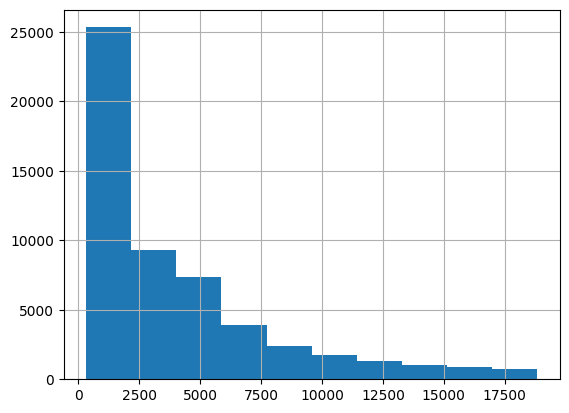

In [ ]:
# CASE : Data pada dataset tidak berdistribusi normal
datas['price'].hist()

Grafik data pada kolom "price" menunjukan data yang cenderung miring ke kanan (skewed positif) atau bisa dikatakan mengekor ke kanan.

Dataa banyak berkumpul di antara 0-2500 namun banyak yang mengekor lebih dari 2500. Hal ini mengakibatkan data tidak berdistribusi normal (puncak ada di tengah) sehingga butuh ditransformasi.

Kasus seperti ini bisa dikatakan bahwa data termasuk dalam distribusi lognormal yang ditandai dengan ciri" di atas. Data seperti ini bisa diubah dengan transformasi logaritma agar datanya lebih terdistribusi normal

<Axes: >

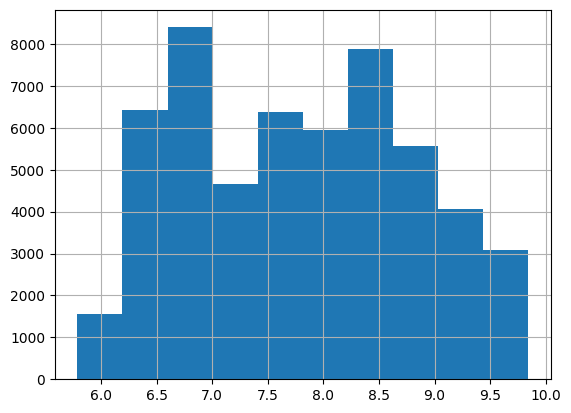

In [ ]:
#  Trasnformasi menggunakan .apply()
log=datas['price'].apply(np.log)
log.hist()

In [ ]:
# Transformasi menggunakan annonymous function
datas['price']=datas['price'].apply(lambda x: np.log(x)+1) # +1 untuk menghindari nilai log yang nol
datas

carat        cut color clarity  depth  table     price     x     y  \
0       0.23      Ideal     E     SI2   61.5   55.0  6.786897  3.95  3.98   
1       0.21    Premium     E     SI1   59.8   61.0  6.786897  3.89  3.84   
2       0.23       Good     E     VS1   56.9   65.0  6.789960  4.05  4.07   
3       0.29    Premium     I     VS2   62.4   58.0  6.811141  4.20  4.23   
4       0.31       Good     J     SI2   63.3   58.0  6.814131  4.34  4.35   
...      ...        ...   ...     ...    ...    ...       ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0  8.921898  5.75  5.76   
53936   0.72       Good     D     SI1   63.1   55.0  8.921898  5.69  5.75   
53937   0.70  Very Good     D     SI1   62.8   60.0  8.921898  5.66  5.68   
53938   0.86    Premium     H     SI2   61.0   58.0  8.921898  6.15  6.12   
53939   0.75      Ideal     D     SI2   62.2   55.0  8.921898  5.83  5.87   

          z  
0      2.43  
1      2.31  
2      2.31  
3      2.63  
4      2.75  
...     ...  
53935  3.50  
53936  3.61  
53937  3.56  
53938  3.74  
53939  3.64  

[53940 rows x 10 columns]

In [ ]:
# Transformasi menggunakan funtion yang didefinisikan
q1,q3=datas['price'].quantile([0.25,0.75])
IQR=q3-q1

def outlier(x):
  if (x>q3+1.5*IQR) or (x<q1+1.5*IQR):
    return True
  else:
    return False

datas['coba']=datas['price'].apply(outlier)
datas['coba']

0        True
1        True
2        True
3        True
4        True
         ... 
53935    True
53936    True
53937    True
53938    True
53939    True
Name: coba, Length: 53940, dtype: bool

In [ ]:
datas.head()

carat      cut color clarity  depth  table     price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0  6.786897  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0  6.786897  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0  6.789960  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0  6.811141  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0  6.814131  4.34  4.35  2.75   

   coba  
0  True  
1  True  
2  True  
3  True  
4  True

In [ ]:
datas[datas['coba']==True]

carat        cut color clarity  depth  table     price     x     y  \
0       0.23      Ideal     E     SI2   61.5   55.0  6.786897  3.95  3.98   
1       0.21    Premium     E     SI1   59.8   61.0  6.786897  3.89  3.84   
2       0.23       Good     E     VS1   56.9   65.0  6.789960  4.05  4.07   
3       0.29    Premium     I     VS2   62.4   58.0  6.811141  4.20  4.23   
4       0.31       Good     J     SI2   63.3   58.0  6.814131  4.34  4.35   
...      ...        ...   ...     ...    ...    ...       ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0  8.921898  5.75  5.76   
53936   0.72       Good     D     SI1   63.1   55.0  8.921898  5.69  5.75   
53937   0.70  Very Good     D     SI1   62.8   60.0  8.921898  5.66  5.68   
53938   0.86    Premium     H     SI2   61.0   58.0  8.921898  6.15  6.12   
53939   0.75      Ideal     D     SI2   62.2   55.0  8.921898  5.83  5.87   

          z  coba  
0      2.43  True  
1      2.31  True  
2      2.31  True  
3      2.63  True  
4      2.75  True  
...     ...   ...  
53935  3.50  True  
53936  3.61  True  
53937  3.56  True  
53938  3.74  True  
53939  3.64  True  

[50887 rows x 11 columns]

## Standardisasi

Digunakan saat ingin mengagregasi atau membandingkan dua buha data atau lebih yang tidak memiliki skala yang sama. Standardisasi dimaksudkan untuk mengubah data menjadi lebih apple to apple.

Konteks berikut menggambarkan saat kita ingin memproses data antara carat(berat berlian) dengan price nya.

In [ ]:
# Menggunakan metode min max dengan membuat function

def minmax(x):
  hasil = (x-x.min())/(x.max()-x.min())
  return hasil

datas[['carat','price']].apply(minmax, axis=0) # Axis=0 berarti melakukan operasi function pada tiap kolom di satu baris

carat     price
0      0.006237  0.000000
1      0.002079  0.000000
2      0.006237  0.000755
3      0.018711  0.005977
4      0.022869  0.006714
...         ...       ...
53935  0.108108  0.526389
53936  0.108108  0.526389
53937  0.103950  0.526389
53938  0.137214  0.526389
53939  0.114345  0.526389

[53940 rows x 2 columns]

In [ ]:
# Menggunakan library sklearn
from sklearn.preprocessing import MinMaxScaler

minmax=MinMaxScaler()
hasil=minmax.fit_transform(datas[['carat','price']])

In [ ]:
hasil   # Hasil nya berupa array

array([[6.23700624e-03, 0.00000000e+00],
       [2.07900208e-03, 0.00000000e+00],
       [6.23700624e-03, 5.40628210e-05],
       ...,
       [1.03950104e-01, 1.31426718e-01],
       [1.37214137e-01, 1.31426718e-01],
       [1.14345114e-01, 1.31426718e-01]])

In [ ]:
# buat hasil menajdi dataframe
sil=pd.DataFrame(hasil,columns=['carat','price'])
sil

carat     price
0      0.006237  0.000000
1      0.002079  0.000000
2      0.006237  0.000054
3      0.018711  0.000433
4      0.022869  0.000487
...         ...       ...
53935  0.108108  0.131427
53936  0.108108  0.131427
53937  0.103950  0.131427
53938  0.137214  0.131427
53939  0.114345  0.131427

[53940 rows x 2 columns]

In [ ]:
# Standardisasi menggunakan z value

def normal_scale(x):
  hasil = (x-x.mean())/x.std()
  return hasil

In [ ]:
datas[['carat','price']].apply(normal_scale,axis=0)

carat     price
0     -1.198157 -0.904087
1     -1.240350 -0.904087
2     -1.198157 -0.903836
3     -1.071577 -0.902081
4     -1.029384 -0.901831
...         ...       ...
53935 -0.164426 -0.294728
53936 -0.164426 -0.294728
53937 -0.206619 -0.294728
53938  0.130926 -0.294728
53939 -0.101136 -0.294728

[53940 rows x 2 columns]

In [ ]:
# Standardisasi menggunakna z value method dengan library sklearn
from sklearn.preprocessing import StandardScaler

standar=StandardScaler()
hasil=standar.fit_transform(datas[['carat','price']])

In [ ]:
hasil

array([[-1.19816781, -0.90409516],
       [-1.24036129, -0.90409516],
       [-1.19816781, -0.9038445 ],
       ...,
       [-0.20662095, -0.29473076],
       [ 0.13092691, -0.29473076],
       [-0.10113725, -0.29473076]])

In [ ]:
sil=pd.DataFrame(hasil,columns=['carat','price'])
sil

carat     price
0     -1.198168 -0.904095
1     -1.240361 -0.904095
2     -1.198168 -0.903844
3     -1.071587 -0.902090
4     -1.029394 -0.901839
...         ...       ...
53935 -0.164427 -0.294731
53936 -0.164427 -0.294731
53937 -0.206621 -0.294731
53938  0.130927 -0.294731
53939 -0.101137 -0.294731

[53940 rows x 2 columns]

## Encoding

Merupakan cara atau metode dalam merubah data bertipe catogory menjadi tipe data yang lebih mudah dibaca oleh komputer

In [ ]:
# Label Encoding
# Merubah data kategori menjadi angka
## MEnggunakan pandas

datas['cut']=datas['cut'].astype('category')    # Ubah tipe data string menjadi catogory
datas['cut_encode']=datas['cut'].cat.codes
datas[['cut','cut_encode']]

cut  cut_encode
0          Ideal           0
1        Premium           1
2           Good           3
3        Premium           1
4           Good           3
...          ...         ...
53935      Ideal           0
53936       Good           3
53937  Very Good           2
53938    Premium           1
53939      Ideal           0

[53940 rows x 2 columns]

In [ ]:
## Menggunakan libraries sklearn
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
hasil=label.fit_transform(datas['cut'])

In [ ]:
hasil

array([2, 3, 1, ..., 4, 3, 2])

In [ ]:
# hasil yang didapat bisa di reverse kembali menjadi category
label.inverse_transform(hasil)

array(['Ideal', 'Premium', 'Good', ..., 'Very Good', 'Premium', 'Ideal'],
      dtype=object)

In [ ]:
# One Hot Encoding
# Mengubah tipe data category menjadi data angka biner 0 atau 1
## Menggunakan pnadas

pd.get_dummies(datas["cut"],drop_first=True)

Premium  Very Good   Good   Fair
0        False      False  False  False
1         True      False  False  False
2        False      False   True  False
3         True      False  False  False
4        False      False   True  False
...        ...        ...    ...    ...
53935    False      False  False  False
53936    False      False   True  False
53937    False       True  False  False
53938     True      False  False  False
53939    False      False  False  False

[53940 rows x 4 columns]

In [ ]:
## Menggnakan sklearn

from sklearn.preprocessing import OneHotEncoder
hot=OneHotEncoder()
hasil= hot.fit_transform(datas[['cut']])

In [ ]:
pd.DataFrame(hasil.toarray())

0    1    2    3    4
0      0.0  0.0  1.0  0.0  0.0
1      0.0  0.0  0.0  1.0  0.0
2      0.0  1.0  0.0  0.0  0.0
3      0.0  0.0  0.0  1.0  0.0
4      0.0  1.0  0.0  0.0  0.0
...    ...  ...  ...  ...  ...
53935  0.0  0.0  1.0  0.0  0.0
53936  0.0  1.0  0.0  0.0  0.0
53937  0.0  0.0  0.0  0.0  1.0
53938  0.0  0.0  0.0  1.0  0.0
53939  0.0  0.0  1.0  0.0  0.0

[53940 rows x 5 columns]

# **Datetime**

Cheatsheet format Tanggal:

  - %Y : Tahun penuh (2020)
  - %y : Tahun pendek (22)
  - %m : Bulan dalam angka (10)
  - %B : Bulan versi tulisan penuh (October)
  - %b : bulan versi tulisan singkat (Oct)
  - %d : Tanggla (10)

Cheatsheet format waktu:

  - %A : Nama hari penuh (Saturday)
  - %a : Nama hari singkat (Sat)
  - %w : Nama hari dalam angka (0-6) (0=Sunday)
  - %H : Jam (0-23) (20)
  - %h : jam (0-11) (8) . Biasa digunakan untuk format jam yang menggunakan am dan pm
  - %M : Menit (24)
  - %S : Detik (48)
  - %p : AM/PM (AM)

## Datetime format

In [ ]:
import datetime as dt

In [ ]:
dt.datetime (year=2025, month=7 ,day=31)  # Jika tidak sesuai dengan kaidahnya maka akan eror

datetime.datetime(2025, 7, 31, 0, 0)

In [ ]:
tanggal=dt.datetime(2025,7,31)
tanggal

datetime.datetime(2025, 7, 31, 0, 0)

In [ ]:
# Ubah format date time ke string
a= tanggal.strftime("%Y %B %d")
b= tanggal.strftime("%d-%b-%Y")
print(a)
print(b)

2025 July 31
31-Jul-2025


In [ ]:
# Mengubah kembali string ke format datetime
tanggal.strptime(b,"%d-%b-%Y")

datetime.datetime(2025, 7, 31, 0, 0)

## Timedelta

In [ ]:
# Menggunakan timedelta
from datetime import datetime,timedelta

In [ ]:
# Mengecek 10 hari sebelum dan sesudah hari ini
a= datetime.today()-timedelta(days=10)
b= datetime.today()+timedelta(days=10)
c= datetime.today()

print(f'Hari ini adalah : {c.strftime("%d %B %Y")}')
print(f'Sepuluh hari lalu : {a}')
print(f'Sepuluh hari esok : {b}')

Hari ini adalah : 31 July 2025
Sepuluh hari lalu : 2025-07-21 03:26:32.516453
Sepuluh hari esok : 2025-08-10 03:26:32.516558


In [ ]:
# Menggunakan relative delta
from dateutil.relativedelta import relativedelta

In [ ]:
datetime.today()+ relativedelta(months=4)

datetime.datetime(2025, 11, 30, 3, 37, 46, 90093)

## Timezone

In [ ]:
# Menggunakn timezone
from dateutil import tz
import pytz

In [ ]:
now = datetime.now(tz=tz.tzlocal())
now.tzname()    # Hasill menunjukan wilayah waktu UTC

'UTC'

In [ ]:
# Mengubah wilayah waktu
Wib = tz.gettz("Asia/Jakarta")
datetime.now(tz= Wib)

datetime.datetime(2025, 7, 31, 11, 7, 5, 478952, tzinfo=tzfile('/usr/share/zoneinfo/Asia/Jakarta'))

In [ ]:
now.replace(tzinfo=Wib)

datetime.datetime(2025, 7, 31, 4, 4, 25, 565835, tzinfo=tzfile('/usr/share/zoneinfo/Asia/Jakarta'))

In [ ]:
now = datetime.now(tz=tz.tzlocal())
now.tzname()    # Hasill menunjukan wilayah waktu UTC
wib= pytz.timezone("Asia/Jakarta")
datetime.now(tz=wib)
a= now.replace(tzinfo=wib)
a

datetime.datetime(2025, 7, 31, 4, 15, 25, 139866, tzinfo=<DstTzInfo 'Asia/Jakarta' LMT+7:07:00 STD>)

# **Datetime in Pandas**

In [ ]:
import seaborn as sns
import pandas as pd
import datetime as dt
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

## Pandas datetime

In [ ]:
# load contoh datset
datas=sns.load_dataset('taxis')
datas.head()

pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  
1  Upper West Side South      Manhattan       Manhattan  
2           West Village      Manhattan       Manhattan  
3         Yorkville West      Manhattan       Manhattan  
4         Yorkville West      Manhattan       Manhattan

In [ ]:
# Cek tipe data dari kolom yang seharunsya berformat date
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [ ]:
# Mengubah format data pada kolom pandas menjadi datetime

datas['pickup']=pd.to_datetime(datas['pickup'])
datas['dropoff']=pd.to_datetime(datas['dropoff'])
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [ ]:
# Memngelompokan data datetime menjadi bebrapa kelompok waktu

datas['pickup'].dt.to_period("W").unique()

<PeriodArray>
['2019-03-18/2019-03-24', '2019-03-04/2019-03-10', '2019-03-25/2019-03-31',
 '2019-03-11/2019-03-17', '2019-02-25/2019-03-03']
Length: 5, dtype: period[W-SUN]

In [ ]:
# Mengecek/ Mengesktrak kompoonen date pada data datetime pandasa
datas['pickup'].dt.day.unique()

array([23,  4, 27, 10, 30, 11, 26, 22,  8, 16, 20, 18, 19, 15, 25, 21, 28,
       24,  3,  6,  1, 17,  7, 14, 13,  5,  9,  2, 31, 12, 29],
      dtype=int32)

In [ ]:
# Cek timesone dari data datetime di pandas
datas['pickup'].dt.tz     # Jika tidak muncul apa" berarti belum di define timezone nya

In [ ]:
# Definsikan timezone dari data
datas['pickup'].dt.tz_localize('UTC')

0      2019-03-23 20:21:09+00:00
1      2019-03-04 16:11:55+00:00
2      2019-03-27 17:53:01+00:00
3      2019-03-10 01:23:59+00:00
4      2019-03-30 13:27:42+00:00
                  ...           
6428   2019-03-31 09:51:53+00:00
6429   2019-03-31 17:38:00+00:00
6430   2019-03-23 22:55:18+00:00
6431   2019-03-04 10:09:25+00:00
6432   2019-03-13 19:31:22+00:00
Name: pickup, Length: 6433, dtype: datetime64[ns, UTC]

In [ ]:
# Merubah timezone data datetime di pandas
datas['pickup'].dt.tz_localize('UTC').dt.tz_convert('Asia/Jakarta')

0      2019-03-24 03:21:09+07:00
1      2019-03-04 23:11:55+07:00
2      2019-03-28 00:53:01+07:00
3      2019-03-10 08:23:59+07:00
4      2019-03-30 20:27:42+07:00
                  ...           
6428   2019-03-31 16:51:53+07:00
6429   2019-04-01 00:38:00+07:00
6430   2019-03-24 05:55:18+07:00
6431   2019-03-04 17:09:25+07:00
6432   2019-03-14 02:31:22+07:00
Name: pickup, Length: 6433, dtype: datetime64[ns, Asia/Jakarta]

## Pandas timedelta

In [ ]:
# Melihat perbedaan waktu
(datas["dropoff"] - datas["pickup"])

0      0 days 00:06:15
1      0 days 00:07:05
2      0 days 00:07:24
3      0 days 00:25:52
4      0 days 00:09:32
             ...      
6428   0 days 00:03:34
6429   0 days 00:56:23
6430   0 days 00:19:07
6431   0 days 00:05:04
6432   0 days 00:16:40
Length: 6433, dtype: timedelta64[ns]

In [ ]:
# Melihat perbedaan waktu dalam detik
(datas["dropoff"] - datas["pickup"]).dt.seconds/60

0        6.250000
1        7.083333
2        7.400000
3       25.866667
4        9.533333
          ...    
6428     3.566667
6429    56.383333
6430    19.116667
6431     5.066667
6432    16.666667
Length: 6433, dtype: float64

In [ ]:
# Menggunakan timedelta untuk mengetahui waktu teretentu dari value kolom pandas
datas["dropoff"] + pd.to_timedelta(4, unit = "d")

0      2019-03-27 20:27:24
1      2019-03-08 16:19:00
2      2019-03-31 18:00:25
3      2019-03-14 01:49:51
4      2019-04-03 13:37:14
               ...        
6428   2019-04-04 09:55:27
6429   2019-04-04 18:34:23
6430   2019-03-27 23:14:25
6431   2019-03-08 10:14:29
6432   2019-03-17 19:48:02
Name: dropoff, Length: 6433, dtype: datetime64[ns]

## Window Agregat

In [ ]:
# Date Agreagte
datas['pickup'].min()

Timestamp('2019-02-28 23:29:03')

In [ ]:
# resample
datas.groupby('payment').resample("1d", on='pickup'). agg({'passengers':"sum",
                                                           'tip': 'max'})

passengers    tip
payment     pickup                       
cash        2019-02-28           1   0.00
            2019-03-01         104   0.00
            2019-03-02          86   0.00
            2019-03-03          67   0.00
            2019-03-04          71   0.00
...                            ...    ...
credit card 2019-03-27         263  16.39
            2019-03-28         227  20.80
            2019-03-29         211  23.19
            2019-03-30         268  20.08
            2019-03-31         202  12.21

[63 rows x 2 columns]

In [ ]:
# LAG and Lead
# LAG = data ke-n sebelum data tersebut

datas['pick_hmin1']=datas['pickup'].shift(1)
datas

pickup             dropoff  passengers  distance  fare  \
0    2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0   
1    2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0   
2    2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5   
3    2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0   
4    2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0   
...                  ...                 ...         ...       ...   ...   
6428 2019-03-31 09:51:53 2019-03-31 09:55:27           1      0.75   4.5   
6429 2019-03-31 17:38:00 2019-03-31 18:34:23           1     18.74  58.0   
6430 2019-03-23 22:55:18 2019-03-23 23:14:25           1      4.14  16.0   
6431 2019-03-04 10:09:25 2019-03-04 10:14:29           1      1.12   6.0   
6432 2019-03-13 19:31:22 2019-03-13 19:48:02           1      3.85  15.0   

       tip  tolls  total   color      payment            pickup_zone  \
0     2.15    0.0  12.95  yellow  credit card        Lenox Hill West   
1     0.00    0.0   9.30  yellow         cash  Upper West Side South   
2     2.36    0.0  14.16  yellow  credit card          Alphabet City   
3     6.15    0.0  36.95  yellow  credit card              Hudson Sq   
4     1.10    0.0  13.40  yellow  credit card           Midtown East   
...    ...    ...    ...     ...          ...                    ...   
6428  1.06    0.0   6.36   green  credit card      East Harlem North   
6429  0.00    0.0  58.80   green  credit card                Jamaica   
6430  0.00    0.0  17.30   green         cash    Crown Heights North   
6431  0.00    0.0   6.80   green  credit card          East New York   
6432  3.36    0.0  20.16   green  credit card            Boerum Hill   

                          dropoff_zone pickup_borough dropoff_borough  \
0                  UN/Turtle Bay South      Manhattan       Manhattan   
1                Upper West Side South      Manhattan       Manhattan   
2                         West Village      Manhattan       Manhattan   
3                       Yorkville West      Manhattan       Manhattan   
4                       Yorkville West      Manhattan       Manhattan   
...                                ...            ...             ...   
6428              Central Harlem North      Manhattan       Manhattan   
6429  East Concourse/Concourse Village         Queens           Bronx   
6430                    Bushwick North       Brooklyn        Brooklyn   
6431      East Flatbush/Remsen Village       Brooklyn        Brooklyn   
6432                   Windsor Terrace       Brooklyn        Brooklyn   

              pick_hmin1  
0                    NaT  
1    2019-03-23 20:21:09  
2    2019-03-04 16:11:55  
3    2019-03-27 17:53:01  
4    2019-03-10 01:23:59  
...                  ...  
6428 2019-03-23 18:26:09  
6429 2019-03-31 09:51:53  
6430 2019-03-31 17:38:00  
6431 2019-03-23 22:55:18  
6432 2019-03-04 10:09:25  

[6433 rows x 15 columns]

In [ ]:
# Lead= data ke-n setelah data tersebut

datas['pick_hplus3']=datas['pickup'].shift(-3)
datas

pickup             dropoff  passengers  distance  fare  \
0    2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0   
1    2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0   
2    2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5   
3    2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0   
4    2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0   
...                  ...                 ...         ...       ...   ...   
6428 2019-03-31 09:51:53 2019-03-31 09:55:27           1      0.75   4.5   
6429 2019-03-31 17:38:00 2019-03-31 18:34:23           1     18.74  58.0   
6430 2019-03-23 22:55:18 2019-03-23 23:14:25           1      4.14  16.0   
6431 2019-03-04 10:09:25 2019-03-04 10:14:29           1      1.12   6.0   
6432 2019-03-13 19:31:22 2019-03-13 19:48:02           1      3.85  15.0   

       tip  tolls  total   color      payment            pickup_zone  \
0     2.15    0.0  12.95  yellow  credit card        Lenox Hill West   
1     0.00    0.0   9.30  yellow         cash  Upper West Side South   
2     2.36    0.0  14.16  yellow  credit card          Alphabet City   
3     6.15    0.0  36.95  yellow  credit card              Hudson Sq   
4     1.10    0.0  13.40  yellow  credit card           Midtown East   
...    ...    ...    ...     ...          ...                    ...   
6428  1.06    0.0   6.36   green  credit card      East Harlem North   
6429  0.00    0.0  58.80   green  credit card                Jamaica   
6430  0.00    0.0  17.30   green         cash    Crown Heights North   
6431  0.00    0.0   6.80   green  credit card          East New York   
6432  3.36    0.0  20.16   green  credit card            Boerum Hill   

                          dropoff_zone pickup_borough dropoff_borough  \
0                  UN/Turtle Bay South      Manhattan       Manhattan   
1                Upper West Side South      Manhattan       Manhattan   
2                         West Village      Manhattan       Manhattan   
3                       Yorkville West      Manhattan       Manhattan   
4                       Yorkville West      Manhattan       Manhattan   
...                                ...            ...             ...   
6428              Central Harlem North      Manhattan       Manhattan   
6429  East Concourse/Concourse Village         Queens           Bronx   
6430                    Bushwick North       Brooklyn        Brooklyn   
6431      East Flatbush/Remsen Village       Brooklyn        Brooklyn   
6432                   Windsor Terrace       Brooklyn        Brooklyn   

              pick_hmin1         pick_hplus3  
0                    NaT 2019-03-10 01:23:59  
1    2019-03-23 20:21:09 2019-03-30 13:27:42  
2    2019-03-04 16:11:55 2019-03-11 10:37:23  
3    2019-03-27 17:53:01 2019-03-26 21:07:31  
4    2019-03-10 01:23:59 2019-03-22 12:47:13  
...                  ...                 ...  
6428 2019-03-23 18:26:09 2019-03-04 10:09:25  
6429 2019-03-31 09:51:53 2019-03-13 19:31:22  
6430 2019-03-31 17:38:00                 NaT  
6431 2019-03-23 22:55:18                 NaT  
6432 2019-03-04 10:09:25                 NaT  

[6433 rows x 16 columns]

In [ ]:
# Rolling = Mengagregrasi berdasrkan periode waktu tertentu

datas.sort_values('pickup')['passengers'].rolling(3).sum()

6203    NaN
884     NaN
2882    7.0
4212    7.0
661     8.0
       ... 
4220    3.0
2849    3.0
542     3.0
4067    3.0
591     7.0
Name: passengers, Length: 6433, dtype: float64

# **Data Visualization (Matplotplib)**

## Matplotlib

In [ ]:
# import matplotlib
import matplotlib.pyplot as plt

**NOTE**

Jika sewaktu-waktu terjadi eror baik dalam visualisasi atau pendefinisian sintaks bisa menggunakan sintask berikut untuk merestrat matlotlin:

- from importlib import reload
- import matplotlib.pyplot as plt
- reload(plt)

## Pyplot

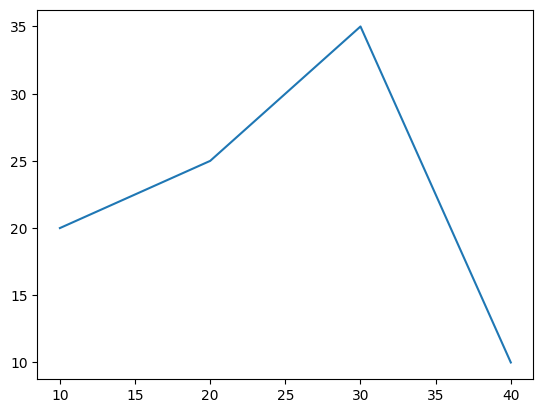

In [ ]:
## Membuat grafik sederhana dengan pyplot

# Define data
a = [10, 20, 30, 40]
b = [20, 25, 35, 10]

# Create grafik
plt.plot(a,b)

# Show grafik
plt.show()

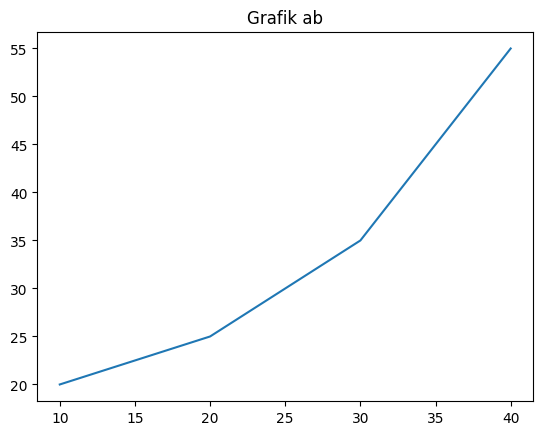

In [ ]:
## Menambahkan Judul grafik

# Define data
a = [10, 20, 30, 40]
b = [20, 25, 35, 55]

# Create grafik
plt.plot(a,b)

# Membuat Judul
plt.title('Grafik ab')

# Show grafik
plt.show()

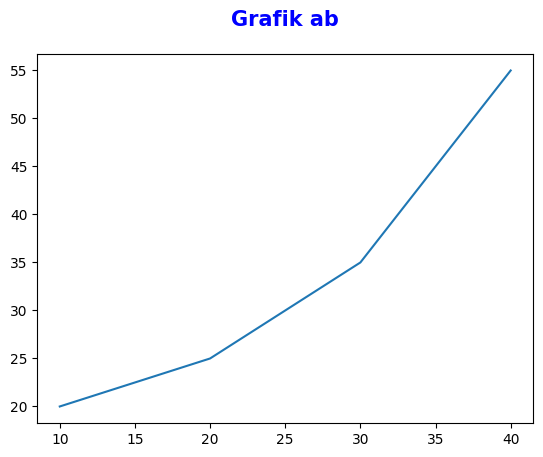

In [ ]:
## Custom Judul Grafik
# Define data
a = [10, 20, 30, 40]
b = [20, 25, 35, 55]

# Create grafik
plt.plot(a,b)

# Membuat Judul
plt.title('Grafik ab',fontsize=15,fontweight='bold',color='b',pad=20)

# Show grafik
plt.show()

**NOTE**
- fontsize : ukuran tulisa
- fontweight : mengatur bold tulisan
- color : mengatur warna tulisan
- pad : mengatur jarak tulisan dengan grafik inti

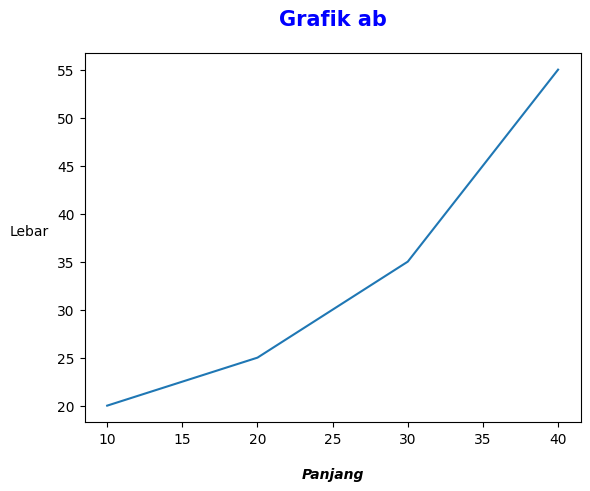

In [ ]:
## Menambahkan label pada setaip sumbu grafik
# Define data
a = [10, 20, 30, 40]
b = [20, 25, 35, 55]

# Create grafik
plt.plot(a,b)

# Membuat Judul
plt.title('Grafik ab',fontsize=15,fontweight='bold',color='b',pad=20)

# Membuat label sumbu x
plt.xlabel('Panjang',fontweight='bold',fontstyle='italic',labelpad=15)

# Membuatt label sumbu y
plt.ylabel('Lebar',rotation=360,labelpad=20)

# Show grafik
plt.show()

**NOTE**
- fontstyle : mengubah font menjadi italic
- labelpad : mnegatur jaraj antara label dengan grafik
- loc : mengatur posisi label (tengah/kanan/kiri)
- rotation : mnegatur orientasi dari label

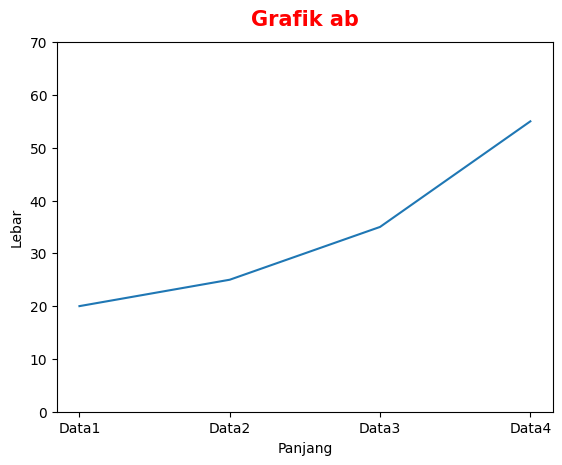

In [ ]:
## Mengatur limit dari x/y axis dan mengatur nama dari axis tersebut
a = [10, 20, 30, 40]
b = [20, 25, 35, 55]

# Create grafik
plt.plot(a,b)

# Membuat Judul
plt.title('Grafik ab',fontsize=15,fontweight='bold',color='red',pad=12)

# Membuat label sumbu x
plt.xlabel('Panjang')

# Membuatt label sumbu y
plt.ylabel('Lebar')

# Mengatur limit dari axis
plt.ylim(0,70)

# Mengatur nama dari axis
plt.xticks(a,labels=['Data1','Data2','Data3','Data4'])

# Show grafik
plt.show()

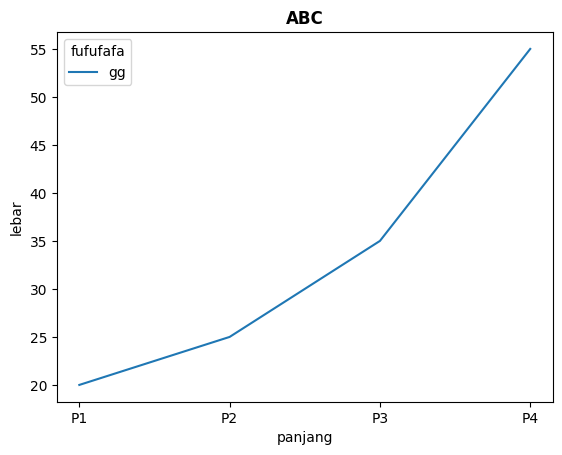

In [ ]:
## Menambhakna legend

a = [10, 20, 30, 40]
b = [20, 25, 35, 55]

# create grafik
plt.plot(a,b)

# Mmebuat judul
plt.title('ABC',fontweight='bold')

# Membuat label axis
plt.xlabel('panjang')
plt.ylabel('lebar')

# Membuat nama axis
plt.xticks(a,labels=['P1','P2','P3','P4'])

# Menambahkan legend
plt.legend(['gg']).set_title('fufufafa')

plt.show()

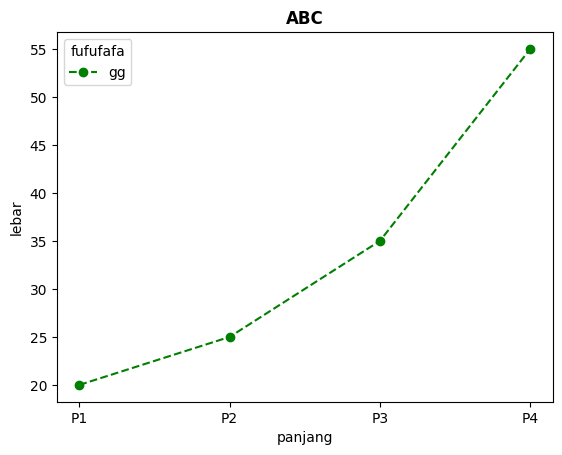

In [ ]:
## Melalukan customize pada line grafik
## Menambhakna legend

a = [10, 20, 30, 40]
b = [20, 25, 35, 55]

# create grafik
plt.plot(a,b,color='g',linestyle='--',marker='o')

# Mmebuat judul
plt.title('ABC',fontweight='bold')

# Membuat label axis
plt.xlabel('panjang')
plt.ylabel('lebar')

# Membuat nama axis
plt.xticks(a,labels=['P1','P2','P3','P4'])

# Menambahkan legend
plt.legend(['gg']).set_title('fufufafa')

plt.show()

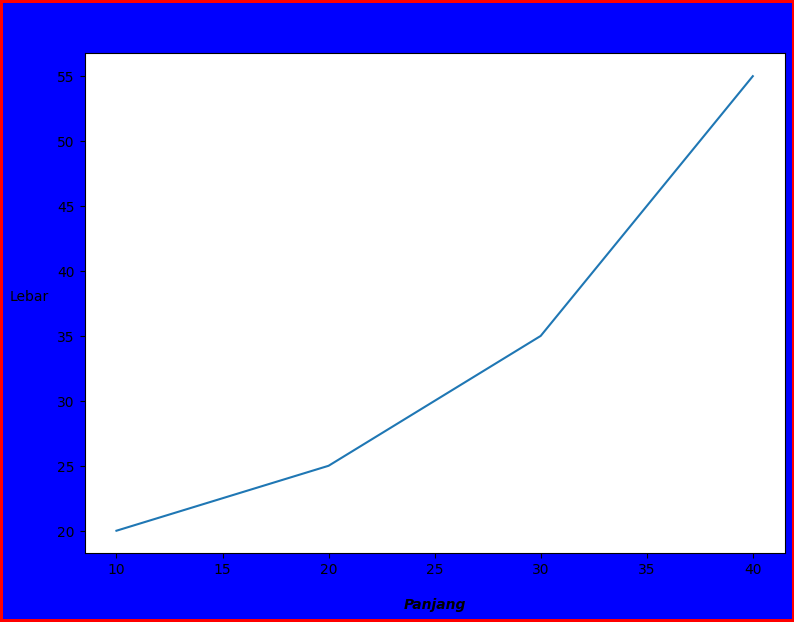

In [ ]:
## Membuat Figure
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

# Define data
a = [10, 20, 30, 40]
b = [20, 25, 35, 55]

# Definsikan figure
fig= plt.figure(figsize=(7,5),facecolor='b',linewidth=4,edgecolor='r')

# buat plot dari fig
ax=fig.add_axes([1,1,1,1])    # Fungsi add_axes adalah menambahkan sekaligus mengatur letak diagram pada figure.

# Create grafik
ax.plot(a,b)

# Membuat Judul
plt.title('Grafik ab',fontsize=15,fontweight='bold',color='b',pad=20)

# Membuat label sumbu x
plt.xlabel('Panjang',fontweight='bold',fontstyle='italic',labelpad=15)

# Membuatt label sumbu y
plt.ylabel('Lebar',rotation=360,labelpad=20)

# Show grafik
plt.show()

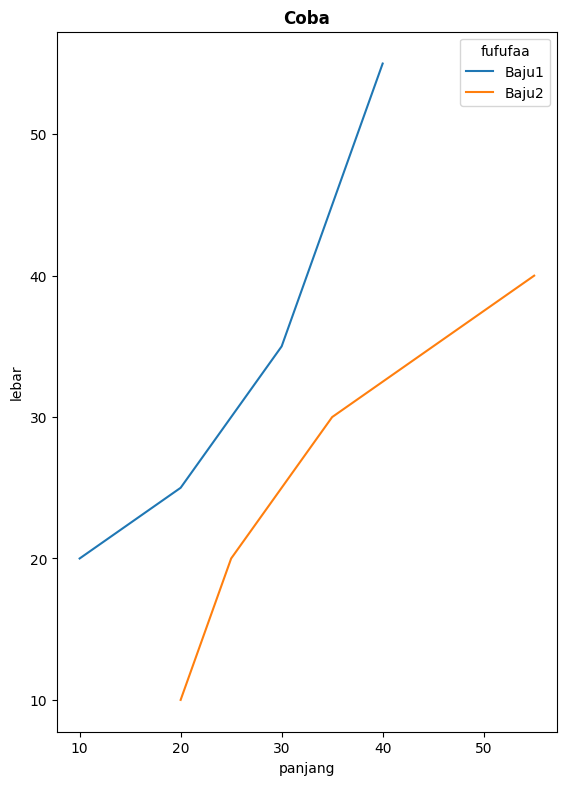

In [ ]:
## Membuat multiple plot/multiple grafik dalam satu axes
# Define data
a = [10, 20, 30, 40]
b = [20, 25, 35, 55]

# Buat figure
fig=plt.figure(figsize=(5,7))

# Buat axes
ax=fig.add_axes([1,1,1,1])

# Buat Judul
ax.set_title('Coba',fontweight='bold')

# ploting grafik
ax1=ax.plot(a,b)
ax2=ax.plot(b,a)

# Buat label x dan y
ax.set_xlabel('panjang')
ax.set_ylabel('lebar')

# Tambah legend
ax.legend(labels=['Baju1','Baju2']).set_title('fufufaa')

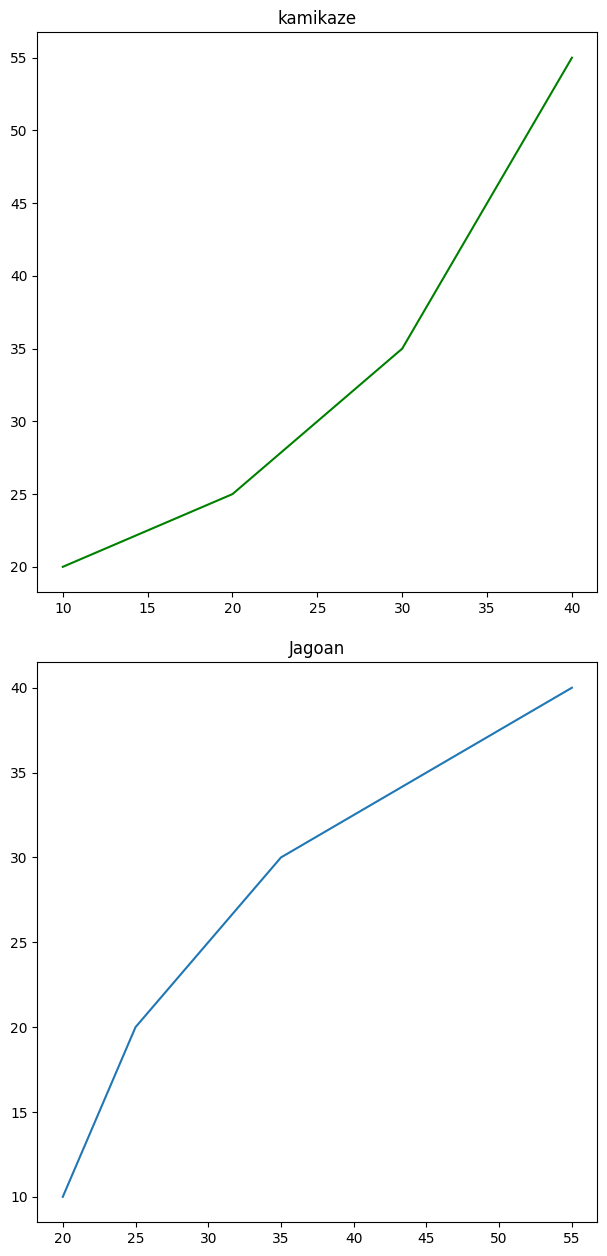

In [ ]:
## Membuat multiple plot/multiple grafik dalam axes yang berbeda
# Define data
a = [10, 20, 30, 40]
b = [20, 25, 35, 55]

# Buat figure
fig=plt.figure(figsize=(7,7))

# buat axes
ax1=fig.add_axes([0,0.9,0.8,0.8])
ax2=fig.add_axes([0,0,0.8,0.8])

# Buat judul dari setiap axes
ax1.set_title('kamikaze')
ax2.set_title('Jagoan')

# Plot data ke axes
ax1.plot(a,b,color='g')
ax2.plot(b,a)

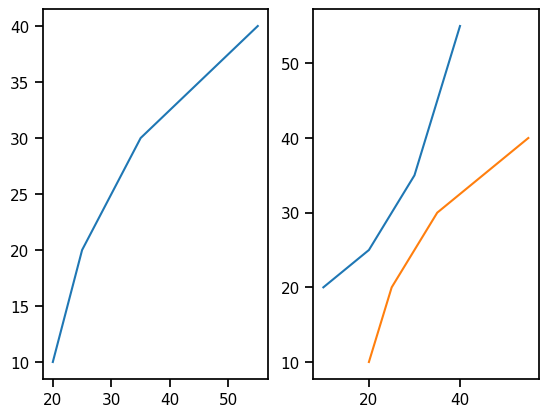

In [ ]:
## Membuat multiple grafik dengan subplot

import matplotlib.pyplot as plt


# initializing the data
x = [10, 20, 30, 40]
y = [20, 25, 35, 55]


# Creating figure object
plt.figure()

# adding first subplot
plt.subplot(1,2,2)
plt.plot(x, y)
plt.plot(y,x)

# adding second subplot
plt.subplot(121)
plt.plot(y, x)

**NOTE**
plt.subplot(x,y,z) berarti:
  - x : jumlah baris pada subplot
  - y : jumlah kolom pada subplot
  - z : urutan ke-n subplot

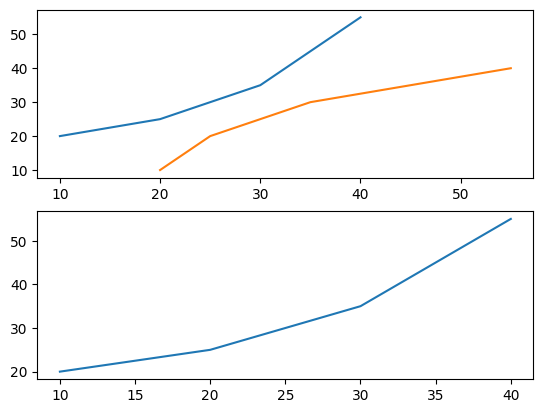

In [ ]:
## Mmebuat multiple grafik dengan subplots
# initializing the data
x = [10, 20, 30, 40]
y = [20, 25, 35, 55]

# Creating the figure and subplots
# according the argument passed
fig, axes = plt.subplots(2, 1)

# plotting the data in the
# 1st subplot
axes[0].plot(x, y)

# plotting the data in the 1st
# subplot only
axes[0].plot(y, x)

# plotting the data in the 2nd
# subplot only
axes[1].plot(x, y)

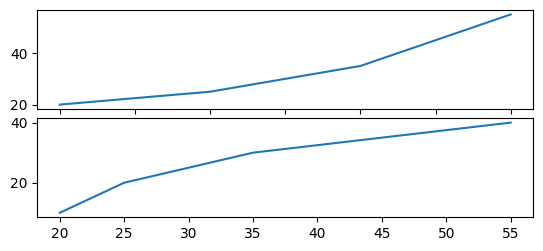

In [ ]:
## Menggunakan sub2grid
import matplotlib.pyplot as plt

# initializing the data
x = [10, 20, 30, 40]
y = [20, 25, 35, 55]

# adding the subplots
axes1 = plt.subplot2grid (
(7, 1), (0, 0), rowspan = 2, colspan = 1)

axes2 = plt.subplot2grid (
(7, 1), (2, 0), rowspan = 2, colspan = 1)

# plotting the data
axes1.plot(x, y)
axes2.plot(y, x)

**NOTE**


# **Data Visualization Type**

In [ ]:
# Import library yang dibutuhkan dan load dataset yang digunakan
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataBase/tips.csv')
data.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

## Line Chart

Text(0, 0.5, 'Tip')

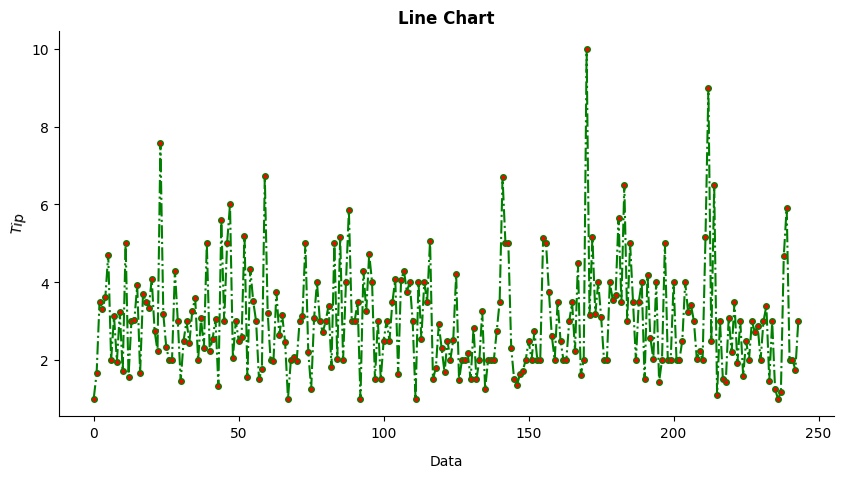

In [ ]:
# Buat canvas fig
plt.figure(figsize=(10,5))

# '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

# Buat plot data di fig
plt.plot(data['tip'],linestyle='-.',marker='o',color='g',markerfacecolor='r',markersize='4')

# Buat judul
plt.title('Line Chart',fontweight='bold')

# Buat axis label
plt.xlabel('Data',labelpad=10)
plt.ylabel('Tip',rotation=80)

**NOTE**
- linestyle : Gaya garis ('-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted')
- color : warna garis
- marker : Bentuk marker
- markerfacecolor : warna marker
- markersize : ukuran marker

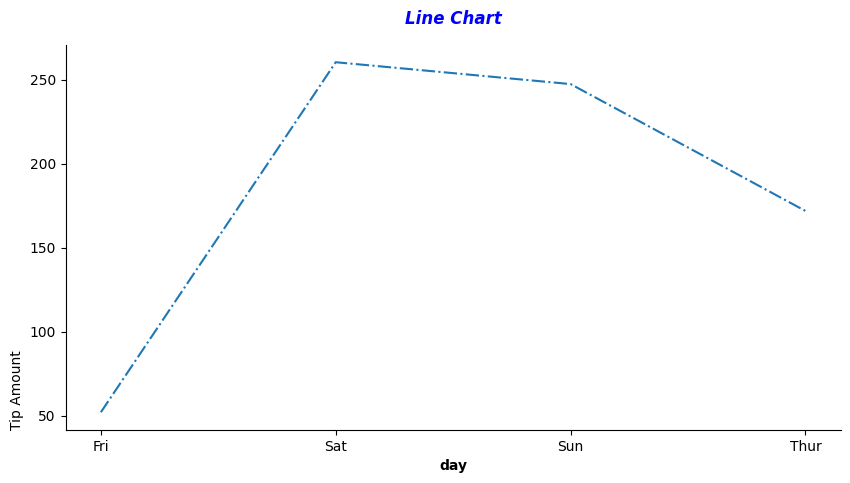

In [ ]:
# Another Example
# Define data (menggunakan data yang sama nnamun sudah di group by harinya)
datax = data.groupby('day')['tip'].sum().reset_index()

# Buat figure
plt.figure(figsize=(10,5))

# Mengatur frame dari grafik (menghilangkan garis frame)
plt.rcParams['axes.spines.top'] =False
plt.rcParams['axes.spines.right']=False

# Plot data ke fig
plt.plot(datax['day'],datax['tip'],linestyle='-.')

# Buat judul
plt.title('Line Chart',color='b',fontweight='bold',pad=15,fontstyle='italic')

# Buat label pada axis
plt.xlabel('day',fontweight='bold')
plt.ylabel('Tip Amount',loc='bottom')

plt.show()

**NOTE**

Untuk menghilangkan garis border grafik bisa menggunakan:
  - plt.rcParams['axes.spines.top/bottom/right/left'].set_values(False)

atau jika sudah mendefinisikan axes:
  - ax.spines.set_values(False)

## Bar Chart

Text(0.5, 1.0, 'Bar Chart Vertical')

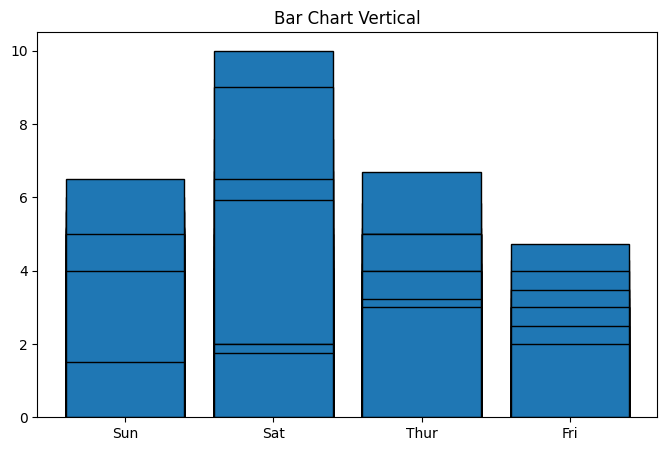

In [ ]:
# Bar Chart
# Define data untuk dibuatkna grafik
a=data['day']
b=data['tip']

# Buat figure
plt.figure(figsize=(8,5))

# Buat plot bar chart
plt.bar(a,b,edgecolor='black')


# BUat title
plt.title('Bar Chart Vertical')

Text(0.5, 1.0, 'Bar Chart Horizontal')

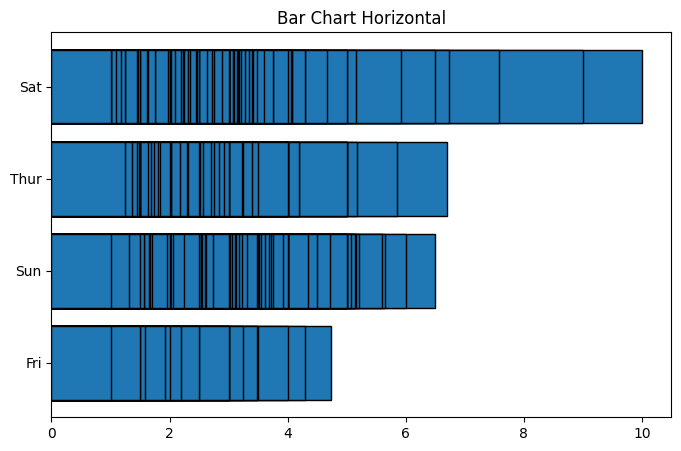

In [ ]:
# Bar Chart Horizontal
# Define data untuk dibuatkna grafik
dat=data.sort_values(by='tip',ascending=False)
a=dat['day']
b=dat['tip']

# Buat figure
plt.figure(figsize=(8,5))

# Buat plot bar chart
plt.barh(a,b,edgecolor='black')
plt.gca().invert_yaxis()

# BUat title
plt.title('Bar Chart Horizontal')

**NOTE**

Sintaks gca() atau bisa disebut dengan get current axsi merupakan sintaks yang berfungsi sebagai mengambil fungsi dari axis yang ada dalam figure untuk berbagai keperluan seperti customization.

Text(0, 0.5, 'Tip')

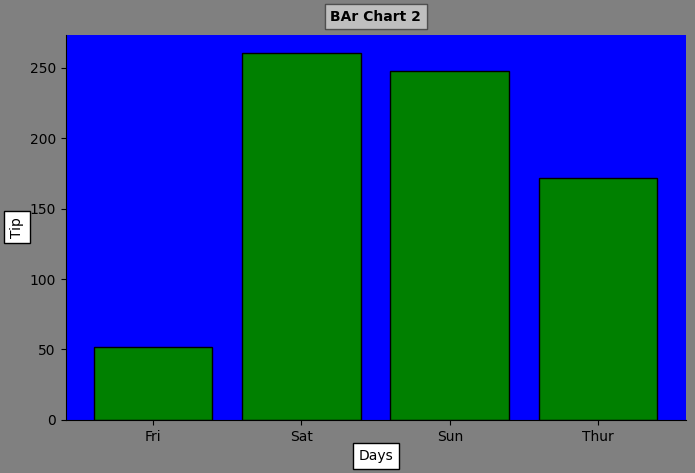

In [ ]:
# Bar Chart 2
# define data
a=datax['day']
b=datax['tip']

# Baut Figure
plt.figure(figsize=(8,5),facecolor='grey')

# BUat plot bar
plt.bar(a,b,color='g',edgecolor='black',width=0.8)
plt.gca().set_facecolor('blue')   # Mengubah warna background dari area plot

# Buat Title
plt.title('BAr Chart 2',fontsize=10,fontweight='bold',bbox=dict(facecolor='white',alpha=0.5),pad=10)

# Buat x dan y label
plt.xlabel('Days',bbox=dict(facecolor='white'))
plt.ylabel('Tip',bbox=dict(facecolor='white'))

**NOTE**
- color : warna batang grafik
- width : lebar/besaran dari batang grafik
- edgecolor : warna border batang grafik
- linewidth : tebal border batang grafikwd

Jika ingin mnegubah warna background dari area plot:
- plt.gca().set_facecolor('blue')

Jika ingin menambahkan background pada label:
- bbox=dict(facecolor='white',alpha=0.5)
- alpha merupakan nilai transparasi dari backgroud.

## Histogram

Grafik histogram membagi data menjadi beberapa kelas, setelah itu akan menghitung frequensi data yang masuk dalam interval kelas data tersebut

Text(0, 0.5, 'Frequency')

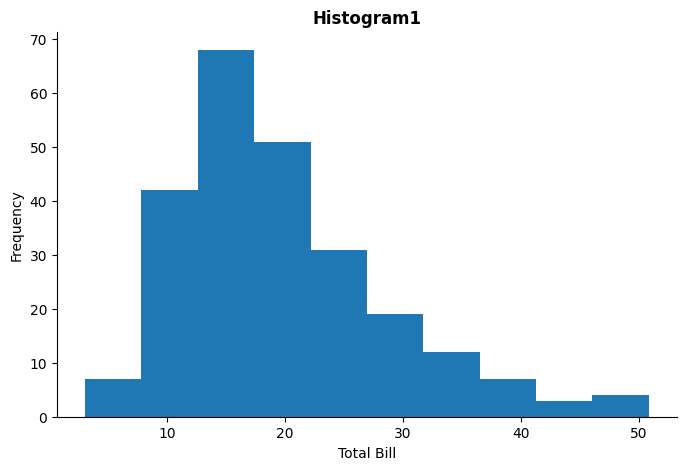

In [ ]:
# Histogram
# Define data yang digunakna
a=data['total_bill']

# BUat figure
plt.figure(figsize=(8,5))

# Plot histogram
plt.hist(a)

# Buat title
plt.title('Histogram1',fontweight='bold')

# Buatnama label pada setiap axis
plt.xlabel('Total Bill')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Histogram 2')

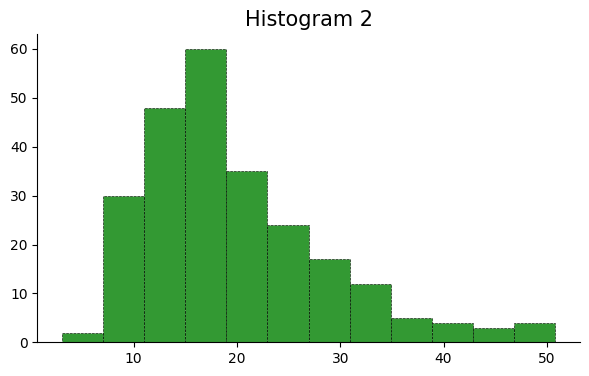

In [ ]:
# Histogram2
# Define data
v= data['total_bill']

# Buat figure
plt.figure(figsize=(7,4))

# Ploting Histogram
plt.hist(v,color='green',bins=12,linestyle='--',edgecolor='black',linewidth=0.5,alpha=0.8)

# Buat Title
plt.title('Histogram 2',fontsize=15)

**NOTE**
- bins merupakan jumlah/banyaknya bar yang disajikan.
- banyaknya bar tersebut merupakan gambaran dari banyak ya kelompok interval data yang dibuat.
- Hal ini dikarenakan histogram bekerja dengan membuat interval dari data yang diberikan lalu mencari frequensi dari setiap data pada interval tersebut.
- ada bebrapa cara untuk menentukan banyak nya interval pada grafik histogram.
- Menurut dausngongo.wordpress aturan penentuan banyaknya kelas bergantung pada banyaknya data. Jika:
  
  - n<50 : 5-7 kelas
  - 50<n<100 : 6-10 kelas
  - 101<n<150 : 7-12 kelas
  - n>150 : 10-12 kelas

## Scaterplot

Text(0, 0.5, 'Total Bill')

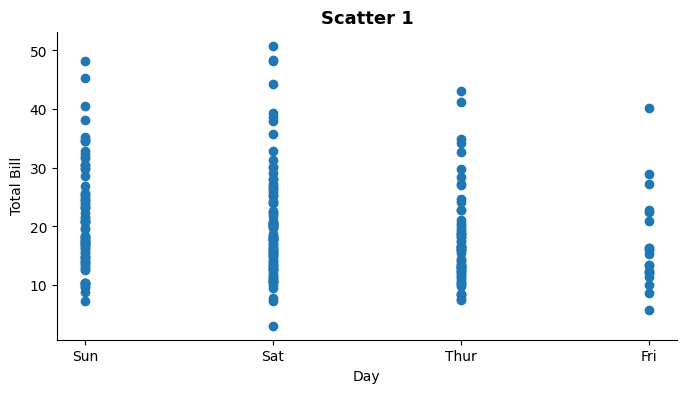

In [ ]:
# Scaterplot
# Define data
a=data['day']
b=data['total_bill']

# Buat figure
plt.figure(figsize=(8,4))

# plot scater
plt.scatter(a,b)

# Buat title
plt.title('Scatter 1',fontsize=13,fontweight='bold')

# Buat label axis
plt.xlabel('Day')
plt.ylabel('Total Bill')

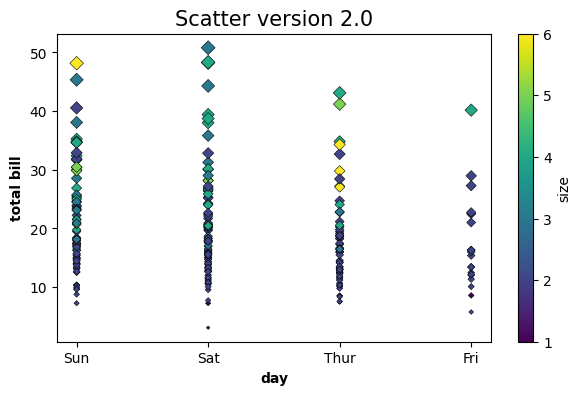

In [ ]:
# Scatter Plot 2
# Define data
a=data['day']
b=data['total_bill']

# Buat figure
plt.figure(figsize=(7,4))

# Buat plot
plt.scatter(a,b,c=data['size'],marker='D',s=data['total_bill'],edgecolor='black',linewidths=0.4)

# Buat judul
plt.title('Scatter version 2.0',fontsize=15)

# BUat label axis
plt.xlabel('day',fontweight='bold')
plt.ylabel('total bill',fontweight='bold')

# Buat legend color bar
plt.colorbar().set_label('size')

plt.show()

**NOTE**
- s : membuat plot menjadi memiliki skala dalam hal ukuran
- c : membuat plot memiliki skala dalam hal warna
- marker : gaya plot/ bentuk plot

Jika menggunakan skala warna pada plot dapat dilengkapi dengan color bar sebagai legend:
- plt.colorbar()
- .set_label() untuk menambahkan label pada colorbar

## Pie Chart

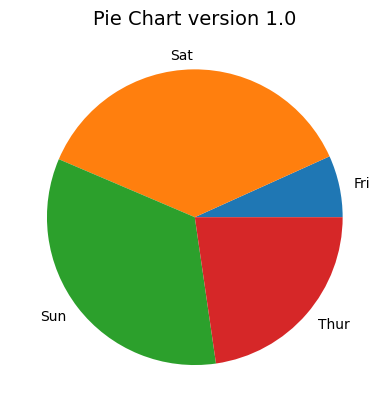

In [ ]:
# Pie Chart
# Define data yang digunkan
datad = data.groupby('day')['total_bill'].sum().reset_index()

# Plot pie chart
plt.pie(datad['total_bill'],labels=datad['day'])

# Buat Judul
plt.title('Pie Chart version 1.0',fontsize=(14))

plt.show()

Text(0.5, 1.0, 'Pie Chart 2')

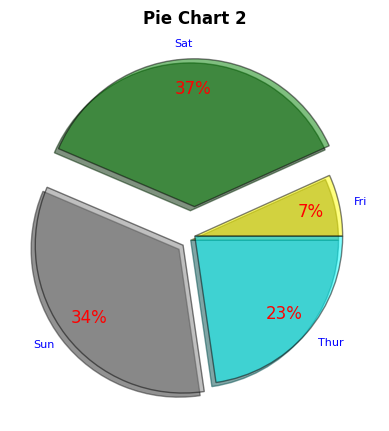

In [ ]:
# Pie CHart 2
# Define data
datad = data.groupby('day')['total_bill'].sum().reset_index()
colors=['yellow','green','grey','cyan']

# Buat plot
_,labels,autopct = plt.pie(datad['total_bill'],labels=datad['day'],autopct='%.0f%%',explode=[0,0.2,0.1,0],
        shadow=True,wedgeprops={'edgecolor': 'black', 'linewidth': 1,'alpha':0.5},colors=colors,labeldistance=1.1,pctdistance=0.8)

plt.setp(labels,fontsize=8,color='blue')
plt.setp(autopct,fontsize=12,color='red')
plt.title('Pie Chart 2',pad=20,fontweight='bold')

## Save Hasil Grafik

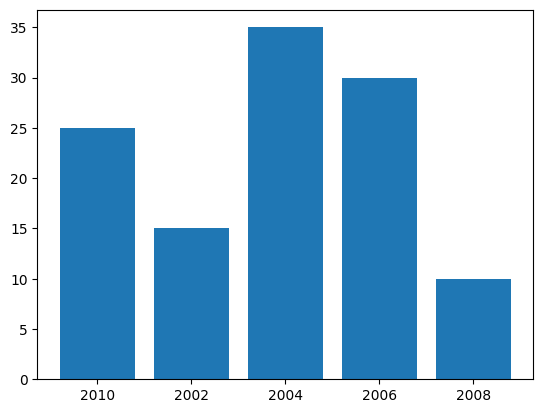

In [ ]:
import matplotlib.pyplot as plt

# Creating data
year = ['2010', '2002', '2004', '2006', '2008']
production = [25, 15, 35, 30, 10]

# Plotting barchart
plt.bar(year, production)

# Saving the figure.
plt.savefig("outputoo.png")
plt.show()

# Saving figure by changing parameter values
# plt.savefig("output1", facecolor='y', bbox_inches="tight",
# 			pad_inches=0.3, transparent=True)

# **Data VIsualization Seaborn**

In [ ]:
# Import library yang dibutuhkan
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# Load adata yang digunakan
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataBase/tips.csv')
data.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

## LIne plot

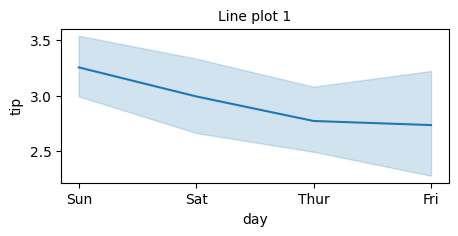

In [ ]:
# Line Plot

# Buat figure
plt.figure(figsize=(5,2))
# Ploting line
sns.lineplot(x='day',y='tip',data=data)
# Buat judul
plt.title('Line plot 1',fontsize=10)
plt.show()

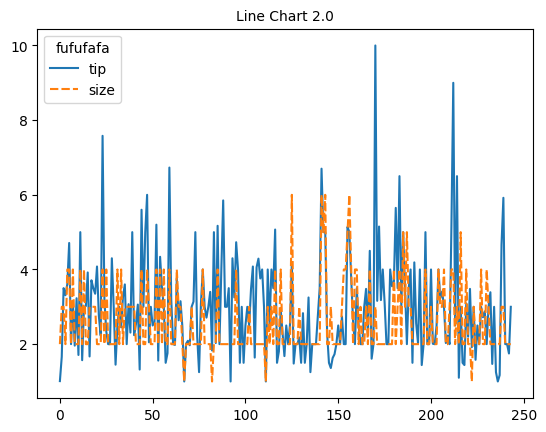

In [ ]:
# Line Chart with multiple data

# Ploting line
sns.lineplot(data=data[['tip','size']])
# Buat judul
plt.title('Line Chart 2.0',fontsize=10)
plt.legend().set_title('fufufafa')

plt.show()

Text(0.5, 1.0, 'Line Plot 3.0')

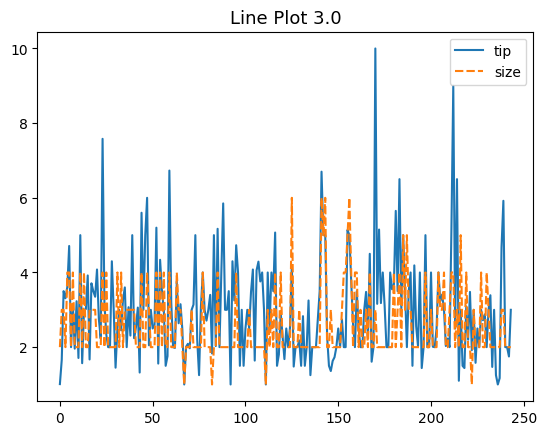

In [ ]:
# Line plot with multiple data

# Plot data
sns.lineplot(data=data.drop(['total_bill'], axis=1))
# Buat judul
plt.title('Line Plot 3.0',fontsize=13)

## Scatter Plot

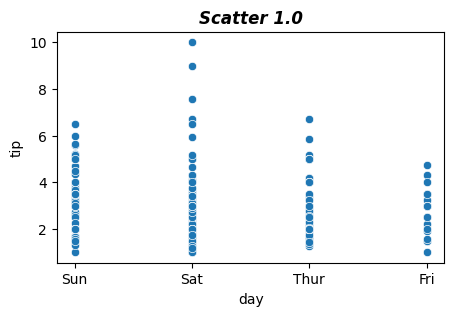

In [ ]:
# Scatter Plot

# Buat figure
plt.figure(figsize=(5,3))
# BUat plot
sns.scatterplot(x='day',y='tip',data=data)
# Buat Judul
plt.title('Scatter 1.0',fontweight='bold',style='italic')
plt.show()

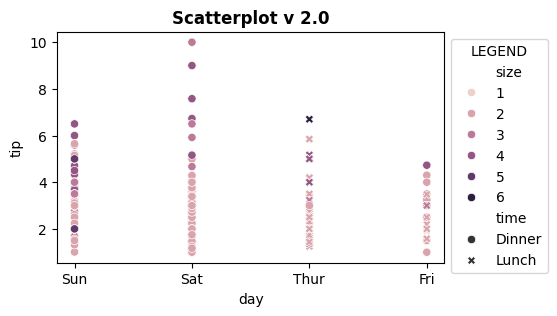

In [ ]:
# Scatterplot dengan warna dan style plot. Legend digabung
# Buat figure
plt.figure(figsize=(5,3))
# Buat plot
sns.scatterplot(x='day',y='tip',data=data,hue='size',style='time')
# Buat judul
plt.title('Scatterplot v 2.0',fontweight='bold')
# Mengatur legend
plt.legend(loc='upper left',ncol=1,bbox_to_anchor=(1, 1)).set_title('LEGEND')

<Figure size 700x500 with 0 Axes>

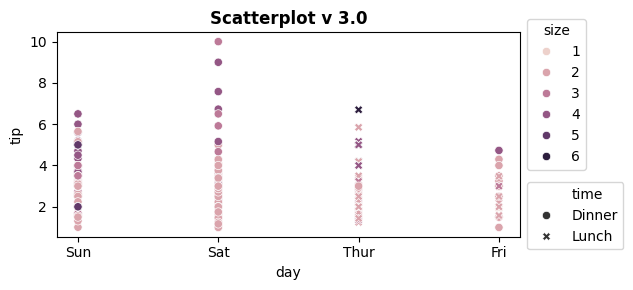

In [ ]:
# Scatterplot dengan warna dan style plot. Legend diusahakan dipisah

# Buat figure
plt.figure(figsize=(7,5))
# az=plt.subplot(figsize=(4,2))
fig, ax = plt.subplots(figsize=(7, 3))
# Buat plot
sns.scatterplot(x='day',y='tip',data=data,hue='size',style='time',ax=ax)
# Buat judul
plt.title('Scatterplot v 3.0',fontweight='bold')
# Mengatur legend
# plt.legend(loc='upper left',ncol=1,bbox_to_anchor=(1, 1)).set_title('LEGEND')

# Get the current axis
ax = plt.gca()

# Extract the handles and labels from the existing legend
handles, labels = ax.get_legend_handles_labels()

# Now manually create two legends

# One for hue (e.g. size)
legend1 = ax.legend(
    handles=handles[1:len(data['size'].unique())+1],
    labels=labels[1:len(data['size'].unique())+1],
    title='size',
    bbox_to_anchor=(1, 1.1),
    loc='upper left',
    ncol=1
)

# Add the second legend for style (e.g. time)
legend2 = ax.legend(
    handles=handles[len(data['size'].unique())+1:],
    labels=labels[len(data['size'].unique())+1:],
    bbox_to_anchor=(1, 0.3),
    loc='upper left'
)

# Add the first legend back so it’s not removed by the second one
ax.add_artist(legend1)
plt.tight_layout()
plt.subplots_adjust(right=0.75)

plt.show()

## Bar PLot

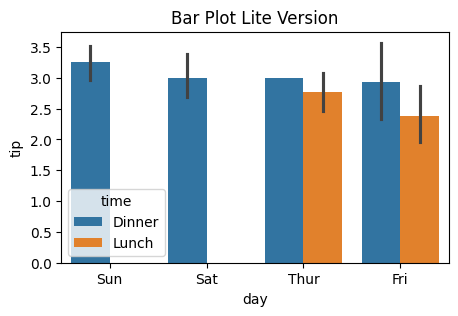

In [ ]:
# Bar Plot

# BUat FIgure
plt.figure(figsize=(5,3))
# Buat bar plot
sns.barplot(x='day', y='tip',data=data,hue='time')
# Buat Judul
plt.title('Bar Plot Lite Version')

plt.show()

**NOTE**

COba cari tahu kembali customizitation dari barplot

## HIstogram

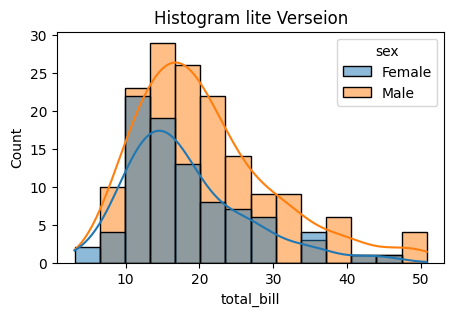

In [ ]:
# Histogram

# Buat figure
plt.figure(figsize=(5,3))
# Buaat Plot Histogram
sns.histplot(x='total_bill',data=data,kde=True,hue='sex')
# Buat Judul
plt.title('Histogram lite Verseion')

plt.show()

## Customize Style

### Style

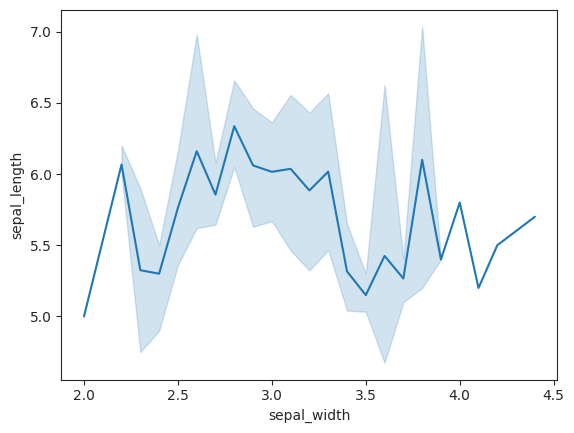

In [ ]:
# Style

# loading dataset
data = sns.load_dataset("iris")
# Buat ploting
sns.lineplot(x='sepal_width',y='sepal_length',data=data)
# Cahnge Style
sns.set_style('ticks')    # darkgrid/whitegid/dark/white/tikcs

plt.show()

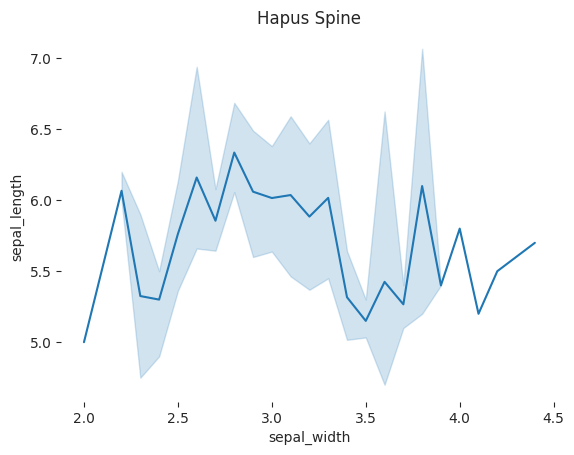

In [ ]:
# Hapus Spine(border plot)
# Buat plot
sns.lineplot(x='sepal_width',y='sepal_length',data=data)
# Buta judul
plt.title('Hapus Spine')
# hapus spine
sns.despine(bottom=True,left=True)   # Mengahpus border pada plot di atas dan di kanan

plt.show()

In [ ]:
data.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

### Scaling plot

Mengatur scalling pada plot area. Dapat digunakan dalam beberapa pilihan:
  - notebook (default)
  - paper
  - talk
  - poster

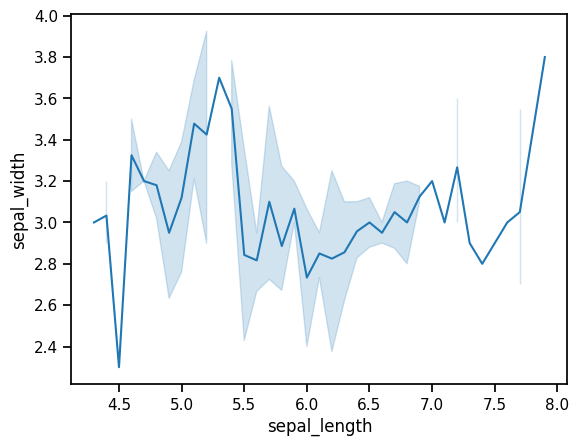

In [ ]:
# Scalling PLot
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = sns.load_dataset("iris")

# draw lineplot
sns.lineplot(x="sepal_length", y="sepal_width", data=data)

# Setting the scale of the plot
sns.set_context("notebook")

plt.show()

## Mengatur gaya sementara

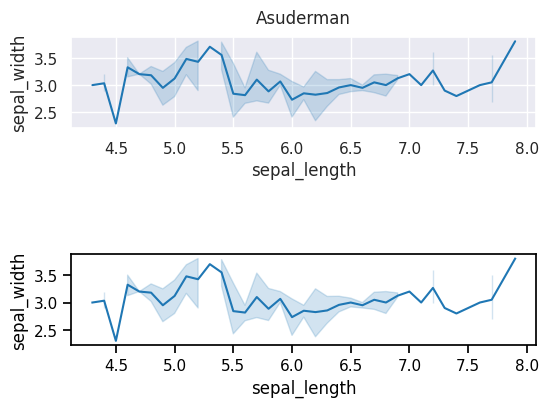

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = sns.load_dataset("iris")
plt.figure(figsize=(6,4))

def plot():
	sns.lineplot(x="sepal_length", y="sepal_width", data=data)

with sns.axes_style('darkgrid'):

	# Menambhakan subplot
  plt.subplot(311)
  plt.title('Asuderman',pad=10)
  plot()

plt.subplot(313)
plot()

## COlor Palette

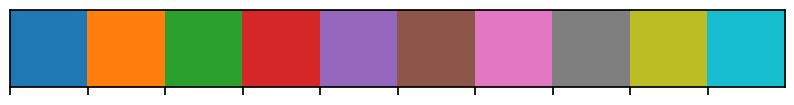

In [ ]:
# Cek color pallete yang ada di seaborn python

# Define color palette
palet=sns.color_palette()   # Jika tidak didefinisikan maka akan menampilkanpalrt warna default
# Buat plot berdasarkan array color palette
sns.palplot(palet)

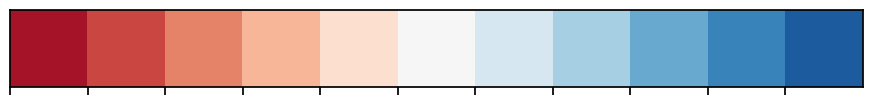

In [ ]:
# Color palette Divergen

# define color palette
palet=sns.color_palette('RdBu',11)    # 11 menunjukan banyaknya color scale
# Buat plot berdasarkan warna tersebut
sns.palplot(palet)

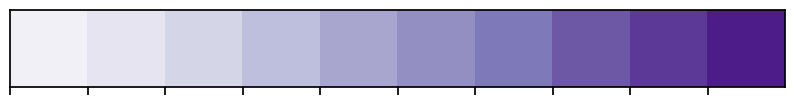

In [ ]:
# Color Palette sequence (mengurut/urut)

# define color palette
palet=sns.color_palette('Purples',10)
# Buat plot berdasarakan warna tersebut
sns.palplot(palet)

## Mengatur warna deafult dari suatu subplot

Text(0.5, 1.0, 'Grafik Kedua')

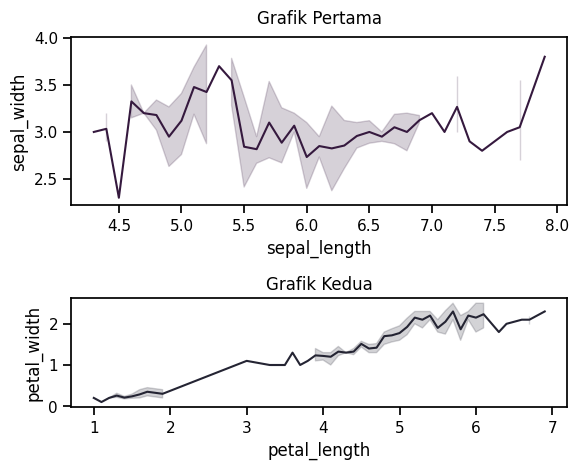

In [ ]:
# Mengatur warna dari suatu plot

# define plot
def plot(x,y):
  sns.lineplot(x=x,y=y,data=data)

# define subplot pertma
sns.set_palette('rocket')
plt.subplot(211)
plot('sepal_length','sepal_width')
plt.title('Grafik Pertama',pad=10)


# Define subplot kedua
sns.set_palette(sns.dark_palette('bluea'))
plt.subplot(313)
plot('petal_length','petal_width')
plt.title('Grafik Kedua')


**NOTE**

For more color combination of palette in seaborn lets check this site:

https://r02b.github.io/seaborn_palettes/

## Multiple Seaborn

### Metode Facetgrid

Merupakan metode yang memungkinkan membuat grafik dari hubungan antara satu variabel dengan beberapa variabel lainnya yang ditampilkan dalam plot-lot yang berbeda

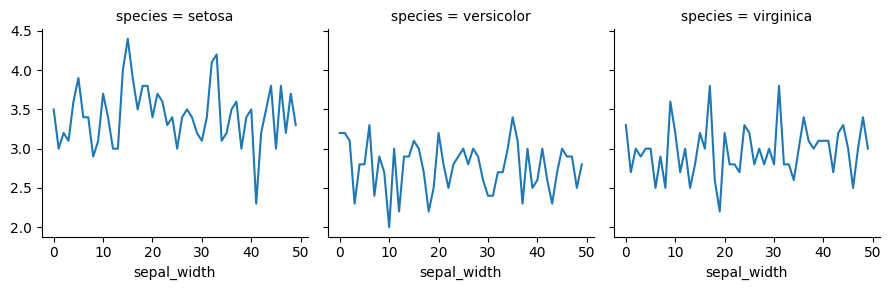

In [ ]:
# Metode 1 : Facetgrid

# Define dataset
data=sns.load_dataset('iris')
data.sort_values('sepal_width')
# Buat ploting
plot=sns.FacetGrid(data,col='species')
plot.map(plt.plot,'sepal_width')

plt.show()

**NOTE**

Grafik di atas menunjukan nilai sepal_width pada setiap elemen species yang unique. axis Y menunjukan skala sepal_width sedangkan axis X menunjukan index ke-n. Hal ini dikarenakan hanya satu data yang didefinisikan sehingga salah satu axis mengambil index untuk dijadikan parameternya.

In [ ]:
# Coret Lainnya
po=({'skor':[75,75,70,80,75,80,70,75],
    'remed':[85,80,80,85,90,85,90,85]})
kor=pd.DataFrame(po)
kor

skor  remed
0    75     85
1    75     80
2    70     80
3    80     85
4    75     90
5    80     85
6    70     90
7    75     85

In [ ]:
koko = kor.groupby('skor')['remed'].max().reset_index()
koko

skor  remed
0    70     90
1    75     90
2    80     85

In [ ]:
korr=kor.copy()
korr=korr.merge(koko, on='skor',how='left')
korr

skor  remed_x  remed_y
0    75       85       90
1    75       80       90
2    70       80       90
3    80       85       85
4    75       90       90
5    80       85       85
6    70       90       90
7    75       85       90

In [ ]:
korr=korr.rename(columns={'remed_x':'remed',
                          'remed_y':'remed_max'})
korr

skor  remed  remed_max
0    75     85         90
1    75     80         90
2    70     80         90
3    80     85         85
4    75     90         90
5    80     85         85
6    70     90         90
7    75     85         90

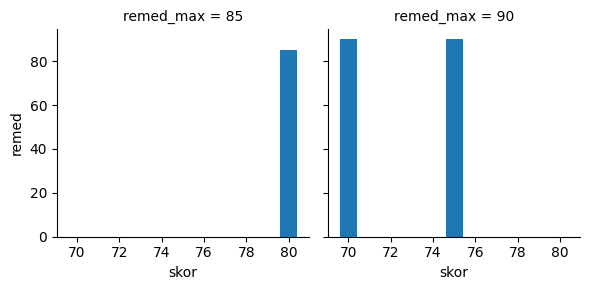

In [ ]:
kon=sns.FacetGrid(korr,col='remed_max')
kon.map(plt.bar,'skor','remed')

### Metode PairGrid

Text(0.5, 1.05, 'Pair Grid')

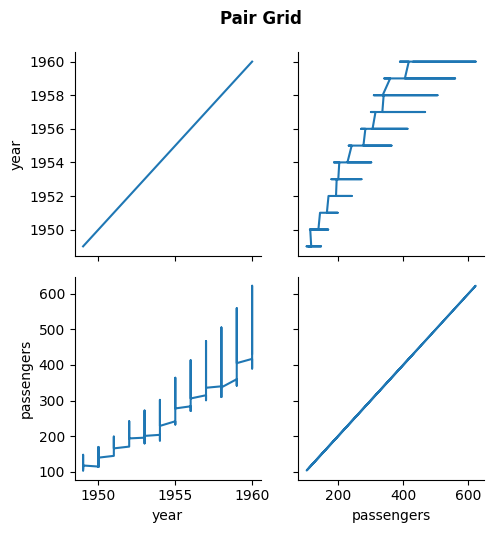

In [ ]:
# Metode 2 : PairGrid

# Define datset yang digunkan
data=sns.load_dataset('flights')
# Buat plot
datar=sns.PairGrid(data)
datar.map(plt.plot)
plt.suptitle('Pair Grid',fontweight='bold',y=1.05)

## Another Plot in Seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Relational Plot

Merupakan jenis plot yang digunakan untuk menggambarakn relasi/hubungan antara variabel.

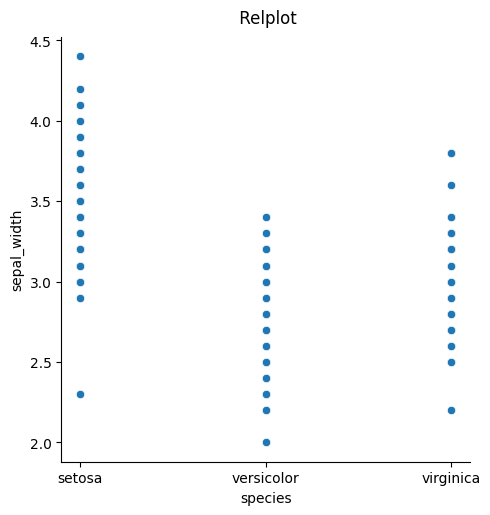

In [ ]:
## relplot
# Define data
data=sns.load_dataset('iris')
# Buat plot
sns.relplot(x='species',y='sepal_width',data=data)
plt.title(' Relplot',pad=10)
plt.show()

<Axes: xlabel='species', ylabel='sepal_width'>

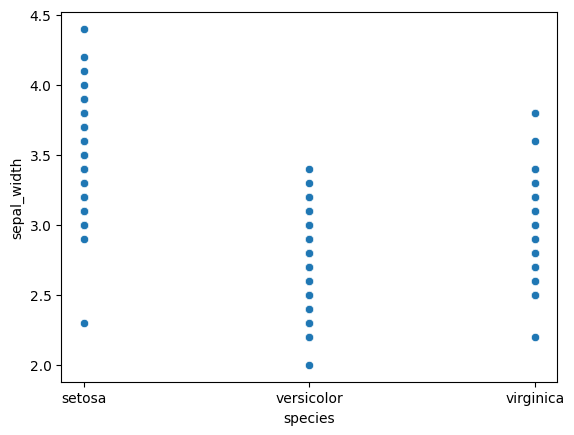

In [ ]:
## Scatter

sns.scatterplot(x='species',y='sepal_width',data=data)

### Categorical Plot

Yang termasuk dalam categorical plot adalah: bar plot,box plot,violin plot, dan strip plot

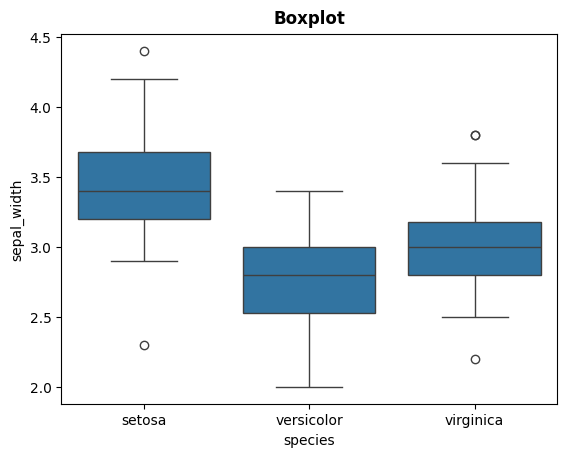

In [ ]:
## Box plot
# define data
sns.load_dataset('iris')
# Buat plot
sns.boxplot(x='species',y='sepal_width',data=data)
plt.title('Boxplot',pad=8,fontweight='bold')
plt.show()

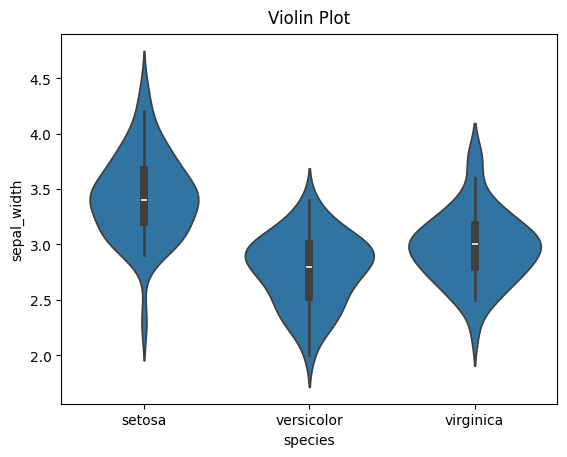

In [ ]:
## Violin PLot
# Define data
data
# Buat plot
sns.violinplot(x='species',y='sepal_width',data=data)
plt.title('Violin Plot',pad=8)
plt.show()

**NOTE**

Box plot dan violin plot memiliki fungsi yang hampir sama namun memiliki perbedaan:
  - boxplot : hanya menampilkan informasi secara statistik seperti quartil,median, dan mean.
  - violin plot : menampikan ringkasan statistik dan juga menampilkan distribusi datanya. Hanya saja untuk membacanya lebih kompleks

For more information kindly check this article: https://www.geeksforgeeks.org/data-visualization/how-is-violinplot-different-from-boxplot/

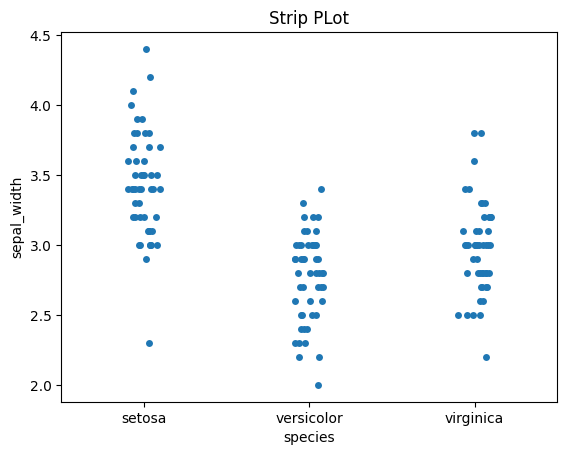

In [ ]:
## Strip PLot
# Define data
data
# Buat Plot
sns.stripplot(x='species',y='sepal_width',data=data)
plt.title('Strip PLot')
plt.show()

### Distribution Plot

/tmp/ipython-input-2861383118.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sepal_width'])  # Note: distplot` is a deprecated function and will be removed in seaborn v0.14.0.


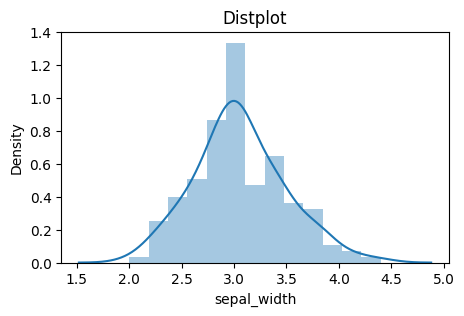

In [ ]:
## Displot (Histogram & Line)
# Define data
data
# Buat plot
plt.figure(figsize=(5,3))
sns.distplot(data['sepal_width'])  # Note: distplot` is a deprecated function and will be removed in seaborn v0.14.0.
plt.title('Distplot')
plt.show()

Text(0.5, 1.0, 'Displot')

<Figure size 200x100 with 0 Axes>

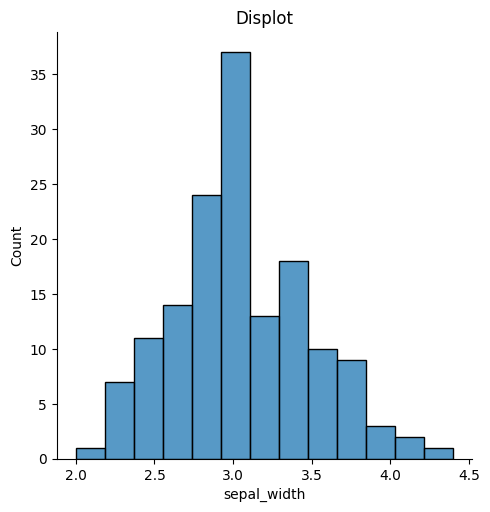

In [ ]:
# Menggunakan Displot
data
plt.figure(figsize=(2,1))
sns.displot(data['sepal_width'])  # Secara default akan menanpilkan histogram saja
plt.title('Displot')

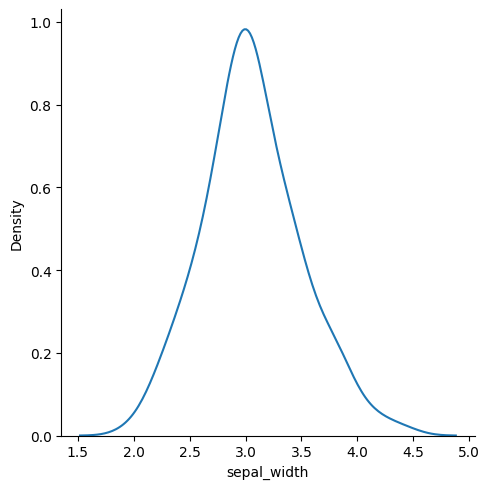

In [ ]:
# Jika ingin menggantinya dengan line chart
sns.displot(data['sepal_width'],kind='kde')

Text(0.5, 1.0, 'displot like distplot')

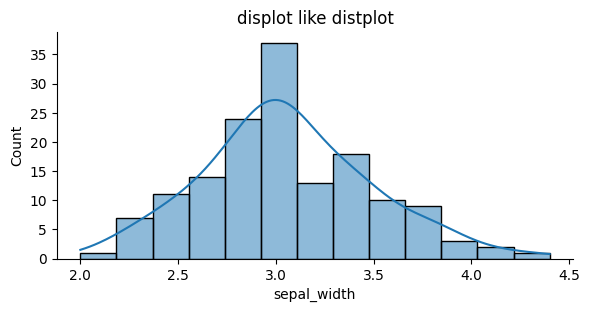

In [ ]:
# Jika ingin menampilkan seperti distplot (histogram dan line)
sns.displot(data['sepal_width'],kde=True,height=3,aspect=2)   # Atau bisa jugamenggunakan histplot langsung
plt.title('displot like distplot')

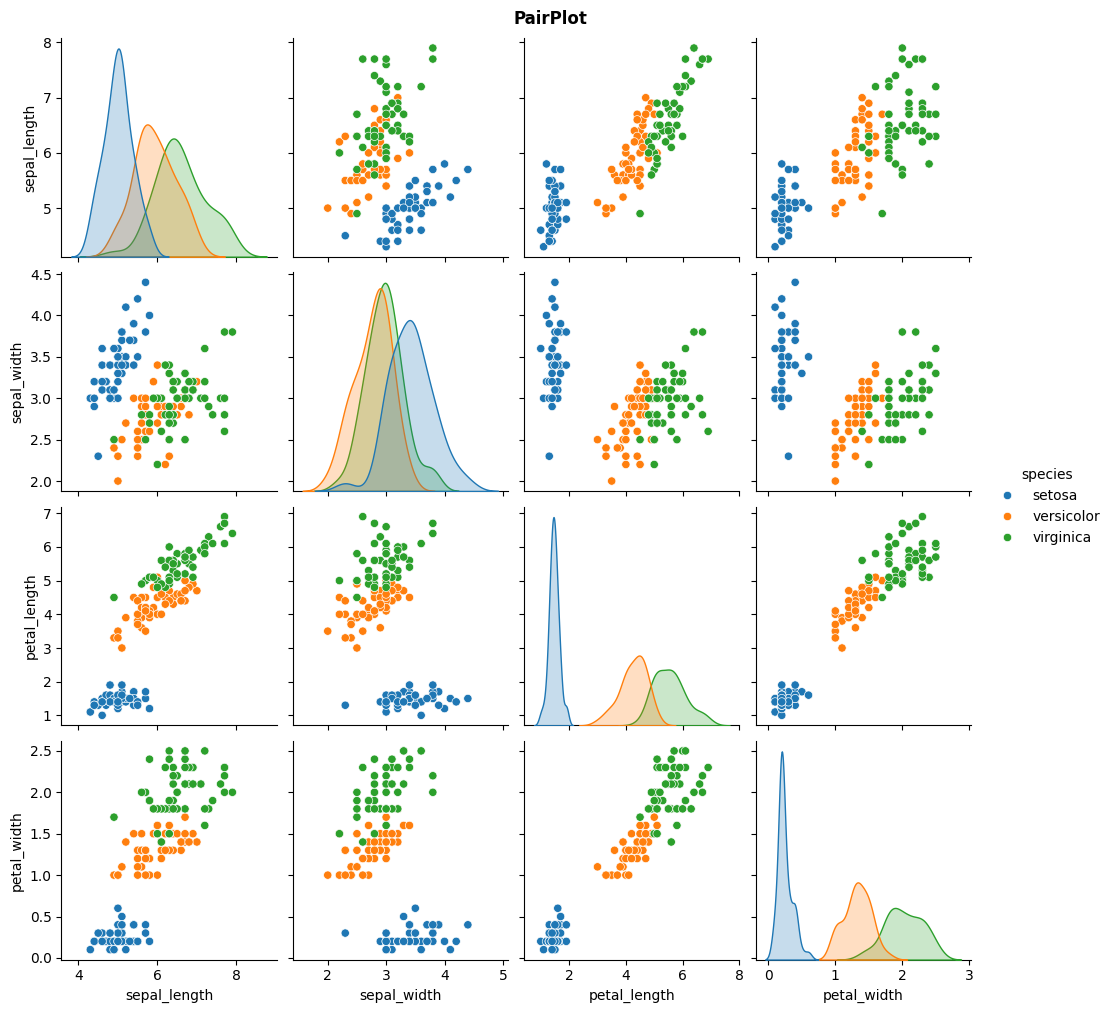

In [ ]:
## Pairplot
# Define Data
data
# Buat plot
sns.pairplot(data=data,hue='species')
plt.suptitle('PairPlot',y=1.01,fontweight='bold')
plt.show()

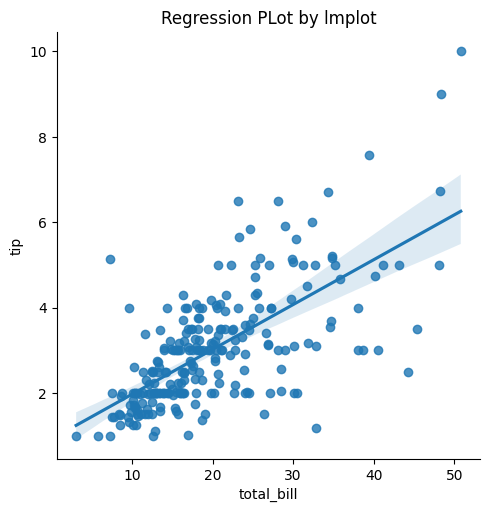

In [ ]:
## Regression PLot
# lmplot
# Define data
data=sns.load_dataset('tips')
# Buat plot
sns.lmplot(x='total_bill',y='tip',data=data,height=5)
plt.title('Regression PLot by lmplot')
plt.show()

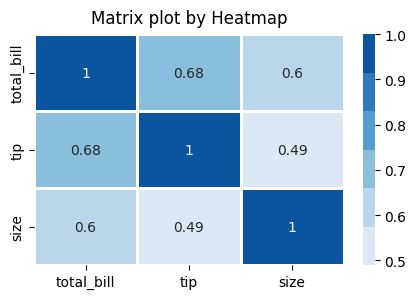

In [ ]:
# Matrixplot
# Define data yang digunakan
data
# Hitung corelasi antar data
korr= data.drop(columns=['sex','smoker','day','time']).corr()
# Buat plot
plt.figure(figsize=(5,3))
sns.heatmap(korr,cmap=sns.color_palette('Blues'),annot=True,linewidths=2)
plt.title('Matrix plot by Heatmap',pad=8)
plt.show()

# **Data Visualization Bokeh**

In [ ]:
# Cara untuk menginstall bokeh
!pip install bokeh

## Pendahuluan Bokeh

In [ ]:
# Import package yang diperlukan
from bokeh.plotting import figure,output_file,show
from bokeh.io import output_notebook
output_notebook()   # Menurut Myskill, fungsi ini harus dijalankan sat menggunakan colab untuk menampilkan hasil  bokeh

# Define data
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]
# Buat Figure
grap= figure(title='Pendahuluan',x_axis_label='X',y_axis_label='Y',width=600,height=400)
grap.title.padding=20
grap.title.align='center'
grap.title.text_color='blue'
grap.title.text_font_size='15pt'
grap.title.text_font_style='bold italic'
# grap.title.background_fill_color='lightgrey'


# Megatur besarnya plot
grap.min_border_top=30
# Buat plot/bokeh
grap.line(x,y)
# Tampilkan hasil
show(grap)

In [ ]:
# Annotasi label data menjadi Legend
# Define data yang digunkan
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]
# Buat Figure
grap= figure(title='Annotasi',x_axis_label='X',y_axis_label='Y',width=600,height=400)
# Buat plot/grafik pertama
grap.line(x,y,legend_label='Garis1')
# Buat plot/grafik kedua
grap.line(x,x,line_color='red',legend_label='Garis2')
show(grap)

In [ ]:
# Customize Legend
# Buat figure
grap = figure(title='Customize Legend',x_axis_label='X',y_axis_label='Y',width=600,height=400)
# Define data
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]
# Buat line1
grap.line(x,x,line_color='purple',line_width=3,line_dash="dashdot",legend_label='Line1')   # line_dash: solid,dsahed,dotted,dotdash,dsahdot
# Buat line2
grap.line(y,x,line_color='darkgreen',line_width=2,line_dash='dashed',legend_label='Line2')
# MEngatur legend
grap.legend.title='Jenis garis'
grap.legend.title_text_font_style='bold'
grap.legend.location='top_left'
grap.legend.background_fill_color='grey'
grap.legend.background_fill_alpha=0.2
grap.legend.border_line_color='black'
grap.legend.border_line_width=3
show(grap)

## Macam-Macam Grafik dalam Bokeh

### Plot

In [ ]:
## Bar Plot
from bokeh.models import ColumnDataSource, ranges, LabelSet
# Bar vertikal
# Difine data
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]
# Buat figure
grap=figure(title='Barplot Vertical')
# Tentukan atur lebar daari bar
width=0.95
# Buat Plot
grap.vbar(x,top=y,width=width)

show(grap)

In [ ]:
## Barplot
# Membuat label data pada barplot
## Bar Plot
from bokeh.models import ColumnDataSource, ranges, LabelSet
# Bar vertikal
# Difine data
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]
#
data={'x':[1, 2, 3, 4, 5],
      'y':[1, 2, 3, 4, 5]}
source = ColumnDataSource(data=data)
# Buat figure
grap=figure(title='Barplot Vertical w/label data')
# Tentukan atur lebar daari bar
width=0.95
# Buat Plot
grap.vbar(x='x',top='y',width=width,source=source)

labels = LabelSet(x='x', y='y', text='y', level='glyph',
                      x_offset=0, y_offset=5, source=source,
                      text_font_size="9pt", text_color="black", text_align="center")
grap.add_layout(labels)

show(grap)

In [ ]:
## BAr PLot
# Horizontal Barplot
# Define data yang digunkan
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]
# Buat figure
grap=figure(title='Bar Plot Horizontal')
# Atur jarak atau besarnya dari bar plot
height=0.8
# Buat plot
grap.hbar(x,right=y,height=height)

show(grap)

In [ ]:
## Scatter PLot
import random

# Define Dat yang digunakan
x=[n for n in range(256)]
y=[random.random()+1 for n in range(256)]
# BUat figur
grap=figure(title='Scatter in Bokeh',width=600,height=400)
# Buat Plot Scatter
grap.scatter(x=x,y=y,color='green',marker='square')

show(grap)

In [ ]:
## PLot patch
# Define Data yang digunakan
x=[n for n in range(256)]
y=[random.random()+1 for n in range(256)]
# Buat figure
grap=figure(title='Patch PLot in Bokeh',width=600,height=400)
grap.title.align='center'
# Buat plot
grap.patch(x,y)

show(grap)

In [ ]:
## Area Plot
# Define data yang akan digunkan
x = [1, 2, 3, 4, 5]
y1 = [2, 4, 5, 2, 4]
y2 = [1, 2, 2, 3, 6]
# Buat Figure
grap=figure(title='Vertikal Area Plot in Bokeh',width=600,height=400)
# BUat plot
grap.varea(x,y1,y2,fill_color='purple')

show(grap)

In [ ]:
## Area Plot
# Define data yang akan digunkan
x = [1, 2, 3, 4, 5]
y1 = [2, 4, 5, 2, 4]
y2 = [1, 2, 2, 3, 6]
# Buat Figure
grap=figure(title='Horizontal Area Plot in Bokeh',width=600,height=400)
# BUat plot
grap.harea(x,y1,y2,fill_color='pink')

show(grap)

In [ ]:
## Pie Chart
# importing the modules
from bokeh.plotting import figure, output_file, show

# instantiating the figure object
graph = figure(title = "Bokeh Wedge Graph")

# the points to be plotted
x = 0
y = 0

# radius of the wedge
radius = 15

# start angle of the wedge
start_angle = 1

# end angle of the wedge
end_angle = 2

# plotting the graph
graph.wedge(x, y, radius = radius,
			start_angle = start_angle,
			end_angle = end_angle)

# displaying the model
show(graph)

### Bentuk

In [ ]:
## CIrcle
# Define data
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]
# Buat figure
grap=figure(title='Circle Shape',width=600,height=400)
# Buat plot
grap.circle(x,y,size=20)

show(grap)

**NOTE**

Metode di atas hampir sama dengan menggnakan scatter. Oleh karean itu, fitur ini akan di remove pada bokeh versi 3.4.0

In [ ]:
## CIrcle
# Define data
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]
# Buat figure
grap=figure(title='Circle Shape',width=600,height=400)
# Buat plot
grap.scatter(x,y,size=20,fill_color='pink',marker='circle_x')

show(grap)

In [ ]:
## Oval
# Define data
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]
# Buat figure
grap=figure(title='Oval Shape')
# Buat plot
grap.ellipse(x,y,height=0.5,width=1)

show(grap)

In [ ]:
## Segitiga
# Define Data yang digunakan
x = 1
y = 1
# instantiating the figure object
graph = figure(title = "Segitiga in Bokeh",width=600,height=400)

# plotting the graph
graph.triangle(x, y, size = 50)

# displaying the model
show(graph)

In [ ]:
## Triangle w/scatter
# Define data
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]
# Buat figure
grap=figure(title='Triangle w/scatter',width=600,height=400)
# Buat plot
grap.scatter(x,y,size=20,fill_color='pink',marker='triangle')

show(grap)

## Multiple PLots

In [ ]:
## Vertical Layout
from bokeh.layouts import column
from bokeh.models import Title
from bokeh.models import Div
# Define data
x = [1, 2, 3, 4, 5, 6]
y0 = x
y1 = [i * 2 for i in x]
y2 = [i ** 2 for i in x]
# BUat figure
p1=figure(width=300,height=200,title='PLot One')
p1.scatter(x,y0,marker='triangle',size=10)
p2=figure(width=300,height=200,title='Plot Two')
p2.scatter(x,y1,marker='circle_x',size=10,fill_color='green',line_color='black')
p2.outline_line_alpha=0
p3=figure(width=300,height=200,title='Plot Three')
p3.scatter(x,y2,marker='square',fill_color='darkblue',size=10)

# Gabungkan semua figure
p=column(p1,p2,p3)

show(p)

In [ ]:
## Vertical Layout with Premier Title
from bokeh.layouts import column
from bokeh.models import Title
from bokeh.models import Div
# Define data
x = [1, 2, 3, 4, 5, 6]
y0 = x
y1 = [i * 2 for i in x]
y2 = [i ** 2 for i in x]
# BUat figure
p1=figure(width=300,height=200,title='PLot One',outline_line_color=None)
p1.scatter(x,y0,marker='triangle',size=10)

p2=figure(width=300,height=200,title='Plot Two')
p2.scatter(x,y1,marker='circle_x',size=10,fill_color='pink',line_color='black')
p2.outline_line_alpha=0
p3=figure(width=300,height=200,title='Plot Three')
p3.scatter(x,y2,marker='circle',fill_color='darkblue',size=10)

# Gabungkan semua figure
p=column(p1,p2,p3)
o = Div(text="<b>Vertical Layout</b>", styles={'font-size': '150%', 'color': 'blue','background_color':'white',
                                               'width':'99%','text_align':'center','padding':'0.3%'})

show(column(o,p))

In [ ]:
## Horizontal Layout
## Vertical Layout with Premier Title
from bokeh.layouts import column,row
from bokeh.models import Title
from bokeh.models import Div
# Define data
x = [1, 2, 3, 4, 5, 6]
y0 = x
y1 = [i * 2 for i in x]
y2 = [i ** 2 for i in x]
# Buat Plot pertama
p1=figure(title='Plot 1',width=600,height=400)
p1.scatter(x,y0,marker='circle',size=10,color='green')
p2=figure(title='plot 2',width=600,height=400)
p2.scatter(x,y1,marker='triangle',size=10,color='red')
p3=figure(title='Plot 3',width=600,height=400)
p3.scatter(x,y2,marker='star',size=10,color='yellow',line_color='black')

# Gabung semua plot
p=row(p1,p2,p3)

show(p)

In [ ]:
## Horizontal Layout w/ premier title
## Vertical Layout with Premier Title
from bokeh.layouts import column,row
from bokeh.models import Title
from bokeh.models import Div
# Define data
x = [1, 2, 3, 4, 5, 6]
y0 = x
y1 = [i * 2 for i in x]
y2 = [i ** 2 for i in x]
# Buat Plot pertama
p1=figure(title='Plot 1',width=250,height=350)
p1.scatter(x,y0,marker='circle',size=10,color='green')
p2=figure(title='plot 2',width=250,height=350)
p2.scatter(x,y1,marker='triangle',size=10,color='red')
p3=figure(title='Plot 3',width=250,height=350)
p3.scatter(x,y2,marker='star',size=10,color='yellow',line_color='black')

# Define title
o=Div(text='Horizontal Layout',styles={'font_size':'150%','text_align':'center','width':'100%',
                                       'background_color':'white',
                                       'color':'black','border':'3px solid black',
                                       'font_weight':'bold'})
# Gabung semua plot
p=row(p1,p2,p3)

show(column(o,p))

In [ ]:
## Grid Layout
from bokeh.io import output_file, show
from bokeh.layouts import gridplot
from bokeh.plotting import figure

# Define data yang digunakan
x = [1, 2, 3, 4, 5, 6]
y0 = x
y1 = [i * 2 for i in x]
y2 = [i ** 2 for i in x]
# Buat PLot
p1=figure(title='Plot 1')
p1.scatter(x,y0,marker='plus',size=10)
p2=figure(title='Plot 2')
p2.scatter(x,y1,marker='circle',size=10,color='green')
p3=figure(title='Plot 3')
p3.scatter(x,y2,marker='diamond',size=10,color='orange')
# Buat grid
op=gridplot([[p1,None],[p2,p3]],width=300,height=150)

show(op)

## Interactive Tools

In [ ]:
## Menyesuaikan Posisi Tool Bar
# importing the modules
from bokeh.plotting import figure, output_file, show

# instantiating the figure object
graph = figure(title = "Bokeh ToolBar", toolbar_location="below")

# the points to be plotted
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]

# height / thickness of the plot
width = 0.5

# plotting the scatter graph
graph.scatter(x, y)

# displaying the model
show(graph)

In [ ]:
## Interactive Legend (Hiding)
# importing the modules
from bokeh.plotting import figure, output_file, show

# file to save the model
output_file("gfg.html")

# instantiating the figure object
graph = figure(title = "Hiding Interactive Legend")

# plotting the graph
graph.vbar(x = 1, top = 5,
		width = 1, color = "violet",
		legend_label = "Violet Bar")
graph.vbar(x = 2, top = 5,
		width = 1, color = "green",
		legend_label = "Green Bar")
graph.vbar(x = 3, top = 5,
		width = 1, color = "yellow",
		legend_label = "Yellow Bar")
graph.vbar(x = 4, top = 5,
		width = 1, color = "red",
		legend_label = "Red Bar")

# enable hiding of the glyphs
graph.legend.click_policy = "hide"

# displaying the model
show(graph)


In [ ]:
## INteractive Legend (Mute)
# importing the modules
from bokeh.plotting import figure, output_file, show

# file to save the model
output_file("gfg.html")

# instantiating the figure object
graph = figure(title = "Mute INteractive Legend")

# plotting the graph
graph.vbar(x = 1, top = 5,
		width = 1, color = "violet",
		legend_label = "Violet Bar",
		muted_alpha=0.2)
graph.vbar(x = 2, top = 5,
		width = 1, color = "green",
		legend_label = "Green Bar",
		muted_alpha=0.2)
graph.vbar(x = 3, top = 5,
		width = 1, color = "yellow",
		legend_label = "Yellow Bar",
		muted_alpha=0.2)
graph.vbar(x = 4, top = 5,
		width = 1, color = "red",
		legend_label = "Red Bar",
		muted_alpha=0.2)

# enable hiding of the glyphs
graph.legend.click_policy = "mute"

# displaying the model
show(graph)


In [ ]:
## Widget
# Menambhakan tombol widget ke plot
from bokeh.io import show
from bokeh.models import Button, CustomJS

button = Button(label="Save")
button.js_on_click(CustomJS(
code="console.log('button: click!', this.toString())"))

show(button)


In [ ]:
# CHeck Box
from bokeh.io import show
from bokeh.models import CheckboxGroup, CustomJS

L = ["First", "Second", "Third"]

# the active parameter sets checks the selected value
# by default
checkbox_group = CheckboxGroup(labels=L, active=[0, 2])

checkbox_group.js_on_change('active',CustomJS(code="""
	console.log('checkbox_group: active=' + this.active, this.toString())
"""))

show(checkbox_group)


In [ ]:
# RAdio Check
from bokeh.io import show
from bokeh.models import RadioGroup, CustomJS

L = ["First", "Second", "Third"]

# the active parameter sets checks the selected value
# by default
radio_group = RadioGroup(labels=L, active=1)

radio_group.js_on_change('active',CustomJS(code="""
	console.log('radio_group: active=' + this.active, this.toString())
"""))

show(radio_group)


In [ ]:
# Slider
from bokeh.io import show
from bokeh.models import CustomJS, Slider

slider = Slider(start=1, end=20, value=1, step=2, title="Slider")

slider.js_on_change("value", CustomJS(code="""
	console.log('slider: value=' + this.value, this.toString())
"""))

show(slider)


In [ ]:
# DropDOwn menu
from bokeh.io import show
from bokeh.models import CustomJS, Dropdown

menu = [("First", "First"), ("Second", "Second"), ("Third", "Third")]

dropdown = Dropdown(label="Dropdown Menu", button_type="success", menu=menu)

dropdown.js_on_event("menu_item_click", CustomJS(
	code="console.log('dropdown: ' + this.item, this.toString())"))

show(dropdown)


In [ ]:
# Tab Widget
from bokeh.plotting import figure, output_file, show
from bokeh.models import Panel, Tabs  #in earlier version of bokeh, tabs sintaks was renamed as TabPanel
import numpy as np
import math
from bokeh.models.layouts import TabPanel, Tabs

fig1 = figure(width=300, height=300)

x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]

fig1.line(x, y, line_color='green')
tab1 = TabPanel(child=fig1, title="Tab 1")

fig2 = figure(width=300,height=300)

fig2.line(y, x, line_color='red')
tab2 = TabPanel(child=fig2, title="Tab 2")

all_tabs = Tabs(tabs=[tab1, tab2])

show(all_tabs)

# **Data VIsualization Ploty**

In [ ]:
!pip install plotly

In [ ]:
!pip install --upgrade plotly
!pip install jupyter-dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 24.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.8 MB/s eta 0:00:00


## Macam-macam Plot di PLotly

In [ ]:
# IMport package yabg dibutuhkan
import plotly.io as pio
pio.renderers.deafult='colab'
import plotly.express as px

In [ ]:
# Cara cek data apa saja yang tersedia sebagai sample di plotly
dir(px.data)

['AVAILABLE_BACKENDS',
 'BACKENDS_WITH_INDEX_SUPPORT',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'carshare',
 'election',
 'election_geojson',
 'experiment',
 'gapminder',
 'import_module',
 'iris',
 'medals_long',
 'medals_wide',
 'nw',
 'os',
 'stocks',
 'tips',
 'wind']

In [ ]:
## Line PLot
# Definisikan data
data=px.data.iris()
# Ploting line
line=px.line(data,x='species',y='sepal_width')

line.show()

In [ ]:
## Line Plot (Customize)
# Load data set
data = px.data.iris()
# PLoting line chart
line=px.line(data,x='species',y='sepal_width',title='Line PLot')
# Mengatur dimensi grafik
line.update_layout(width=600,height=400)
# MEngganti Warna garis grafik
line.update_traces(line_color='red')
# Customize Judul
line.update_layout(title={'x':0.5,'y':0.97,'font':{'size':25,'color':'red','weight':'bold'}})
line.update_layout(margin=dict(t=50))

line.show()

In [ ]:
## Bar PLot
# Define data yang digunakan
data=px.data.iris()
# Buat plot
bar=px.bar(data,x='species',y='sepal_width')

bar.show()

In [ ]:
## Bar PLot (Customize)
# Define data yang digunakan
data=px.data.iris()
datar=data.groupby('species')['sepal_width'].mean().reset_index()
# Buat plot
bar=px.bar(datar,x='species',y='sepal_width',text='sepal_width',
           color='species',color_discrete_sequence=['red', 'green', 'blue'])  # Tambahkan text untuk label data
# Ganti Warna bar
# bar.update_traces(marker_color='red')
# Custome format dan letak dari label
bar.update_traces(texttemplate='%{text:.3}', textposition='outside')
bar.show()

In [ ]:
## Histogram Plot
# Define data
data=px.data.iris()
# Plot Histagram
hist=px.histogram(data,x='sepal_length',y='sepal_width')

hist.show()

In [ ]:
## Buble Scatterplot
# Define data yang digunakan
data=px.data.iris()
# Buat plot
scat=px.scatter(data,x='species',y='petal_width',size='petal_length',color='species')

scat.show()

In [ ]:
## Pie Chart
# Define Data
data=px.data.tips()
# Buat plot
pie=px.pie(data,values='total_bill',names='day')

pie.show()

In [ ]:
## Box Plot
# Define data
data=px.data.tips()
# Buat plot
box=px.box(data,x='day',y='total_bill')

box.show()

In [ ]:
## Gantt Chart
import plotly.figure_factory as ff
# Data to be plotted
df = [dict(Task="A", Start='2020-01-01', Finish='2009-02-02'),
	dict(Task="Job B", Start='2020-03-01', Finish='2020-11-11'),
	dict(Task="Job C", Start='2020-08-06', Finish='2020-09-21')]

# Creating the plot
fig = ff.create_gantt(df)
fig.show()

In [ ]:
## Plot Garis 3D
# Define data
data=px.data.tips()
# Ploting garis 3d
fig= px.line_3d(data,x='sex',y='day',
                z='time',color='sex')
fig.show()

In [ ]:
## Scatter 3D
# Define data
data=px.data.iris()
# Plot Scatter 3D
fig = px.scatter_3d(data, x = 'sepal_width',
					y = 'sepal_length',
					z = 'petal_width',
					color = 'species')
fig.show()

In [ ]:
## Plot Surface 3D
import plotly.graph_objects as go
import numpy as np

# Data to be plotted
x = np.outer(np.linspace(-2, 2, 30), np.ones(30))
y = x.copy().T
z = np.cos(x ** 2 + y ** 2)

# plotting the figure
fig = go.Figure(data=[go.Surface(x=x, y=y, z=z)])

fig.show()

## Berinteraksi degan Plot

Terdapat beberapa metode yang digunakan dalam penulisan code interactive plot:

- restyle: modify data or data attributes
- relayout: modify layout attributes
- update: modify data and layout attributes
- animate: start or pause an animation

In [ ]:
import plotly.graph_objects as pg
import numpy as np

In [ ]:
## Membuat Dropdown

# Define data (menggunakan nilai random dari numpy)
x_random= np.random.randint(1,101,100)
y_random= np.random.randint(1,101,100)
# Buat PLot
plot= pg.Figure(data=[pg.Scatter(
    x=x_random,
    y=y_random,
    mode='markers')
])
# Buat Dropdown
plot.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=['type','scatter'],
                    label='Scatter Plot',
                    method='restyle'
                ),
                dict(
                    args=['type','bar'],
                    label='Bar Plot',
                    method='restyle'
                )
            ]),
            direction='down',
        ),
    ]
)

plot.show()

In [ ]:
## Membuat button
# Define Dat yang digunakan
data=px.data.tips()
# Buat Plot
plot=pg.Figure(data=[pg.Scatter(
    x=data['day'],
    y=data['tip'],
    mode='markers'
)])
# Buat button
plot.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            direction='left',
            buttons=list([
                dict(
                    args=['type','scatter'],
                    label='Scatter',
                    method='restyle'
                ),
                dict(
                    args=['type','bar'],
                    label='Bar Plot',
                    method='restyle'
                )
            ]),
        ),
    ]
)

plot.show()

In [ ]:
## Slider
import plotly.graph_objects as px
import plotly.express as go
import numpy as np

df = go.data.tips()

x = df['total_bill']
y = df['day']

plot = px.Figure(data=[px.Scatter(
	x=x,
	y=y,
	mode='lines',)
])

plot.update_layout(
	xaxis=dict(
		rangeselector=dict(
			buttons=list([
				dict(count=1,
					step="day",
					stepmode="backward"),
			])
		),
		rangeslider=dict(
			visible=True
		),
	)
)

plot.show()

In [5]:
a=1
b=[]
while a<10:
  a+=1
  b.append(a)
b

[2, 3, 4, 5, 6, 7, 8, 9, 10]